In [1]:
import os
import sys
import pandas as pd
import warnings
warnings.filterwarnings("ignore") ### To suppress all the font warnings

import numpy as np
import uproot3 as uproot

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

import mplhep as hep
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use([hep.styles.CMS])

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

# Explore the data

In [2]:
def loadDF(fileLoc,cols):
    file=uproot.open(fileLoc)
    tree=file[b'kin']
    return tree.arrays(cols,outputtype=pd.DataFrame).reset_index(drop=True)
def select(df,var,min1,max1,min2,max2):
    '''
    At max we will select on two different regions
    '''
    region1=(df[var]>min1)*(df[var]<max1)
    region2=(df[var]>min2)*(df[var]<max2)
    return df[region1|region2]
def listSelect(df,listOfSelections):
    tmp=df
    for selection in listOfSelections:
        tmp=select(tmp,*selection)
    return tmp


fltmax=sys.float_info.max
fltmin=-1*fltmax
def getNominalSelection():
    nominal=[
        ["unusedEnergy",fltmin,0.01,fltmin,fltmin],
        ["chiSq",fltmin,16,fltmin,fltmin],
        ["photonTheta1",2.5,10.3,11.9,fltmax],
        ["photonTheta2",2.5,10.3,11.9,fltmax],
        ["photonTheta3",2.5,10.3,11.9,fltmax],
        ["photonTheta4",2.5,10.3,11.9,fltmax],
        ["photonE1",0.1,fltmax,fltmin,fltmin],
        ["photonE2",0.1,fltmax,fltmin,fltmin],
        ["photonE3",0.1,fltmax,fltmin,fltmin],
        ["photonE4",0.1,fltmax,fltmin,fltmin],
        ["proton_momentum",0.3,fltmax,fltmin,fltmin],
        ["proton_z",52,78,fltmin,fltmin],
        ["mmsq",-0.05,0.05,fltmin,fltmin]
    ]
    return nominal


selectionMap={"ueL1": [[0,["unusedEnergy",fltmin,0.125,fltmin,fltmin]]],
    "ueL2": [[0,["unusedEnergy",fltmin,0.15,fltmin,fltmin]]],
    "chiT": [[1,["chiSq",fltmin,14,fltmin,fltmin]]],
    "chiL": [[1,["chiSq",fltmin,18,fltmin,fltmin]]],
    "gThetaL": [[2,["photonTheta1",2.3,10.5,11.7,fltmax]],
        [3,["photonTheta2",2.3,10.5,11.7,fltmax]],
        [4,["photonTheta3",2.3,10.5,11.7,fltmax]],
        [5,["photonTheta4",2.3,10.5,11.7,fltmax]]],
    "gThetaT": [[2,["photonTheta1",2.7,10.1,12.1,fltmax]],
        [3,["photonTheta2",2.7,10.1,12.1,fltmax]],
        [4,["photonTheta3",2.7,10.1,12.1,fltmax]],
        [5,["photonTheta4",2.7,10.1,12.1,fltmax]]],
    "gET1":[[6,["photonE1",0.11,fltmax,fltmin,fltmin]],
        [7,["photonE2",0.11,fltmax,fltmin,fltmin]],
        [8,["photonE3",0.11,fltmax,fltmin,fltmin]],
        [9,["photonE4",0.11,fltmax,fltmin,fltmin]]],
    "gET2": [[6,["photonE1",0.12,fltmax,fltmin,fltmin]],
        [7,["photonE2",0.12,fltmax,fltmin,fltmin]],
        [8,["photonE3",0.12,fltmax,fltmin,fltmin]],
        [9,["photonE4",0.12,fltmax,fltmin,fltmin]]],
    "pMomL": [[10,["proton_momentum",0.1,fltmax,fltmin,fltmin]]],
    "pMomT": [[10,["proton_momentum",0.5,fltmax,fltmin,fltmin]]],
    "pZL": [[11,["proton_z",51,79,fltmin,fltmin]]],
    "pZT": [[11,["proton_z",53,77,fltmin,fltmin]]],
    "mmsqL": [[12,["mmsq",-0.1,0.1,fltmin,fltmin]]],
    "mmsqT": [[12,["mmsq",-0.025,0.025,fltmin,fltmin]]]
}
variations=list(selectionMap.keys())

def getModifiedSelection(variation,selectionMap):
    nominal=getNominalSelection()
    selections=selectionMap[variation]
    for selection in selections:
        i,selectionSet = selection
        nominal[i]=selectionSet
    return nominal

In [3]:
u3BinSelections=[
    [["mandelstam_t",0.0,0.5,fltmin,fltmin]],
    [["mandelstam_t",0.5,1.0,fltmin,fltmin]],
    [["mandelstam_t",1.0,fltmax,fltmin,fltmin]],
]
mpi0pBinSelections=[
    [["Mpi0p",1.15,1.40,fltmin,fltmin]],
    [["Mpi0p",1.40,2.20,fltmin,fltmin]],
    [["Mpi0p",2.20,fltmax,fltmin,fltmin]],
]
metapBinSelections=[
    [["Metap",0.00,2.10,fltmin,fltmin]],
    [["Metap",2.10,2.60,fltmin,fltmin]],
    [["Metap",2.60,fltmax,fltmin,fltmin]],
]
mpi0etaBinSelections=[
    [["Mpi0eta",1.6,2.1,fltmin,fltmin]],
    [["Mpi0eta",2.1,2.6,fltmin,fltmin]],
    [["Mpi0eta",2.6,3.1,fltmin,fltmin]]
]

In [4]:
cols=["photonTheta1","photonTheta2","photonTheta3","photonTheta4",
      "photonE1","photonE2","photonE3","photonE4",
     "unusedEnergy","chiSq","mmsq","proton_momentum","proton_z",
     "weightASBS","AccWeight",
     "mandelstam_t","Mpi0p","Metap","Mpi0eta","Meta","Mpi0",
     "mandelstam_teta","mandelstam_tpi0"]
datas={}
for run in ["2017_1","2018_1","2018_8"]:
#     phase1.append(loadDF("/d/grid17/ln16/myDSelector/zDR_BA/baseCuts_DR/degALL_data_"+run+"_looseDREventSelectSyst_treeFlat_DSelector.root",cols))
    datas[run]=loadDF("/d/grid17/ln16/dselector_v3/study_double_regge/rootFiles/D"+run+"_selected_acc_flat.root",cols)
datas['phase1']=pd.concat([d for k,d in datas.items()])

[[['mandelstam_t', 0.0, 0.5, -1.7976931348623157e+308, -1.7976931348623157e+308]], [['mandelstam_t', 0.5, 1.0, -1.7976931348623157e+308, -1.7976931348623157e+308]], [['mandelstam_t', 1.0, 1.7976931348623157e+308, -1.7976931348623157e+308, -1.7976931348623157e+308]]]
[[['Mpi0p', 1.15, 1.4, -1.7976931348623157e+308, -1.7976931348623157e+308]], [['Mpi0p', 1.4, 2.2, -1.7976931348623157e+308, -1.7976931348623157e+308]], [['Mpi0p', 2.2, 1.7976931348623157e+308, -1.7976931348623157e+308, -1.7976931348623157e+308]]]
[[['Metap', 0.0, 2.1, -1.7976931348623157e+308, -1.7976931348623157e+308]], [['Metap', 2.1, 2.6, -1.7976931348623157e+308, -1.7976931348623157e+308]], [['Metap', 2.6, 1.7976931348623157e+308, -1.7976931348623157e+308, -1.7976931348623157e+308]]]
[[['Mpi0eta', 1.6, 2.1, -1.7976931348623157e+308, -1.7976931348623157e+308]], [['Mpi0eta', 2.1, 2.6, -1.7976931348623157e+308, -1.7976931348623157e+308]], [['Mpi0eta', 2.6, 3.1, -1.7976931348623157e+308, -1.7976931348623157e+308]]]


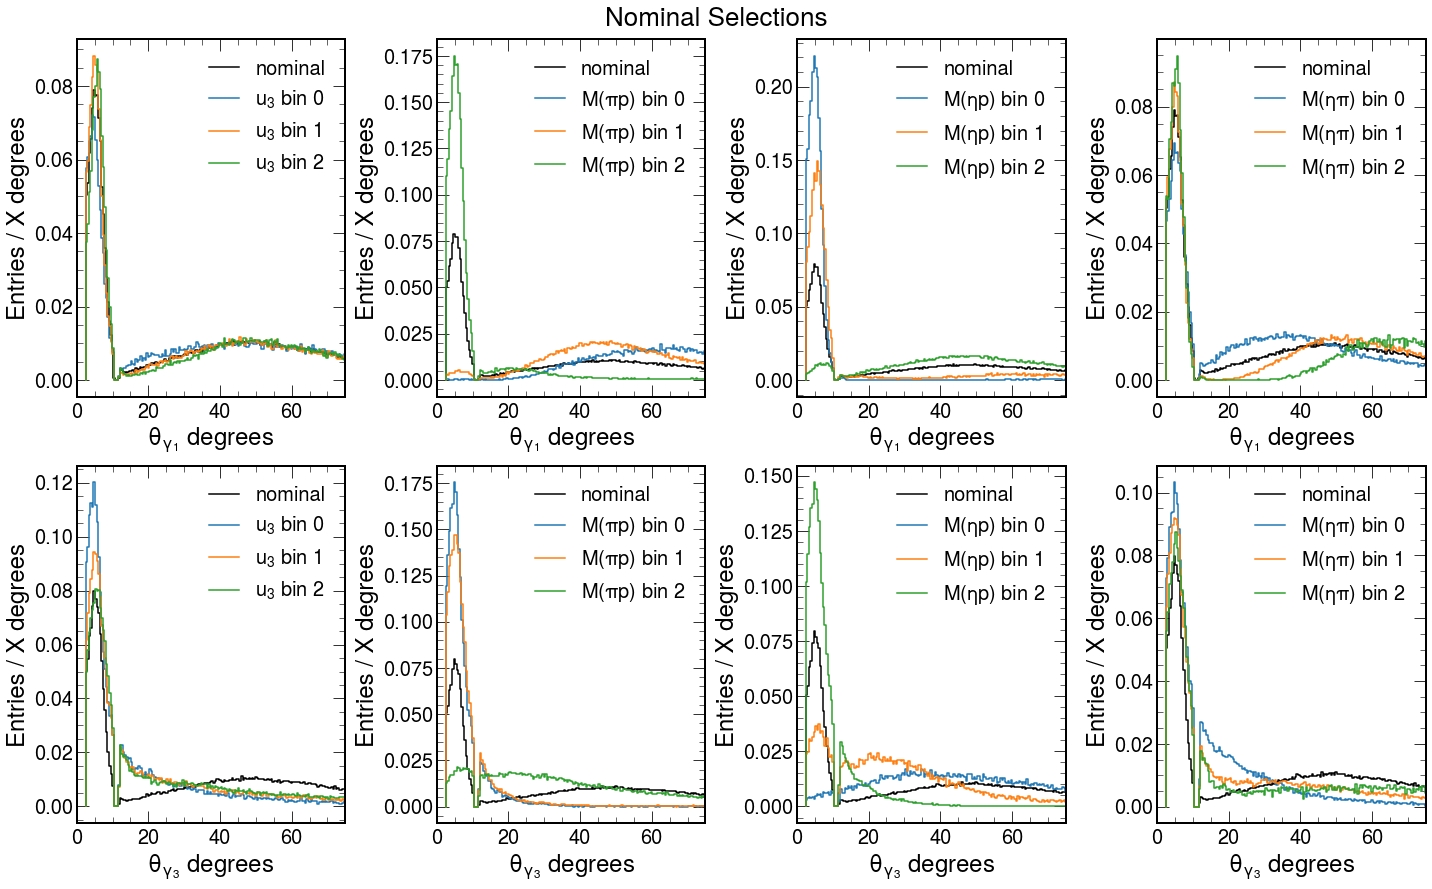

In [5]:
exclusivityVariations=['ueL1','ueL2','chiT','chiL','mmsqL','mmsqT']
photonVariations=['gThetaL','gThetaT','gET1','gET2']
protonVariations=['pMomL','pMomT','pZL','pZT']
# allVariations=[exclusivityVariations,photonVariations,protonVariations]
# allVariationLabels=["Exclusivity Selections","Photon Selections","Proton Selections"]

fig,axes=plt.subplots(2,4,figsize=(20,12))
axes=axes.flatten()
groupedSelections=[u3BinSelections,mpi0pBinSelections,metapBinSelections,mpi0etaBinSelections]
selectionLabels=[r"$u_3$",r"$M(\pi p)$",r"$M(\eta p)$",r"$M(\eta\pi)$"]
nominal=listSelect(datas['phase1'],getNominalSelection())

for i,ax in enumerate(axes):
    # Draw nominal histograms
    dHist_nominal=np.histogram(nominal["photonTheta"+str(int(i/4)+1)],weights=nominal["weightASBS"],bins=300)
    edges=dHist_nominal[1]
    hep.histplot(dHist_nominal,ax=ax,label='nominal',c='black',density=True)

for igroup,groupedSelection,selectionLabel in zip(range(len(groupedSelections)),groupedSelections,selectionLabels):
    print(groupedSelection)
    fig.suptitle("Nominal Selections",y=1.025)

    for ibin,binSelection in enumerate(groupedSelection):
        tmp=listSelect(nominal,binSelection)

        for iax,iph in enumerate([0,2]):
            ax=axes[igroup+iax*4]
            hep.histplot(np.histogram(tmp["photonTheta"+str(iph+1)],weights=tmp["weightASBS"],bins=dHist_nominal[1]),label=selectionLabel+" bin "+str(ibin),
                        ax=ax,density=True)
            ax.set_xlim(0,75)
            ax.set_xlabel(r"$\theta_{\gamma_{"+str(iph+1)+"}}$ degrees")
            ax.set_ylabel("Entries / X degrees")
            ax.legend()
    plt.tight_layout()

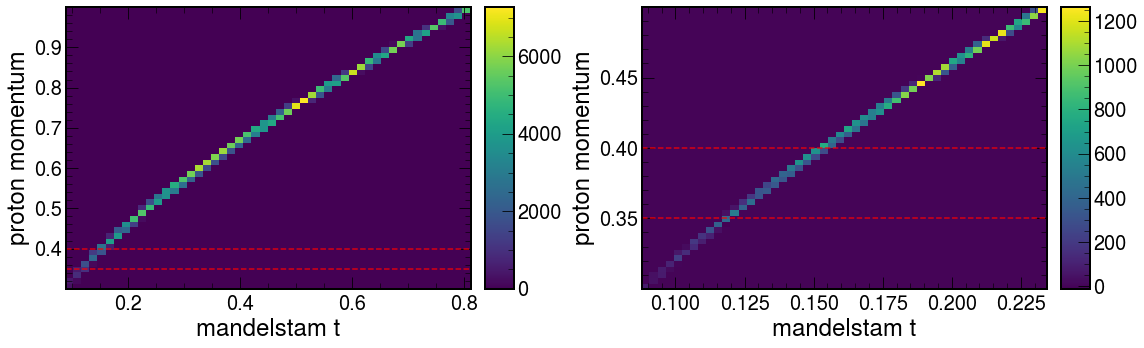

In [6]:
fig, axes=plt.subplots(1,2,figsize=(16,5))

tmp=datas["phase1"][(datas["phase1"].mandelstam_t<1)&(datas["phase1"].proton_momentum<1)]
out=np.histogram2d(tmp.mandelstam_t,tmp.proton_momentum,weights=tmp.weightASBS,bins=(50,50))
hep.hist2dplot(out,ax=axes[0])
axes[0].set_xlabel("mandelstam t")
axes[0].set_ylabel("proton momentum")
axes[0].axhline(0.35,color='red',linestyle="--",alpha=0.8)
axes[0].axhline(0.40,color='red',linestyle="--",alpha=0.8)

tmp=datas["phase1"][(datas["phase1"].proton_momentum<0.5)]
out=np.histogram2d(tmp.mandelstam_t,tmp.proton_momentum,weights=tmp.weightASBS,bins=(50,50))
hep.hist2dplot(out,ax=axes[1])
axes[1].set_xlabel("mandelstam t")
axes[1].set_ylabel("proton momentum")
axes[1].axhline(0.35,color='red',linestyle="--",alpha=0.8)
axes[1].axhline(0.40,color='red',linestyle="--",alpha=0.8)

plt.tight_layout()

# Asymmetry Plots

In [38]:
pol_particles=["000_eta","045_eta","000_pi0","045_pi0"]

In [134]:
def loadResults(fileLoc):
    # Load the data
    df=pd.read_csv(fileLoc,delimiter=' ')
    print(df.shape)
    
    # Useful columns
    cols_to_match=["selection1","midt1","minval1","maxval1","selection2","minval2","maxval2"]
    cols_entries=["weights_000_pi0","weights_045_pi0","weights_000_eta","weights_045_eta"]
    
    # Calculate weights for a weighted sum of the asymmeties over the 3 datasets
    df["weights_000_pi0"]=df["entries_000_pi0"]+df["entries_090_pi0"]
    df["weights_045_pi0"]=df["entries_045_pi0"]+df["entries_135_pi0"]
    df["weights_000_eta"]=df["entries_000_eta"]+df["entries_090_eta"]
    df["weights_045_eta"]=df["entries_045_eta"]+df["entries_135_eta"]
    
    # Define new asymmetry columns for the weighted sum
    for pol_particle in pol_particles:
        '''
        3 different 
        s of getting asymmetry totals. 
          method 1: Already implemented in fitAsymmetryPlots.C is summing the phase1 datasets and fitting the total
          method 2: We can do a weighted average of the three datasets
          method 3: Inverse-variance weighting (which seems more proper than method 2)
          ONLY METHOD 1 EXISTS FOR ALL DATASETS, METHOD 2/3 WILL BE USED TO COMBINE THE 3 PHASE 1 DATASETS!
        '''
        df["asym_"+pol_particle+"_2"]=""
        df["asym_"+pol_particle+"_err_2"]=""
        df["asym_"+pol_particle+"_3"]=""
        df["asym_"+pol_particle+"_err_3"]=""
        df["asym_"+pol_particle+"_4"]=""
        df["asym_"+pol_particle+"_err_4"]=""
        df["asym_"+pol_particle+"_5"]=""
        df["asym_"+pol_particle+"_err_5"]=""
        df.rename(columns={"asym_"+pol_particle:"asym_"+pol_particle+"_1"},inplace=True)
        df.rename(columns={"asym_"+pol_particle+"_err":"asym_"+pol_particle+"_err_1"},inplace=True)
        
    
    # Sometimes the errors are zeros so we will just set it to a small non-zero number to avoid nans
    err_cols=[
        "asym_000_eta_err_1","asym_045_eta_err_1","asym_000_pi0_err_1","asym_045_pi0_err_1",
        "phi000_eta_err","phi000_pi0_err","phi045_eta_err","phi045_pi0_err","phi090_eta_err",
        "phi090_pi0_err","phi135_eta_err","phi135_pi0_err","phi000_eta_err",
        "instAsym_000_eta_err","instAsym_000_pi0_err","instAsym_045_eta_err","instAsym_045_pi0_err",
        "phiAMO_eta_err","phiAMO_pi0_err"
    ]
    df.loc[:,err_cols]=df.loc[:,err_cols].replace(0,0.000001)
    
    # METHOD 2: WEIGHTED AVERAGE USING ENTRIES
    totals=df[df.data=="total"]
    itotals=totals.index
    for itotal in itotals:
        filtered=(df[cols_to_match]==totals.loc[itotal,cols_to_match]).prod(axis=1).astype(bool) # loop through the "total" rows matching against prespecified cols
        totals_row=df.loc[filtered.values][cols_entries][df.loc[filtered.values].data=="total"] # once we found a set of rows we grab the totals to use as normalization
        df.loc[filtered,cols_entries] /= totals_row.values # normalize the entries to get the weights
        
        for pol_particle in ["000_eta","045_eta","000_pi0","045_pi0"]:
            total_weight=df[filtered]["weights_"+pol_particle].sum()
            if total_weight!=0:
                weighted_sigma=df[filtered][["asym_"+pol_particle+"_1","weights_"+pol_particle]].prod(axis=1).sum() / total_weight
                weighted_sigma_err=np.sqrt(df[filtered][["asym_"+pol_particle+"_err_1","weights_"+pol_particle]].prod(axis=1).apply(lambda x: x**2).sum()) / total_weight
            else:
                weighted_sigma=-2
                weighted_sigma_err=0
            df.loc[(filtered)&(df.data=="total"),"asym_"+pol_particle+"_2"]=weighted_sigma
            df.loc[(filtered)&(df.data=="total"),"asym_"+pol_particle+"_err_2"]=weighted_sigma_err
            
            
    ## METHOD 3: Inverse-variance weighting
    ## Var = 1/sum[1/sig_i**2] sum over i
    ## Val = sum[val/sig**2]/Var sum over i
    totals=df[df.data=="total"]
    itotals=totals.index
    
    asym_cols=["asym_"+pol_particle+"_1" for pol_particle in pol_particles]
    asym_err_cols=["asym_"+pol_particle+"_err_1" for pol_particle in pol_particles]
    for itotal in itotals:
        filter_match=(df[cols_to_match]==totals.loc[itotal,cols_to_match]).prod(axis=1).astype(bool) # loop through the "total" rows matching against prespecified cols
        filter_notTotals=~(df.data=="total")
        filtered=filter_match&filter_notTotals
        var=1/df.loc[filtered,asym_err_cols].apply(lambda x: 1/x**2).sum(axis=0)
        asym_val=((df.loc[filtered,asym_cols].values/df.loc[filtered,asym_err_cols].apply(lambda x: x**2).values).sum(axis=0)*var).values
        df.loc[(filter_match)&(df.data=="total"),["asym_"+pol_particle+"_3" for pol_particle in pol_particles]]=asym_val
        df.loc[(filter_match)&(df.data=="total"),["asym_"+pol_particle+"_err_3" for pol_particle in pol_particles]]=np.sqrt(var).values
        
    ## METHOD 4/5: INVERSE WEIGHT COMBINE METHOD 1/3 PAIRS OF ASYMMETRIES
    for methodi, methodj in zip([1,3],[4,5]):
        for particle in ["eta","pi0"]:
            ## Inverse-variance weighting
            ## Var = 1/sum[1/sig_i**2] sum over i
            ## Val = sum[val/sig**2]*Var sum over i
            asym000=df.loc[itotals,"asym_000_"+particle+"_"+str(methodi)]
            asym045=df.loc[itotals,"asym_045_"+particle+"_"+str(methodi)]
            asym000_err=df.loc[itotals,"asym_000_"+particle+"_err_"+str(methodi)]
            asym045_err=df.loc[itotals,"asym_045_"+particle+"_err_"+str(methodi)]
            var=1/(1/asym000_err**2+1/asym045_err**2)
            val=(asym000/asym000_err**2+asym045/asym045_err**2)*var
            var,val=var.astype(float),val.astype(float)
            df.loc[df.data=="total",["asym_000_"+particle+"_"+str(methodj)]]=val
            df.loc[df.data=="total",["asym_000_"+particle+"_err_"+str(methodj)]]=np.sqrt(var).values
            df.loc[df.data=="total",["asym_045_"+particle+"_"+str(methodj)]]=0
            df.loc[df.data=="total",["asym_045_"+particle+"_err_"+str(methodj)]]=0
        
    return df

In [105]:
# fileLoc=baseFolder+'fitAsymmetryPlots_results/results_ASBS.csv'

# # Load the data
# df=pd.read_csv(fileLoc,delimiter=' ')
# print(df.shape)

# # Useful columns
# cols_to_match=["selection1","midt1","minval1","maxval1","selection2","minval2","maxval2"]
# cols_entries=["weights_000_pi0","weights_045_pi0","weights_000_eta","weights_045_eta"]

# # Calculate weights for a weighted sum of the asymmeties over the 3 datasets
# df["weights_000_pi0"]=df["entries_000_pi0"]+df["entries_090_pi0"]
# df["weights_045_pi0"]=df["entries_045_pi0"]+df["entries_135_pi0"]
# df["weights_000_eta"]=df["entries_000_eta"]+df["entries_090_eta"]
# df["weights_045_eta"]=df["entries_045_eta"]+df["entries_135_eta"]

# # Define new asymmetry columns for the weighted sum
# pol_particles=["000_eta","045_eta","000_pi0","045_pi0"]
# for pol_particle in pol_particles:
#     '''
#     3 different methods of getting asymmetry totals. 
#       method 1: Already implemented in fitAsymmetryPlots.C is summing the phase1 datasets and fitting the total
#       method 2: We can do a weighted average of the three datasets
#       method 3: Inverse-variance weighting (which seems more proper than method 2)
#       ONLY METHOD 1 EXISTS FOR ALL DATASETS, METHOD 2/3 WILL BE USED TO COMBINE THE 3 PHASE 1 DATASETS!
#     '''
#     df["asym_"+pol_particle+"_2"]=""
#     df["asym_"+pol_particle+"_err_2"]=""
#     df["asym_"+pol_particle+"_3"]=""
#     df["asym_"+pol_particle+"_err_3"]=""
#     df["asym_"+pol_particle+"_4"]=""
#     df["asym_"+pol_particle+"_err_4"]=""
#     df["asym_"+pol_particle+"_5"]=""
#     df["asym_"+pol_particle+"_err_5"]=""
#     df.rename(columns={"asym_"+pol_particle:"asym_"+pol_particle+"_1"},inplace=True)
#     df.rename(columns={"asym_"+pol_particle+"_err":"asym_"+pol_particle+"_err_1"},inplace=True)


# # Sometimes the errors are zeros so we will just set it to a small non-zero number to avoid nans
# err_cols=[
#     "asym_000_eta_err_1","asym_045_eta_err_1","asym_000_pi0_err_1","asym_045_pi0_err_1",
#     "phi000_eta_err","phi000_pi0_err","phi045_eta_err","phi045_pi0_err","phi090_eta_err",
#     "phi090_pi0_err","phi135_eta_err","phi135_pi0_err","phi000_eta_err",
#     "instAsym_000_eta_err","instAsym_000_pi0_err","instAsym_045_eta_err","instAsym_045_pi0_err",
#     "phiAMO_eta_err","phiAMO_pi0_err"
# ]
# df.loc[:,err_cols]=df.loc[:,err_cols].replace(0,0.000001)

# ## Inverse-variance weighting
# ## Var = 1/sum[1/sig_i**2] sum over i
# ## Val = sum[val/sig**2]*Var sum over i
# totals=df[df.data=="total"]
# itotals=totals.index

# asym_cols=["asym_"+pol_particle+"_1" for pol_particle in pol_particles]
# asym_err_cols=["asym_"+pol_particle+"_err_1" for pol_particle in pol_particles]
# for itotal in itotals:
#     filter_match=(df[cols_to_match]==totals.loc[itotal,cols_to_match]).prod(axis=1).astype(bool) # loop through the "total" rows matching against prespecified cols
#     filter_notTotals=~(df.data=="total") # select non "total" cols since we are trying to inverse weight merged them
#     filtered=filter_match&filter_notTotals
#     var=1/df.loc[filtered,asym_err_cols].apply(lambda x: 1/x**2).sum(axis=0)
#     asym_val=((df.loc[filtered,asym_cols].values/df.loc[filtered,asym_err_cols].apply(lambda x: x**2).values).sum(axis=0)*var).values
#     df.loc[(filter_match)&(df.data=="total"),["asym_"+pol_particle+"_3" for pol_particle in pol_particles]]=asym_val
#     df.loc[(filter_match)&(df.data=="total"),["asym_"+pol_particle+"_err_3" for pol_particle in pol_particles]]=np.sqrt(var).values
    
# totals=df[df.data=="total"]
# itotals=totals.index

# for particle in ["eta","pi0"]:
#     ## Inverse-variance weighting
#     ## Var = 1/sum[1/sig_i**2] sum over i
#     ## Val = sum[val/sig**2]*Var sum over i
#     asym000=df.loc[itotals,"asym_000_"+particle+"_3"]
#     asym045=df.loc[itotals,"asym_045_"+particle+"_3"]
#     asym000_err=df.loc[itotals,"asym_000_"+particle+"_err_3"]
#     asym045_err=df.loc[itotals,"asym_045_"+particle+"_err_3"]
#     var=1/(1/asym000_err**2+1/asym045_err**2)
#     val=(asym000/asym000_err**2+asym045/asym045_err**2)*var
#     var,val=var.astype(float),val.astype(float)
#     df.loc[df.data=="total",["asym_000_"+particle+"_4"]]=val
#     df.loc[df.data=="total",["asym_000_"+particle+"_err_4"]]=np.sqrt(var).values

(260, 58)


In [132]:
# df.loc[df.data=="total",["asym_000_eta_1","asym_000_eta_2","asym_000_eta_3","asym_045_eta_3","asym_045_eta_1","asym_000_eta_4"]]

In [135]:
# baseFolder="/d/grid17/ln16/myDSelector/zDR_BA/"
baseFolder="/d/grid17/ln16/dselector_v3/study_double_regge/"

In [334]:
method=5
make045PlotAndTables=True

In [137]:
tbinnings=[]
for mint in [0.0,0.2,0.4,0.6,0.8]:
    tbinnings.append(f"${mint:0.2}<t<{mint+0.2:0.2}$")
tbinnings=np.array(tbinnings)

tetabinnings=[]
for mint in [0.0,0.2,0.4,0.6,0.8]:
    tetabinnings.append(f"{mint:0.2}"+"$<t_{\eta}<$"+f"{mint+0.2:0.2}")
tetabinnings=np.array(tetabinnings)

tpi0binnings=[]
for mint in [0.0,0.2,0.4,0.6,0.8]:
    tpi0binnings.append(f"{mint:0.2}"+"$<t_{\pi}<$"+f"{mint+0.2:0.2}")
tpi0binnings=np.array(tpi0binnings)

polMap={"000":"0/90","045":"45/-45"}
runMap={"2017_1":"Spring 2017","2018_1":"Spring 2018","2018_8":"Fall 2018"}

In [138]:
### Accidental and sideband subtract pi0 + select Left eta peak
# fileLoc=baseFolder+'fitAsymmetryPlots_results/results_etaLeft_ASBS.csv'
# outputTag="_etaLeft_ASBS"
# perRunAnalysis=False

# ### Accidental and sideband subtract pi0 + select Right eta peak
# fileLoc=baseFolder+'fitAsymmetryPlots_results/results_etaRight_ASBS.csv'
# outputTag="_etaRight_ASBS"
# perRunAnalysis=False

### Accidental and sideband subtract
# fileLoc=baseFolder+'test/fitAsymmetryPlots_results/results_ASBS.csv'
# saveFolder="thesis_cutSelection_results/double_regge/"
fileLoc=baseFolder+'fitAsymmetryPlots_results/results_ASBS.csv'
saveFolder="results/"

os.system("mkdir -p "+saveFolder+"/finalResults/")
outputTag="_ASBS"

df=loadResults(fileLoc)

(260, 58)


In [139]:
########################################
# Freed phase and scaled flux normalization systematics
########################################
dfs_freePhase1={}
dfs_freePhase1["Free Phase Offset"]=loadResults(baseFolder+'fitAsymmetryPlots_results/results_freePhi_ASBS.csv')
freePhiSystTags=["Free Phase Offset"]

dfs_fluxNorm1={}
dfs_fluxNorm1["FluxNorm +5\%"]=loadResults(baseFolder+'fitAsymmetryPlots_results/results_fluxNormPlus5Perc_ASBS.csv')
dfs_fluxNorm1["FluxNorm -5\%"]=loadResults(baseFolder+'fitAsymmetryPlots_results/results_fluxNormMinus5Perc_ASBS.csv')
fluxNormSystTags=["FluxNorm +5\%","FluxNorm -5\%"]

dfs_sbSyst1={}
dfs_sbSyst1["Narrow Sidebands"]=loadResults(baseFolder+'fitAsymmetryPlots_results/results_sb_251520_252540_ASBS.csv')
dfs_sbSyst1["Wide Sidebands"]=loadResults(baseFolder+'fitAsymmetryPlots_results/results_sb_350540_351580_ASBS.csv')
sbSystTags=["Narrow Sidebands","Wide Sidebands"]

evtSystTags=["chiL","chiT","gET1","gET2","gThetaBeamL","gThetaBeamT","gThetaTransL","gThetaTransT",
             "mmsqT1","mmsqT2","pMomT1","pMomT2","pZL","pZT","ueL1","ueL2"]
dfs_evtSelSyst1={}
for evtSystTag in evtSystTags:
    dfs_evtSelSyst1[evtSystTag]=loadResults(baseFolder+'fitAsymmetryPlots_results/results_evtSel_'+evtSystTag+'_ASBS.csv')

(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)
(260, 58)


In [365]:
def setMethod(_method):
    global method
    global make045PlotAndTables
    
    method=_method
    
    # Depending on the method (i.e. 4/5) we might not have any asymmetries, since they would have been merged away
    if np.prod([df.loc[df["asym_045_"+particle+"_"+str(method)]!="","asym_045_eta_"+str(method)].sum() for particle in ["eta","pi0"]]):
        make045PlotAndTables=True
    else:
        make045PlotAndTables=False

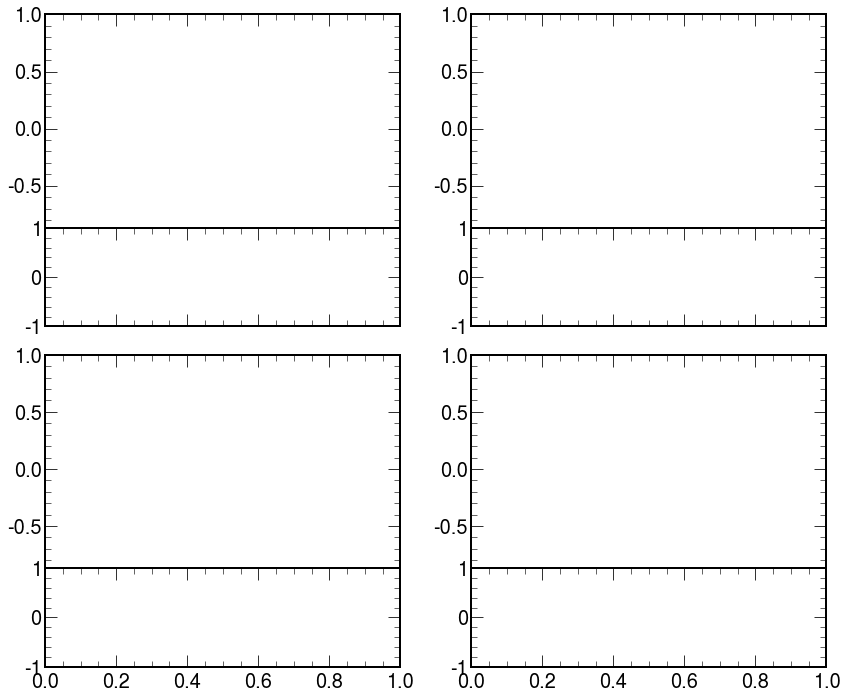

In [366]:
def groupAxes(axes,r1,c1,r2,c2):
    box = axes[r1,c1].get_position()
    box.y0 = box.y0-0.1
    axes[r1,c1].set_position(box)
    axes[r1,c1].set_ylim(-0.999,1)

    box = axes[r2,c2].get_position()
    box.y1 = box.y1-0.05
    axes[r2,c2].set_position(box)
    axes[r2,c2].set_ylim(-1,1)

def constructAxes(nrows,ncols,figsize):
    nrows,ncols=nrows*2,ncols
    fig,axes = plt.subplots(nrows,ncols,figsize=figsize,sharex=True)
    for row in range(0,nrows,2):
        for col in range(ncols):
            groupAxes(axes,row,col,row+1,col)

constructAxes(2,2,(14,12))

# Define useful functions

In [367]:
def selectAsymVals(tmp,particle,method,matchStr):
    '''
    Load the columns for the asymmetries based on matchStr
    We can use matchStr to select asym columns or instAsym columns
    '''
    particle000=tmp[matchStr+"_000_"+particle+"_"+str(method) if method != "" else matchStr+"_000_"+particle]
    particle000_err=tmp[matchStr+"_000_"+particle+"_err_"+str(method) if method != "" else matchStr+"_000_"+particle+"_err"]
    particle045=tmp[matchStr+"_045_"+particle+"_"+str(method) if method != "" else matchStr+"_045_"+particle]
    particle045_err=tmp[matchStr+"_045_"+particle+"_err_"+str(method) if method != "" else matchStr+"_045_"+particle+"_err"]
    
    particle000=particle000.reset_index(drop=True)
    particle000_err=particle000_err.reset_index(drop=True)
    particle045=particle045.reset_index(drop=True)
    particle045_err=particle045_err.reset_index(drop=True)
    
    particle000=particle000.astype(float)
    particle000_err=particle000_err.astype(float)
    particle045=particle045.astype(float)
    particle045_err=particle045_err.astype(float)
    
    return particle000, particle000_err, particle045, particle045_err


def rn(x,scale):
    '''
    Mean centered on actual values, with std=scale
    '''
    return np.random.normal(x,scale)
#     return x*(1+np.random.uniform(-1*scale,scale))


import matplotlib.font_manager as font_manager
def plotAsymmetries(df,axes,binlabels,ylabel,binVar,shape,particles,dataset,method,matchStr,colors,legLabelTag,minvals,maxvals,labels,
                    offset=0,showXerrs=True,
                    labelOffset=0,labelOffsetX=0,labelSize=24, 
                    includeLabelInLegend=True,leg_ncols=2,pairsToPlot=["000","045"],
                    markersize=7,markerFmt="s",
                    linewidth=1.5):
    '''
    minvals,maxvals,labels: are used to determine sub-binning int s12,u3,s23
    offset: offset the t1 bin locations so we can scatter along the axis
    showXerrs: to show the x error bars or not, they dont really add anything
    labelOffset,labelOffsetX,labelSize: Determines the Y,X,Size of the sub-binning label
    leg_ncols: how many columns to make the legened with, useful to distribute white space
    pairsToPlot: which polarization pair to plot, in case we dont want to plot both, i.e. when looking at some systemtatics would be too crow
    markersize, markerFmt, linewidth: scatter plot's marker and line features
    
    
    Outputs: map of the asymmetry and the associated errors for particles of interest
    '''
    
    mapOfData={}
    nrows,ncols=shape
    for iax,binlabel in enumerate(binlabels):
        ############
        # SELECT CORRECT SUBSET OF DATA
        ############
        tmp=df[df.binVar==binVar]
        ax=axes[iax]
        maxval=maxvals[iax]
        minval=minvals[iax]
        tmp=tmp[(tmp.maxval1==maxval)&(tmp.minval1==minval)]
        tmp=tmp[(tmp.data==dataset)]

        x=tmp.midt1
        x+=offset
        xerr = tmp.t1_err if showXerrs else 0

        ############
        # LOOP PLOTTING OF PARTICLES
        ############
        legendLabels={
            "eta000":legLabelTag+r"$t_{\eta}$ 0/90", 
            "eta045":legLabelTag+r"$t_{\eta}$ 45/-45",
            "pi0000":legLabelTag+r"$t_{\pi}$ 0/90", 
            "pi0045":legLabelTag+r"$t_{\pi}$ 45/-45",
        }
        for ip,particle in enumerate(particles):
            part000,part000_err,part045,part045_err=selectAsymVals(tmp,particle,method,matchStr)
            if "000" in pairsToPlot:
                label=legendLabels[particle+"000"] if includeLabelInLegend else ""
                l00=ax.errorbar(x,part000,xerr=xerr,yerr=part000_err,fmt=markerFmt,label=label,linewidth=linewidth,c=colors[ip],
                            markerfacecolor="None",markeredgewidth=1.5,markersize=markersize)
                mapOfData[binlabel+"_"+particle+"000"]=part000
                mapOfData[binlabel+"_"+particle+"000_err"]=part000_err
            if "045" in pairsToPlot:
                label=legendLabels[particle+"045"] if includeLabelInLegend else ""
                l45=ax.errorbar(x,part045,xerr=xerr,yerr=part045_err,fmt=markerFmt,label=label,linewidth=linewidth,c=colors[ip],
                            markersize=markersize)
                mapOfData[binlabel+"_"+particle+"045"]=part045
                mapOfData[binlabel+"_"+particle+"045_err"]=part045_err
            
#             labels=[legendLabels[particle+pairToPlot] for pairToPlot in pairsToPlot]
#             ls=ax.legend([l[0] for l in [l00,l45]], labels, bbox_to_anchor=(1.0-0.25*ip, 0.3))
#             plt.gca().add_artist(ls)

        ############
        # LOOP PLOTTING OF PARTICLES
        ############
        ax.grid()
        if iax in np.arange(ncols*(nrows-1),nrows*ncols,1):
            if "eta" in particles and "pi0" in particles:
                label=r"$t_{\eta}, t_{\pi}~GeV^{2}$"
            elif "eta" in particles:
                label=r"$t_{\eta}~GeV^{2}$"
            elif "pi0" in particles:
                label=r"$t_{\pi}~GeV^{2}$"
            ax.set_xlabel(label,size=36)
        if iax in np.arange(0,nrows*ncols,ncols):
            ax.set_ylabel(ylabel,size=36)
        ax.text(0.1+labelOffsetX,0.1+labelOffset,binlabel,transform=ax.transAxes,size=labelSize)
        ax.set_ylim(-1,1)
        ax.set_xlim(0,1)
        ax.axhline(0,linestyle=(0,(5,10)),linewidth=1,c='black')
        ax.legend(loc=4,prop={"size":20},ncol=leg_ncols)
    for unused_axis in range(len(labels),len(axes)):
        axes[unused_axis].axis(False)
    plt.tight_layout()
    
    return mapOfData

In [368]:
def addTextToKeys(map1,text,location,delimiter):
    ''' Insert text into all the keys of map1 at location which was determined by a delimiter'''
    return {"_".join(k.split(delimiter)[:location]+[text]+k.split(delimiter)[location:]):v for k,v in map1.items()}
from collections import ChainMap
def mergeListOfDicts(map1):
    ''' Merging list of dictionaries with a safeguard to not do it twice'''
    if type(map1)==list:
        map1=ChainMap(*map1)
    return map1
def constructAsymString(asym,key):
    ''' Construct a string to represent Sigma+/-Err'''
    list1=[]
    for i in range(len(asym[key])):
        keyerr=key+"_err"
        list1.append(f"{asym[key][i]:0.3f}$\pm${asym[keyerr][i]:0.3f}")
    return list1

def generateStandardSystematicsPlots(dfnom,dfsyst,systTags,pol,systLabel,baseOffset,offsetSize,chiSqFromNominal=False,
                                    includePercentDiffCol=False, diffType="barlow"):
    '''
    dfnom: nominal asymmetry results
    dfsyst: contains a map of dataframes for each systematic variation
    systTags: the keys of the above map
    pol: 000, 045 for the pair of polarization to plot
    systLabel: include a tag in the name of the pdf image output to distinguish different systematic checks, i.e. freephi, event selections, etc
    baseOffset: The standard binning is [0.1, 0.3, ..., 0.9]. The baseOffset will offset the x coorindates 
    offsetSize: For each systTag we will move the x coords (with the baseOffset) incrementally
    diffType: How to calculate Nsigma_{diff}. Adding errors in quadruture (standard) or subtracting in quadruture (barlow)
                if "barlow" do subtraction else do standard
    ''' 
    
    allLabels=[]
    mapNominals=[]
    mapSysts=[]    

    #############################
    # INTEGRATED
    #############################
#     minvals=[0]
#     maxvals=[100]
#     labels=["integrated"]
#     allLabels.append(labels)
#     for particle in [["eta"],["pi0"]]:
#         shape=(1,1,)
#         fig,axes = plt.subplots(*shape,figsize=(9,6),sharex=True,sharey=True)
#         axes=[axes]
#         mapNominal=plotAsymmetries(dfnom,axes,labels,r"$\Sigma$","mandelstam_t",shape,particle,"total",method,"asym",["red",""],"nominal ",
#                         minvals,maxvals,labels,
#                         offset=baseOffset,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
#         mapNominals.append(mapNominal)
#         for i,systTag in enumerate(systTags):
#             mapSyst=plotAsymmetries(dfsyst[systTag],axes,labels,r"$\Sigma$","mandelstam_t",shape,particle,"total",method,"asym",["black",""],"",
#                             minvals,maxvals,labels,
#                         offset=baseOffset+(i+1)*offsetSize,includeLabelInLegend=False,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
#             mapSysts.append(addTextToKeys(mapSyst,systTag,1,"_"))
#         plt.savefig(saveFolder+"integrated_asym_"+systLabel+"Syst"+"_"+particle[0]+"_"+pol+outputTag+".pdf")

#     #############################
#     # BINNED IN U3
#     #############################
#     minvals=[0,0.5,1]
#     maxvals=[0.5,1,100]
#     labels=[
#         r"$t < 0.5~GeV^{2}$",
#         r"$0.5 < t < 1.0~GeV^{2}$",
#         r"$1.0~GeV^{2}<t$",
#     ]
#     allLabels.append(labels)
#     for particle in [["eta"],["pi0"]]:
#         shape=(2,2)
#         fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
#         axes=axes.flatten()

#         mapNominal=plotAsymmetries(dfnom,axes,labels,r"$\Sigma$","mandelstam_t",shape,particle,"total",method,"asym",["red",""],"nominal ",
#                         minvals,maxvals,labels,
#                        offset=baseOffset,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
#         mapNominals.append(mapNominal)
#         for i,systTag in enumerate(systTags):
#             mapSyst=plotAsymmetries(dfsyst[systTag],axes,labels,r"$\Sigma$","mandelstam_t",shape,particle,"total",method,"asym",["black",""],"",
#                             minvals,maxvals,labels,
#                         offset=baseOffset+(i+1)*offsetSize,includeLabelInLegend=False,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
#             mapSysts.append(addTextToKeys(mapSyst,systTag,1,"_"))
#         plt.savefig(saveFolder+"binned_u3_"+systLabel+"Syst"+"_"+particle[0]+"_"+pol+outputTag+".pdf")

#     #############################
#     # BINNED IN METAP
#     #############################
#     shape=(2,2)
#     fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
#     axes=axes.flatten()

#     minvals=dfnom[dfnom.binVar=="Metap"].minval1.unique()
#     maxvals=dfnom[dfnom.binVar=="Metap"].maxval1.unique()
#     labels=[]
#     for minval,maxval in zip(minvals,maxvals):
#         labels.append(r"$"+str(minval)+"<M(\eta p)<"+str(maxval)+"~GeV^{{2}}$")
#     labels[-1]=r"$M(\eta p)$ > {}".format(maxvals[1])
#     allLabels.append(labels)

#     mapNominal=plotAsymmetries(dfnom,axes,labels,r"$\Sigma$","Metap",shape,["pi0"],"total",method,"asym",["red",""],"nominal ",
#                     minvals,maxvals,labels,
#                    offset=baseOffset,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
#     mapNominals.append(mapNominal)
#     for i,systTag in enumerate(systTags):
#         mapSyst=plotAsymmetries(dfsyst[systTag],axes,labels,r"$\Sigma$","Metap",shape,["pi0"],"total",method,"asym",["black"],"",
#                         minvals,maxvals,labels,
#                     offset=baseOffset+(i+1)*offsetSize,includeLabelInLegend=False,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
#         mapSysts.append(addTextToKeys(mapSyst,systTag,1,"_"))
#     plt.savefig(saveFolder+"binned_setap_"+systLabel+"Syst"+"_pi0_"+pol+outputTag+".pdf")

    #############################
    # BINNED IN MPI0P
    #############################
    shape=(2,2)
    fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
    axes=axes.flatten()

    minvals=dfnom[dfnom.binVar=="Mpi0p"].minval1.unique()
    maxvals=dfnom[dfnom.binVar=="Mpi0p"].maxval1.unique()
    labels=[]
    for minval,maxval in zip(minvals,maxvals):
        labels.append(r"$"+str(minval)+"<M(\pi p)<"+str(maxval)+"~GeV^{{2}}$")
    labels[-1]=r"$M(\pi p)$ > {}".format(maxvals[1])
    allLabels.append(labels)

    mapNominal=plotAsymmetries(dfnom,axes,labels,r"$\Sigma$","Mpi0p",shape,["eta"],"total",method,"asym",["red",""],"nominal ",
                    minvals,maxvals,labels,
                   offset=baseOffset,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
    mapNominals.append(mapNominal)
    for i,systTag in enumerate(systTags):
        mapSyst=plotAsymmetries(dfsyst[systTag],axes,labels,r"$\Sigma$","Mpi0p",shape,["eta"],"total",method,"asym",["black",""],"",
                        minvals,maxvals,labels,
                    offset=baseOffset+(i+1)*offsetSize,includeLabelInLegend=False,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
        mapSysts.append(addTextToKeys(mapSyst,systTag,1,"_"))
    plt.savefig(saveFolder+"binned_spi0p_"+systLabel+"Syst"+"_eta_"+pol+outputTag+".pdf")

#     #############################
#     # BINNED IN MPI0ETA
#     #############################
#     minvals=dfnom[dfnom.binVar=="Mpi0eta"].minval1.unique()
#     maxvals=dfnom[dfnom.binVar=="Mpi0eta"].maxval1.unique()
#     labels=[]
#     for minval,maxval in zip(minvals,maxvals):
#         labels.append(r"$"+str(minval)+"<M(\eta\pi)<"+str(maxval)+"~GeV^{{2}}$")
#     allLabels.append(labels)
#     for particle in [["eta"],["pi0"]]:
#         shape=(2,2)
#         fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
#         axes=axes.flatten()

#         mapNominal=plotAsymmetries(dfnom,axes,labels,r"$\Sigma$","Mpi0eta",shape,particle,"total",method,"asym",["red",""],"nominal \n",
#                         minvals,maxvals,labels,labelOffset=0.1,
#                        offset=baseOffset,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
#         mapNominals.append(mapNominal)
#         for i,systTag in enumerate(systTags):
#             mapSyst=plotAsymmetries(dfsyst[systTag],axes,labels,r"$\Sigma$","Mpi0eta",shape,particle,"total",method,"asym",["black",""],"",
#                             minvals,maxvals,labels,labelOffset=0.1,
#                         offset=baseOffset+(i+1)*offsetSize,includeLabelInLegend=False,pairsToPlot=[pol],showXerrs=False,markerFmt=".")
#             mapSysts.append(addTextToKeys(mapSyst,systTag,1,"_"))
#         plt.savefig(saveFolder+"binned_s12_"+systLabel+"Syst"+"_"+particle[0]+"_"+pol+outputTag+".pdf")
        
        
    ###############################
    # CONSTUCT A TABLE 
    ###############################
    mapNominals=mergeListOfDicts(mapNominals)
    mapSysts=mergeListOfDicts(mapSysts)

    labelCols=[]
    systCols=[]
    tCols=[]
    asymCols=[]
    asymSystCols=[]
    nSigmaDiffCols=[]
    percDiffCols=[]
    
    for label in [value for sublist in allLabels for value in sublist]:
        for syst in systTags:
            for particle in ["eta","pi0"]:
                key=label+"_"+particle+pol
                keySyst=label+"_"+syst+"_"+particle+pol
                if key in mapNominals.keys():
                    diff=(mapNominals[key]-mapSysts[keySyst]).abs()
                    if diffType=="barlow":
                        diff_err=np.sqrt((mapNominals[key+"_err"]**2-mapSysts[keySyst+"_err"]**2).abs())
                    else:
                        diff_err=np.sqrt((mapNominals[key+"_err"]**2+mapSysts[keySyst+"_err"]**2).abs())
                    percDiffCol=(mapSysts[keySyst]-mapNominals[key])/mapNominals[key]*100
                    nSigmaDiff=diff/diff_err
                    labelCols.append([label]*5) # *5 for the 5 t1 bins
                    systCols.append([syst]*5)
                    tCols.append(tetabinnings if particle=="eta" else tpi0binnings)
                    asymCols.append(constructAsymString(mapNominals,key))
                    asymSystCols.append(constructAsymString(mapSysts,keySyst))
                    nSigmaDiffCols.append([f"{value:0.3f}" for value in nSigmaDiff.values])
                    percDiffCols.append([f"{value:0.1f}" for value in percDiffCol.values])
    labelCols=np.array(labelCols).flatten()
    systCols=np.array(systCols).flatten()
    tCols=np.array(tCols).flatten()
    asymCols=np.array(asymCols).flatten()
    asymSystCols=np.array(asymSystCols).flatten()
    nSigmaDiffCols=np.array(nSigmaDiffCols).flatten()
    percDiffCols=np.array(percDiffCols).flatten()
    df={
        "Variation":systCols,
        "Binning":labelCols,
        "$t_1$ bin":tCols,
        "$\Sigma_{nominal}$":asymCols,
        "$\Sigma_{vary}$":asymSystCols,
        "\% Diff":percDiffCols,
    }
    if diffType=="barlow":
        df["$N \sigma_{barlow}$"]=nSigmaDiffCols
    else:
        df["$N \sigma$"]=nSigmaDiffCols
    return pd.DataFrame(df)

In [369]:
def plotBarlow(dfnom,dfsyst,axes,binlabels,binVar,shape,dataset,method,matchStr,
                    minvals,maxvals,labels, markersize=7, markerFmt="s", linewidth=1.5,includeInLegend=True):
    nrows,ncols=shape
    barlows={}
    systs={}
    systErrs={}
    noms={}
    nomErrs={}
    for iax,binlabel in enumerate(binlabels):
        ax=axes[iax]
        maxval=maxvals[iax]
        minval=minvals[iax]
        
        ############
        # SELECT CORRECT SUBSET OF DATA
        ############
        c_dfnom=dfnom[dfnom.binVar==binVar] ## Nominal dataset
        c_dfnom=c_dfnom[(c_dfnom.maxval1==maxval)&(c_dfnom.minval1==minval)]
        c_dfnom=c_dfnom[(c_dfnom.data==dataset)]
        c_dfsyst=dfsyst[dfsyst.binVar==binVar] ## systemtic varied dataset
        c_dfsyst=c_dfsyst[(c_dfsyst.maxval1==maxval)&(c_dfsyst.minval1==minval)]
        c_dfsyst=c_dfsyst[(c_dfsyst.data==dataset)]

        x=c_dfsyst.midt1

        ############
        # LOOP PLOTTING OF PARTICLES
        ############
        offsets=np.linspace(-0.03,0.03,4)
        ioff=0
        colors=["steelblue","orange","forestgreen","indianred"]
        barlows[binlabel]={}
        systs[binlabel]={}
        systErrs[binlabel]={}
        noms[binlabel]={}
        nomErrs[binlabel]={}
        for particle,latexParticle in zip(["eta","pi0"],["$\eta$","$\pi$"]):
            part000_syst,part000_err_syst,part045_syst,part045_err_syst=selectAsymVals(c_dfsyst,particle,method,matchStr)
            part000_nom,part000_err_nom,part045_nom,part045_err_nom=selectAsymVals(c_dfnom,particle,method,matchStr)

            barlow000=abs(part000_nom-part000_syst)/(abs(part000_err_nom*part000_err_nom-part000_err_syst*part000_err_syst+1E-12)).pow(0.5)
            barlow045=abs(part045_nom-part045_syst)/(abs(part045_err_nom*part045_err_nom-part045_err_syst*part045_err_syst+1E-12)).pow(0.5)
            
            # check to see if any of the barlows are all zero or not. If so, the most likely scenario is that you chose
            #    method 4 or 5 which mergees the 0 and 45 asymmetries
            if barlow000.sum()==0 or barlow045.sum()!=0:
                label1=latexParticle+" 0/90" if includeInLegend else ""
                label2=latexParticle+" 45/-45" if includeInLegend else ""
            else:
                label1=latexParticle if includeInLegend else "" 
                label2=""

            ax.errorbar(x+offsets[ioff],barlow000,xerr=0,yerr=0,fmt=markerFmt,linewidth=linewidth,
                        markerfacecolor="None",markeredgewidth=1.5,markersize=markersize,label=label1,color=colors[ioff])
            ioff+=1
            ax.errorbar(x+offsets[ioff],barlow045,xerr=0,yerr=0,fmt=markerFmt,linewidth=linewidth,
                        markerfacecolor="None",markeredgewidth=1.5,markersize=markersize,label=label2,color=colors[ioff])
            ioff+=1
            
            barlows[binlabel][particle+"000"]=barlow000
            barlows[binlabel][particle+"045"]=barlow045
            systs[binlabel][particle+"000"]=part000_syst
            systs[binlabel][particle+"045"]=part045_syst
            systErrs[binlabel][particle+"000"]=part000_err_syst
            systErrs[binlabel][particle+"045"]=part045_err_syst
            noms[binlabel][particle+"000"]=part000_nom
            noms[binlabel][particle+"045"]=part045_nom
            nomErrs[binlabel][particle+"000"]=part000_err_nom
            nomErrs[binlabel][particle+"045"]=part045_err_nom

        ############
        # LOOP PLOTTING OF PARTICLES
        ############
        ax.grid()
        if iax in np.arange(ncols*(nrows-1),nrows*ncols,1):
            label=r"$t_{\eta}, t_{\pi}~GeV^{2}$"
            ax.set_xlabel(label,size=36)
        if iax in np.arange(0,nrows*ncols,ncols):
            ax.set_ylabel(r"N$\sigma_{barlow}$ of separation",size=24)
        ax.text(0.1,0.9,binlabel,transform=ax.transAxes,size=24)
        ax.set_ylim(0,15)
        ax.set_xlim(0,1)
        ax.legend(prop={"size":15})
        ax.axhline(2,c='gray',linestyle='--',linewidth=1,alpha=0.5)
    for unused_axis in range(len(labels),len(axes)):
        axes[unused_axis].axis(False)
    plt.tight_layout()
    
    return barlows,systs,noms,systErrs,nomErrs

def prettyTableBarlow(tables,colStructure,label,nbarlowSignificant):
    ##########################################
    # Construct latex table output
    ##########################################
    for particle,latexParticle in zip(["eta","pi0"],["eta","pi^0"]):
        if make045PlotAndTables:
            pols=["000","045"]
        else:
            pols=["000"]
        for pol in pols:
            latex_code=tables[particle+pol].to_latex(escape = False, index=False)
            latex_code = latex_code.replace("toprule", "hline")
            latex_code = latex_code.replace("bottomrule", "hline")
            latex_code = latex_code.replace("midrule", "hline\hline")
            latex_code = latex_code.replace(colStructure, "||"+colStructure+"||")
            caption="For the "+label+" case. Selections with N $\sigma_{barlow}>"+str(nbarlowSignificant)+"$ are shown for $\\"+\
                            latexParticle
            if make045PlotAndTables:
                caption+="$ in the "+polMap[pol]+" polarization pair."
            latex_code = "\\begin{table}[h!]\n\centering\n"+latex_code+"\caption{"+caption+"}\n\label{table:barlow_"+particle+pol+"}\n\end{table}"
            print(latex_code)

def constructTable(systVariationsBarlows,systVariationsSysts,systVariationsNoms,systVariationsSystErrs,systVariationsNomErrs,
                   evtSystTags,label,colStructure,caption="",nbarlowSignificant=2):
    ##########################################
    # Loop over all the barlow systematics tests and generate a dataframe that contains 3 columns:
    #    barlow sigma | t bin | cut variation
    ##########################################
    tables={}
    if make045PlotAndTables:
        particlePolPairs=["eta000","eta045","pi0000","pi0045"]
    else:
        particlePolPairs=["eta000","pi0000"]
    for particlePolPair in particlePolPairs: #should make 4 tables
        percDiffCol=[]
        systCol=[]
        systErrCol=[]
        nomCol=[]
        nomErrCol=[]
        valueCol=[]
        tCol=[]
        cutCol=[]
        for evtSystTag in evtSystTags:
            data=systVariationsBarlows[label][evtSystTag][particlePolPair]
            syst=systVariationsSysts[label][evtSystTag][particlePolPair][data>nbarlowSignificant]
            nom=systVariationsNoms[label][evtSystTag][particlePolPair][data>nbarlowSignificant]
            systErr=systVariationsSystErrs[label][evtSystTag][particlePolPair][data>nbarlowSignificant]
            nomErr=systVariationsNomErrs[label][evtSystTag][particlePolPair][data>nbarlowSignificant]
            data=data[data>nbarlowSignificant]
            valueCol.append(data.values)
            systCol.append(syst.values)
            systErrCol.append(systErr.values)
            nomCol.append(nom.values)
            nomErrCol.append(nomErr.values)
            percDiffCol.append(((syst-nom)/nom*100).values)
            tCol.append(tetabinnings[data.index] if "eta" in particlePolPair else tpi0binnings[data.index] )
            cutCol.append([selectionVariationMap[evtSystTag]]*len(data))
        valueCol=np.array([item for sublist in valueCol for item in sublist])
        percDiffCol=np.array([item for sublist in percDiffCol for item in sublist])
        systCol=np.array([item for sublist in systCol for item in sublist])
        systErrCol=np.array([item for sublist in systErrCol for item in sublist])
        nomCol=np.array([item for sublist in nomCol for item in sublist])
        nomErrCol=np.array([item for sublist in nomErrCol for item in sublist])
        tCol=np.array([item for sublist in tCol for item in sublist])
        cutCol=np.array([item for sublist in cutCol for item in sublist])
        sortOrder=np.argsort(valueCol)[::-1]
        valueCol=valueCol[sortOrder]
        percDiffCol=percDiffCol[sortOrder]
        systCol=systCol[sortOrder]
        systErrCol=systErrCol[sortOrder]
        nomCol=nomCol[sortOrder]
        nomErrCol=nomErrCol[sortOrder]
        tCol=tCol[sortOrder]
        cutCol=cutCol[sortOrder]
        valueCol=[f"{ele:0.3f}" for ele in valueCol]
        percDiffCol=[f"{ele:0.1f}" for ele in percDiffCol]
        systCol=[f"{syst:0.3f}$\pm${systErr:0.4f}" for syst,systErr in zip(systCol,systErrCol)]
        nomCol=[f"{nom:0.3f}$\pm${nomErr:0.4f}" for nom,nomErr in zip(nomCol,nomErrCol)]
        tables[particlePolPair]=pd.DataFrame({
            "N Barlow $\sigma$":valueCol,
            "\% Difference":percDiffCol,
            "$\Sigma_{nominal}$":nomCol,
            "$\Sigma_{variation}$":systCol,
            "$t_{1}$ bin (GeV/$c^2$)":tCol,
            "Cut Variation":cutCol
        })
        
    prettyTableBarlow(tables,colStructure,label,nbarlowSignificant)

In [370]:
def constructInstAsymTable(mapSysts,labels):
    mapSysts=mergeListOfDicts(mapSysts)

    labelCols=[]
    polCols=[]
    tCols=[]
    asymSystCols=[]
    nSigmaDiffCols=[]
    
    for label in labels:
        if make045PlotAndTables:
            pols=["000","045"]
        else:
            polts=["000"]
        for pol in pols:
            for particle in ["eta","pi0"]:
                key=label+"_"+particle+pol
                if key in mapSysts.keys():
                    diff=mapSysts[key]
                    diff_err=mapSysts[key+"_err"]
                    nSigmaDiff=(diff/diff_err).abs()
                    labelCols.append([label]*5)
                    polCols.append([polMap[pol]]*5)
                    tCols.append(tetabinnings if particle=="eta" else tpi0binnings)
                    asymSystCols.append(constructAsymString(mapSysts,key))
                    nSigmaDiffCols.append([f"{value:0.3f}" for value in nSigmaDiff.values])
    labelCols=np.array(labelCols).flatten()
    polCols=np.array(polCols).flatten()
    tCols=np.array(tCols).flatten()
    asymSystCols=np.array(asymSystCols).flatten()
    nSigmaDiffCols=np.array(nSigmaDiffCols).flatten()
    df={
        "Binning":labelCols,
        "Polarization Pair":polCols,
        "$t_1$ bin":tCols,
        "$\Sigma_{inst}$":asymSystCols,
        "$N \sigma_{diff}$":nSigmaDiffCols
    }
    
    df=pd.DataFrame(df)
    
    #### nSigma is the residuals. To get the chiSq of the ensemble of points by sum of squared residual divided by N-1
    chi2=f"{df[df.columns[-1]].astype(float).pow(2).sum()/(len(df)-1):0.3f}"

    return pd.DataFrame(df), chi2

def prettyTable(tablesOrig,colStructure,captionText,labelText,pol,selectBinnings="all",captionTemplate=1,splitParticleTable=True):
    '''
    pol=["000","045","all"] to output a table for 000 orientation, 045 orientation, or both combined into one
    '''
    ##########################################
    # Construct latex table output
    ##########################################
    # selectBinnings and selectedBinnings are different!
    if selectBinnings=="all":
        selectedBinnings=tablesOrig['Binning'].unique()
    else:
        selectedBinnings=selectBinnings

    particles=["eta","pi"]
    particleCaptions=["Fast-$\eta$","Fast-$\pi$"]
    if not splitParticleTable:
        particles=[""]
        particleCaptions=[" and ".join(particleCaptions)]
        
    t1col=np.where(tablesOrig.columns.str.contains("\$t_1\$"))[0][0]
    for particle,particleCaption in zip(particles,particleCaptions):
        tables = tablesOrig[tablesOrig[tablesOrig.columns[t1col]].str.contains(particle)]
        tables = tables[tables.Binning.isin(selectedBinnings)]
        latex_code = tables.to_latex(escape = False, index=False, longtable=True)
        latex_code = latex_code.replace("toprule", "hline")
        latex_code = latex_code.replace("bottomrule", "hline")
        latex_code = latex_code.replace("midrule", "hline\hline")
        latex_code = latex_code.replace(colStructure, "||"+colStructure+"||")
        
        particleCaption = particleCaption if pol=="BothPols" else particleCaption+" + polarization pair "+polMap[pol]
        
        if captionTemplate==1:
            caption="("+particleCaption+"). Table comparing nominal asymmetries and asymmetries from "+captionText+\
                        " N$\sigma_{barlow}$ difference between the nominal "+\
                        "and the systematically varied asymmetry is also tabulated."
        if captionTemplate==2:
            caption="("+captionText+") Table of measurements for instrumental asymmetries. "+\
                        " N-$\sigma$ is the difference between the asymmetries and zero"
        
        fullCaption = "caption{"+caption+"}\n\label{table:systematic_"+particle+pol+"_"+labelText+"}\n\\" if pol=="BothPols" else \
                        "caption{"+caption+"}\n\label{table:systematic_"+particle+"_"+labelText+"}\n\\"
        end=latex_code.find("end{longtable}")
        latex_code = latex_code[:end]+fullCaption+latex_code[end:]
        print("\n\n")
        print(latex_code)
        
def makeRunSystPlots(dfOrig,axes,variable,labels,labelOffset=0.175,labelOffsetX=0.3):
    mapNominals=[]
    mapSysts=[]
    for iax,particle in enumerate(["eta","pi0"]):
        offsets=np.linspace(-0.04,0.04,8)
        i=0
        for pairsToPlot in [["000"],["045"]]:
            mapNominal=plotAsymmetries(dfOrig,[axes[iax]],labels,r"$\Sigma$",variable,shape,[particle],"total",method,"asym",["black","black"],"Nominal ",
                           minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.3)
            mapNominals.append(mapNominal)
            i+=1
            mapSyst=plotAsymmetries(dfOrig,[axes[iax]],labels,r"$\Sigma$",variable,shape,[particle],"2017_1",method,"asym",["red","red"],"2017_1 ",
                           minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.3)
            mapSyst={k.split("_")[0]+"_2017_1_"+"_".join(k.split("_")[1:]):v for k,v in mapSyst.items()}
            mapSysts.append(mapSyst)
            i+=1
            mapSyst=plotAsymmetries(dfOrig,[axes[iax]],labels,r"$\Sigma$",variable,shape,[particle],"2018_1",method,"asym",["blue","blue"],"2018_1 ",
                           minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.3)
            mapSyst={k.split("_")[0]+"_2018_1_"+"_".join(k.split("_")[1:]):v for k,v in mapSyst.items()}
            mapSysts.append(mapSyst)
            i+=1
            mapSyst=plotAsymmetries(dfOrig,[axes[iax]],labels,r"$\Sigma$",variable,shape,[particle],"2018_8",method,"asym",["green","green"],"2018_8 ",
                           minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.3)
            mapSyst={k.split("_")[0]+"_2018_8_"+"_".join(k.split("_")[1:]):v for k,v in mapSyst.items()}
            mapSysts.append(mapSyst)
            i+=1
            
        axes[iax].legend(loc=4,prop={"size":13},ncol=3)
        axes[iax].grid(True)

    mapNominals=mergeListOfDicts(mapNominals)
    mapSysts=mergeListOfDicts(mapSysts)

    labelCols=[]
    systCols=[]
    tCols=[]
    asymCols=[]
    asymSystCols=[]
    nBarlowCols=[]
    polPairs=[]
    percDiffCols=[]
    for label in labels:
        for run in ["2017_1","2018_1","2018_8"]:
            runLabel=runMap[run]
            for particle in ["eta","pi0"]:
                for pol in ["000","045"]:
                    key=label+"_"+particle+pol
                    keySyst=label+"_"+run+"_"+particle+pol
                    if key in mapNominals.keys():
                        diff=(mapNominals[key]-mapSysts[keySyst]).abs()
                        diff_err=np.sqrt((mapNominals[key+"_err"]**2-mapSysts[keySyst+"_err"]**2).abs())
                        percDiffCol=(mapSysts[keySyst]-mapNominals[key])/mapNominals[key]*100
                        nBarlow=diff/diff_err
                        
                        labelCols.append([label]*5) # *5 for the 5 t1 bins
                        polPairs.append([polMap[pol]]*5)
                        systCols.append([runLabel]*5)
                        tCols.append(tetabinnings if particle=="eta" else tpi0binnings)
                        asymCols.append(constructAsymString(mapNominals,key))
                        asymSystCols.append(constructAsymString(mapSysts,keySyst))
                        nBarlowCols.append([f"{value:0.3f}" for value in nBarlow.values])
                        percDiffCols.append([f"{value:0.1f}" for value in percDiffCol.values])
    labelCols=np.array(labelCols).flatten()
    systCols=np.array(systCols).flatten()
    tCols=np.array(tCols).flatten()
    asymCols=np.array(asymCols).flatten()
    asymSystCols=np.array(asymSystCols).flatten()
    nBarlowCols=np.array(nBarlowCols).flatten()
    polPairs=np.array(polPairs).flatten()
    percDiffCols=np.array(percDiffCols).flatten()
    df={
        "Variation":systCols,
        "Polarization Pair":polPairs,
        "Binning":labelCols,
        "$t_1$ bin":tCols,
        "$\Sigma_{nominal}$":asymCols,
        "$\Sigma_{run}$":asymSystCols,
        "$N \sigma_{barlow}$":nBarlowCols,
        "\% Difference":percDiffCols,
    }
    df=pd.DataFrame(df)
    return df

# Plot systematics

In [405]:
setMethod(4)

\begin{table}[h!]
\centering
\begin{tabular}{||llllll||}
\hline
N Barlow $\sigma$ & \% Difference & $\Sigma_{nominal}$ & $\Sigma_{variation}$ & $t_{1}$ bin (GeV/$c^2$) &                              Cut Variation \\
\hline\hline
            4.998 &          -3.3 &   0.550$\pm$0.0371 &     0.532$\pm$0.0369 &      0.8$<t_{\eta}<$1.0 &                 Unused Energy $<$ 0.40 GeV \\
            4.457 &           2.3 &   0.660$\pm$0.0308 &     0.675$\pm$0.0306 &      0.6$<t_{\eta}<$0.8 &                                $\chi^2<24$ \\
            4.269 &           2.4 &   0.657$\pm$0.0260 &     0.672$\pm$0.0257 &      0.4$<t_{\eta}<$0.6 &                                $\chi^2<24$ \\
            3.322 &          -2.1 &   0.550$\pm$0.0371 &     0.539$\pm$0.0369 &      0.8$<t_{\eta}<$1.0 &                 Unused Energy $<$ 0.25 GeV \\
            3.166 &          -1.5 &   0.607$\pm$0.0246 &     0.598$\pm$0.0245 &      0.2$<t_{\eta}<$0.4 &                 Unused Energy $<$ 0.25 GeV \\
           

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


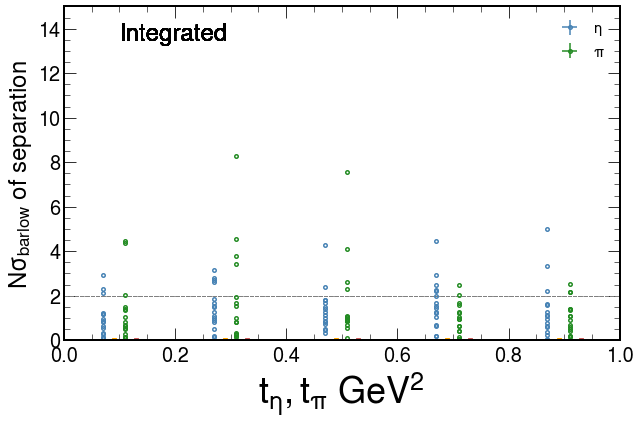

In [406]:
evtSystTags=["chiL","chiT","gET1","gET2","gThetaBeamL","gThetaBeamT","gThetaTransL","gThetaTransT",
             "mmsqT1","mmsqT2","pMomT1","pMomT2","pZL","pZT","ueL1","ueL2"]

##########################################
# Define labels and maps to generate the correct text
##########################################
selectionVariationMap={
    "chiL":"$\\chi^2<24$",
    "chiT":"$\\chi^2<12$",
    "gET1":"$\\gamma_E>0.12 GeV$",
    "gET2":"$\\gamma_E>0.13 GeV$",
    "gThetaBeamL":"$2.0<\\theta<10.3$"+"   "+"$\\theta>11.9$ degrees",
    "gThetaBeamT":"$3.0<\\theta<10.3$"+"   "+"$\\theta>11.9$ degrees",
    "gThetaTransL":"$2.5<\\theta degrees$",
    "gThetaTransT":"$2.5<\\theta<10.0$"+"   "+"$\\theta>12.5$ degrees",
    "mmsqT1":"$\\vert\\textrm{MM}^2\\vert<0.025$ $\textrm{GeV}^2$",
    "mmsqT2":"$\\vert\\textrm{MM}^2\\vert<0.020$ $\textrm{GeV}^2$",
    "ueL1":"Unused Energy $<$ 0.25 GeV",
    "ueL2":"Unused Energy $<$ 0.40 GeV",
    "pMomT1":"$|p_{proton}|>0.35$ GeV/c",
    "pMomT2":"$|p_{proton}|>0.40$ GeV/c",
    "pZL":"$50<z_{proton}<80$ cm",
    "pZT":"$43<z_{proton}<76$ cm"
}

##########################################
# Construct barlow plot
##########################################
shape=(1,1,)
fig,axes = plt.subplots(*shape,figsize=(9,6),sharex=True,sharey=True)
axes=[axes]
minvals=[0]
maxvals=[100]
labels=["Integrated"]

systVariationsBarlows={}
systVariationsSysts={}
systVariationsSystErrs={}
systVariationsNoms={}
systVariationsNomErrs={}
for label in labels:
    systVariationsBarlows[label]={}
    systVariationsSysts[label]={}
    systVariationsSystErrs[label]={}
    systVariationsNoms[label]={}
    systVariationsNomErrs[label]={}
    for i,systTag in enumerate(evtSystTags):
        includeInLegend=True if i==0 else False
        barlows,systs,noms,systErrs,nomErrs=plotBarlow(df,dfs_evtSelSyst1[systTag],axes,labels,"mandelstam_t",shape,"total",method,"asym",
                        minvals,maxvals,labels,markerFmt=".",includeInLegend=includeInLegend)
        systVariationsBarlows[label][systTag]=barlows[label]
        systVariationsSysts[label][systTag]=systs[label]
        systVariationsNoms[label][systTag]=noms[label]
        systVariationsSystErrs[label][systTag]=systErrs[label]
        systVariationsNomErrs[label][systTag]=nomErrs[label]
    constructTable(systVariationsBarlows,systVariationsSysts,systVariationsNoms,systVariationsSystErrs,systVariationsNomErrs,
                   evtSystTags,label,"llllll",caption="",nbarlowSignificant=2)
plt.savefig(saveFolder+"/finalResults/integrated_evtSelSyst_barlow"+outputTag+".pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


montage results/binned_setap_evtSystSyst_pi0_000_ASBS.pdf results/binned_setap_evtSystSyst_pi0_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_setap_evtSystSyst_pi0_/finalResultsmontage_ASBS.pdf
montage results/binned_spi0p_evtSystSyst_eta_000_ASBS.pdf results/binned_spi0p_evtSystSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_spi0p_evtSystSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/integrated_asym_evtSystSyst_eta_000_ASBS.pdf results/integrated_asym_evtSystSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/integrated_asym_evtSystSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_u3_evtSystSyst_eta_000_ASBS.pdf results/binned_u3_evtSystSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_u3_evtSystSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_s12_evtSystSyst_eta_000_ASBS.pdf results/binned_s12_evtSystSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_s12_evtSystSyst_eta_/finalResultsmontage_

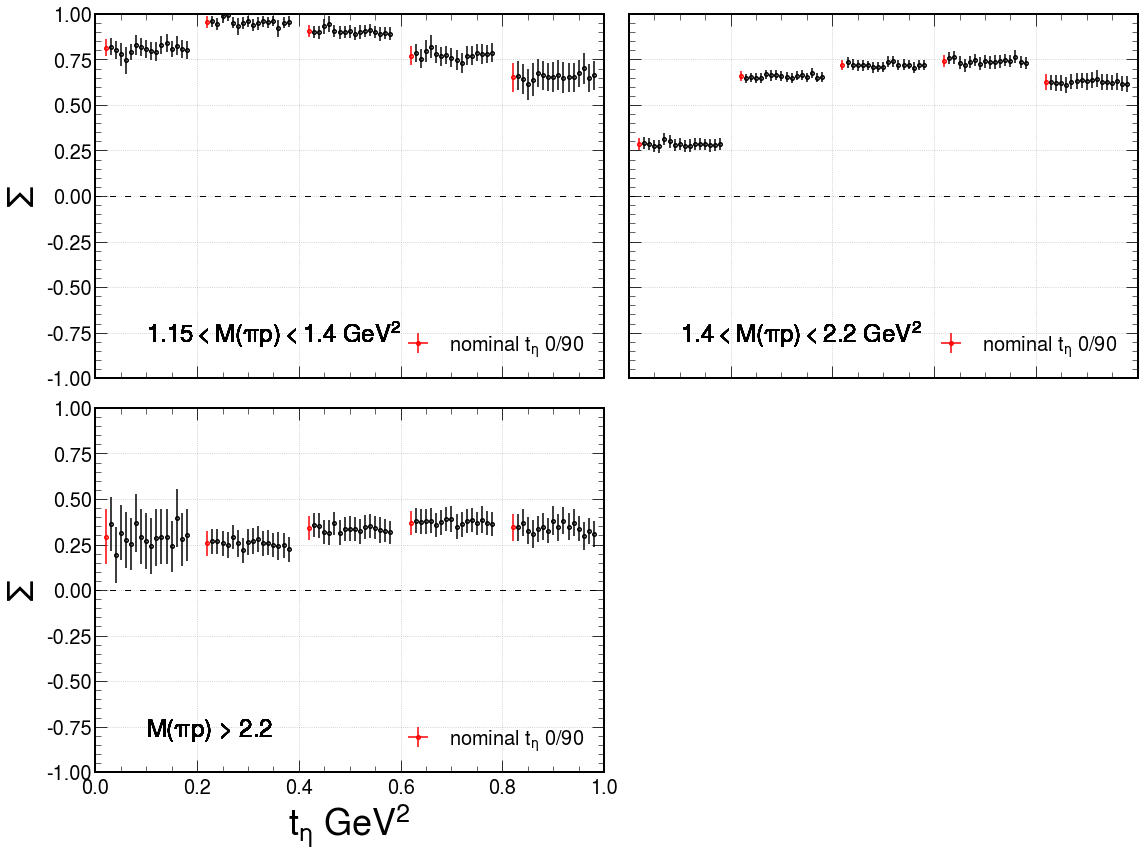

In [407]:
################## 
# Event Selection Systematics
##################
systLabel="evtSyst"
table_000=generateStandardSystematicsPlots(df,dfs_evtSelSyst1,evtSystTags,"000",systLabel,-0.08,0.16/len(evtSystTags))
if make045PlotAndTables:
    table_045=generateStandardSystematicsPlots(df,dfs_evtSelSyst1,evtSystTags,"045",systLabel,-0.08,0.16/len(evtSystTags))

# MONTAGE THE RESULTS
files=[
    [saveFolder+"binned_setap_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_spi0p_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"]
]
for file in files:
    prefix,affix=file
    infiles=" ".join([prefix+"000"+affix,prefix+"045"+affix])
    outputname=prefix.split("/")
    outputname.insert(2,"finalResults")
    outputname="/".join(outputname)+"montage"+affix
    cmd="montage "+infiles+" -mode concatenate -tile 1x2 "+outputname
    print(cmd)
    os.system(cmd)
    

prettyTable(table_000,"lllllll","varying event selections.","evtSyst","000",["integrated"],captionTemplate=1)
if make045PlotAndTables:
    prettyTable(table_045,"lllllll","varying event selections.","evtSyst","045",["integrated"],captionTemplate=1)

In [375]:
tmp=df[(df.binVar=="Mpi0p")&(df.data=="total")&(df.minval1==2.2)&(df.maxval1==10)]
tmp[["asym_000_eta_5"]]

asym_000_eta_5
123       0.775854
127       0.264546
131       0.324451
135       0.367062
139       0.353354

In [378]:
tmp=[d.loc[(d.binVar=="Mpi0p")&(d.data=="2017_1")&(d.minval1==2.2)&(d.maxval1==10),["asym_045_eta_1"]] for k,d in dfs_evtSelSyst1.items()]
print([tmp[j].iloc[0][0] for j in range(len(tmp))])
tmp=[d.loc[(d.binVar=="Mpi0p")&(d.data=="2018_1")&(d.minval1==2.2)&(d.maxval1==10),["asym_045_eta_1"]] for k,d in dfs_evtSelSyst1.items()]
print([tmp[j].iloc[0][0] for j in range(len(tmp))])
tmp=[d.loc[(d.binVar=="Mpi0p")&(d.data=="2018_8")&(d.minval1==2.2)&(d.maxval1==10),["asym_045_eta_1"]] for k,d in dfs_evtSelSyst1.items()]
print([tmp[j].iloc[0][0] for j in range(len(tmp))])

[-1.0, -1.0, -1.0, -1.0, -0.758995, 1.0, -0.8042739999999999, 1.0, -1.0, -0.654431, -1.0, -1.0, -1.0, -0.583867, -1.0, 0.106768]
[0.586386, 0.169515, 0.598147, 0.559319, 0.6313770000000001, 0.7634489999999999, 0.5103479999999999, 0.512304, 0.66047, 0.639262, 0.5789340000000001, 0.578907, 0.45913000000000004, 0.5010680000000001, 0.558215, 0.566383]
[0.394021, 1.0, 1.0, 1.0, 0.639885, 0.794931, 0.866187, 0.999999, 0.743768, 0.806724, 0.928958, 0.9291739999999999, 0.36525, 1.0, 0.8927379999999999, 0.9398139999999999]


In [397]:
tmp=dfs_evtSelSyst1["chiL"]
tmp=tmp[(df.binVar=="Mpi0p")&(tmp.data=="total")&(tmp.minval1==2.2)&(tmp.maxval1==10)]
tmp[["asym_000_eta_3","asym_045_eta_3"]]

asym_000_eta_3 asym_045_eta_3
123       0.966401      -0.104851
127       0.429183        0.12369
131       0.374642       0.317001
135       0.411046       0.476495
139       0.266361       0.450914

In [398]:
tmp=dfs_evtSelSyst1["ueL2"]
tmp=tmp[(df.binVar=="Mpi0p")&(tmp.data=="total")&(tmp.minval1==2.2)&(tmp.maxval1==10)]
tmp[["asym_000_eta_3","asym_045_eta_3"]]

asym_000_eta_3 asym_045_eta_3
123       0.994706       0.597419
127       0.365931      0.0980399
131       0.341798       0.250297
135       0.277176        0.50477
139       0.216878       0.408006

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The 

montage results/binned_setap_freePhiSyst_pi0_000_ASBS.pdf results/binned_setap_freePhiSyst_pi0_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_setap_freePhiSyst_pi0_/finalResultsmontage_ASBS.pdf
montage results/binned_spi0p_freePhiSyst_eta_000_ASBS.pdf results/binned_spi0p_freePhiSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_spi0p_freePhiSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/integrated_asym_freePhiSyst_eta_000_ASBS.pdf results/integrated_asym_freePhiSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/integrated_asym_freePhiSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_u3_freePhiSyst_eta_000_ASBS.pdf results/binned_u3_freePhiSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_u3_freePhiSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_s12_freePhiSyst_eta_000_ASBS.pdf results/binned_s12_freePhiSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_s12_freePhiSyst_eta_/finalResultsmontage_

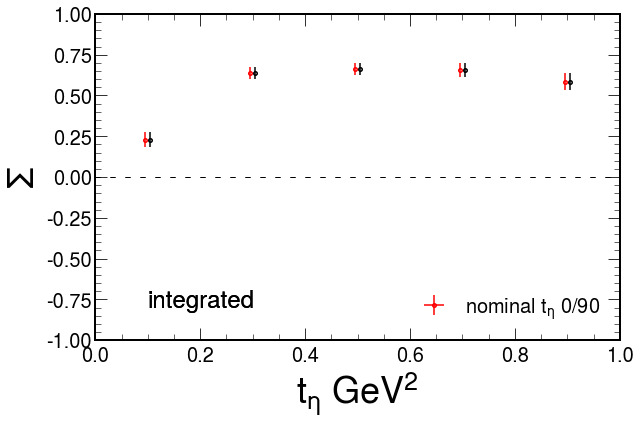

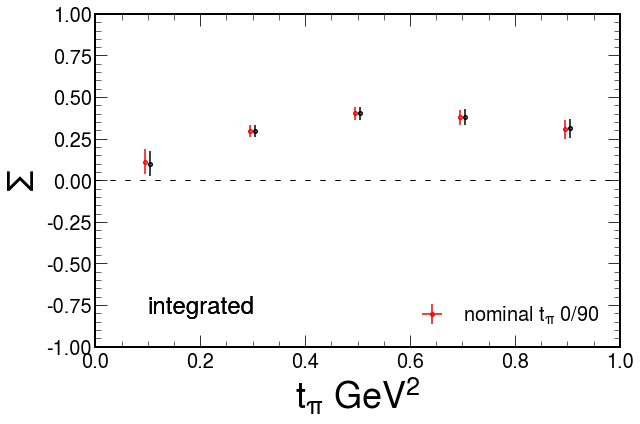

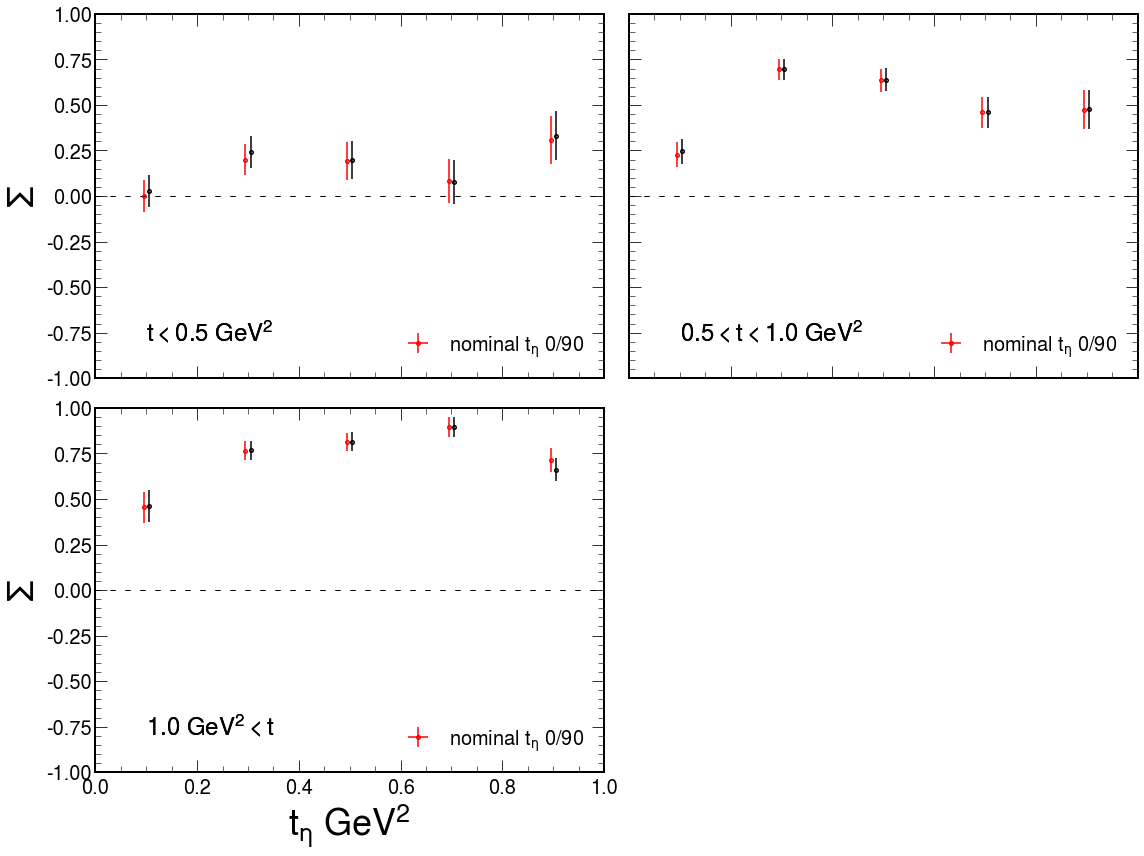

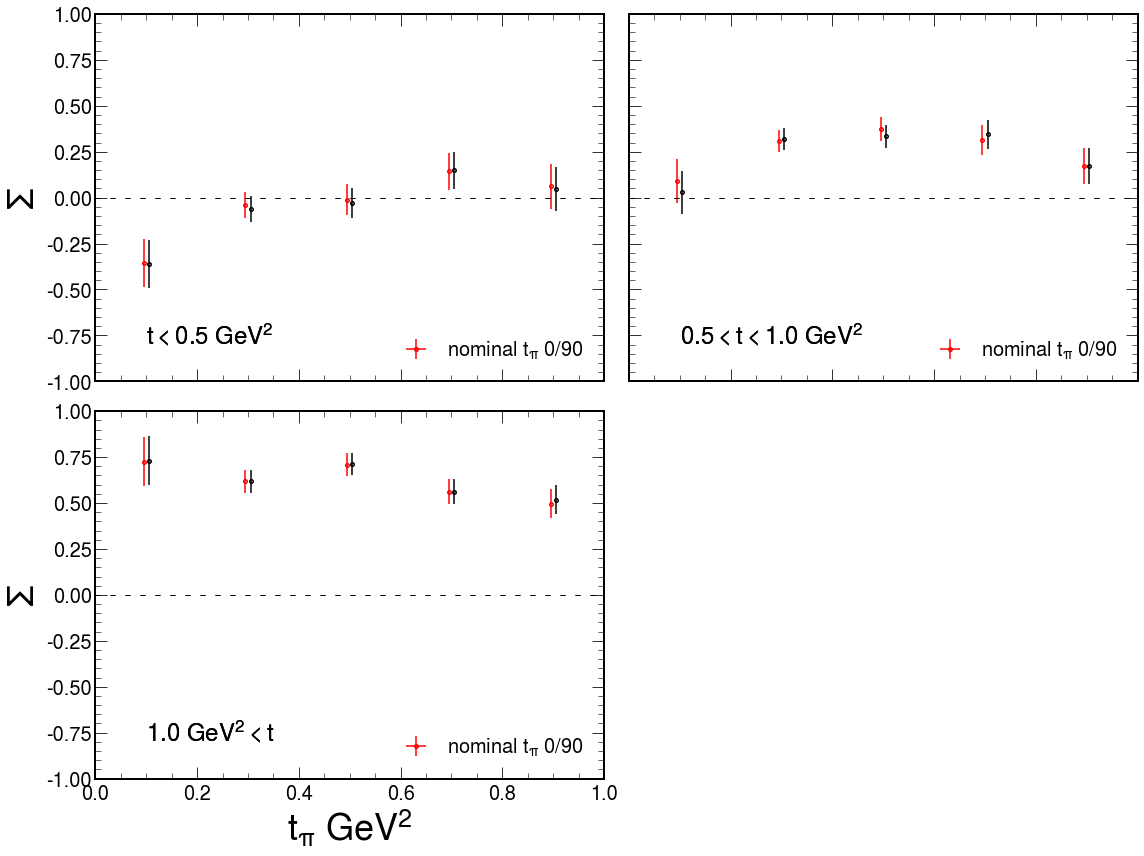

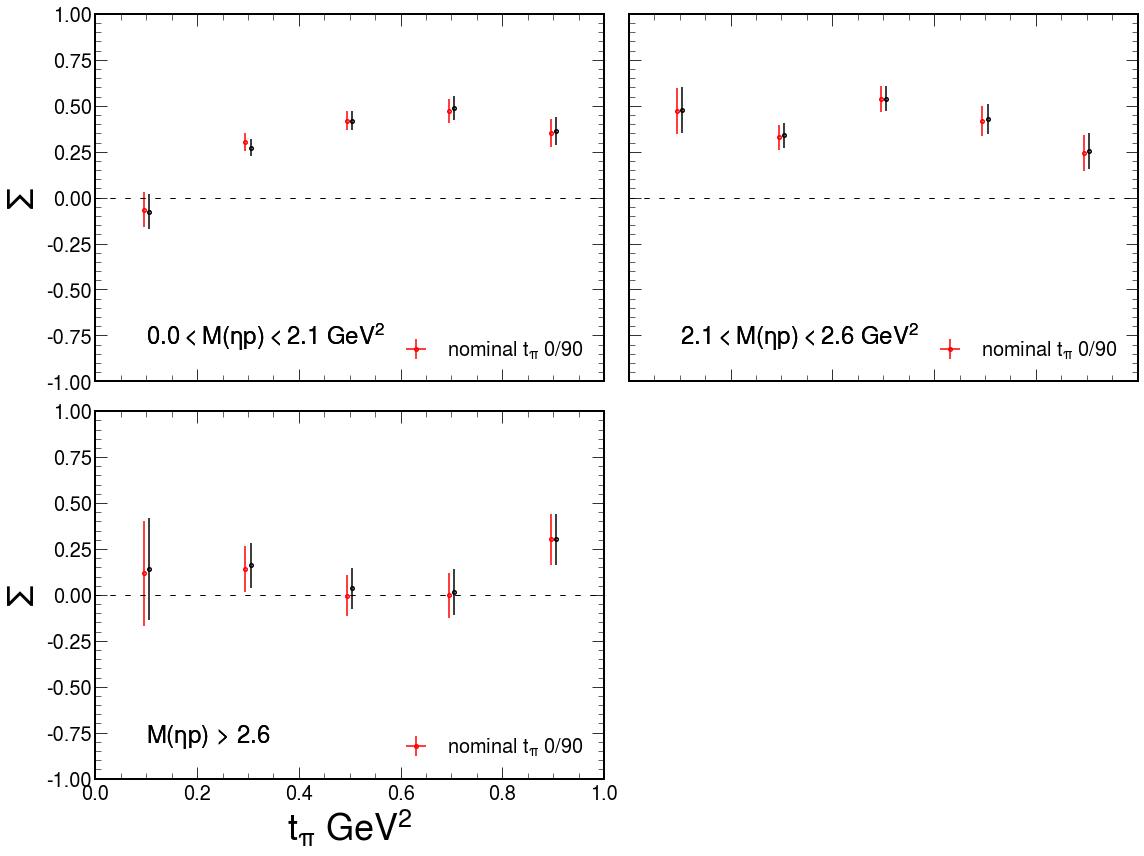

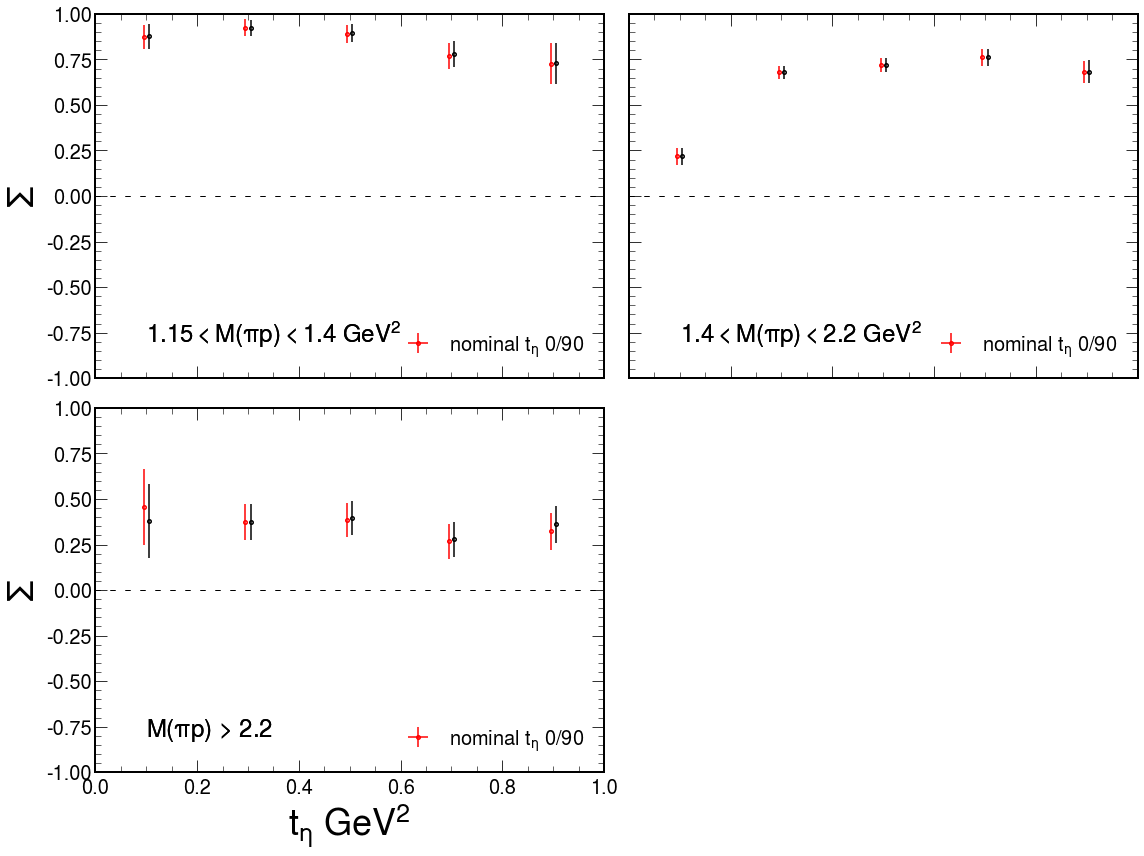

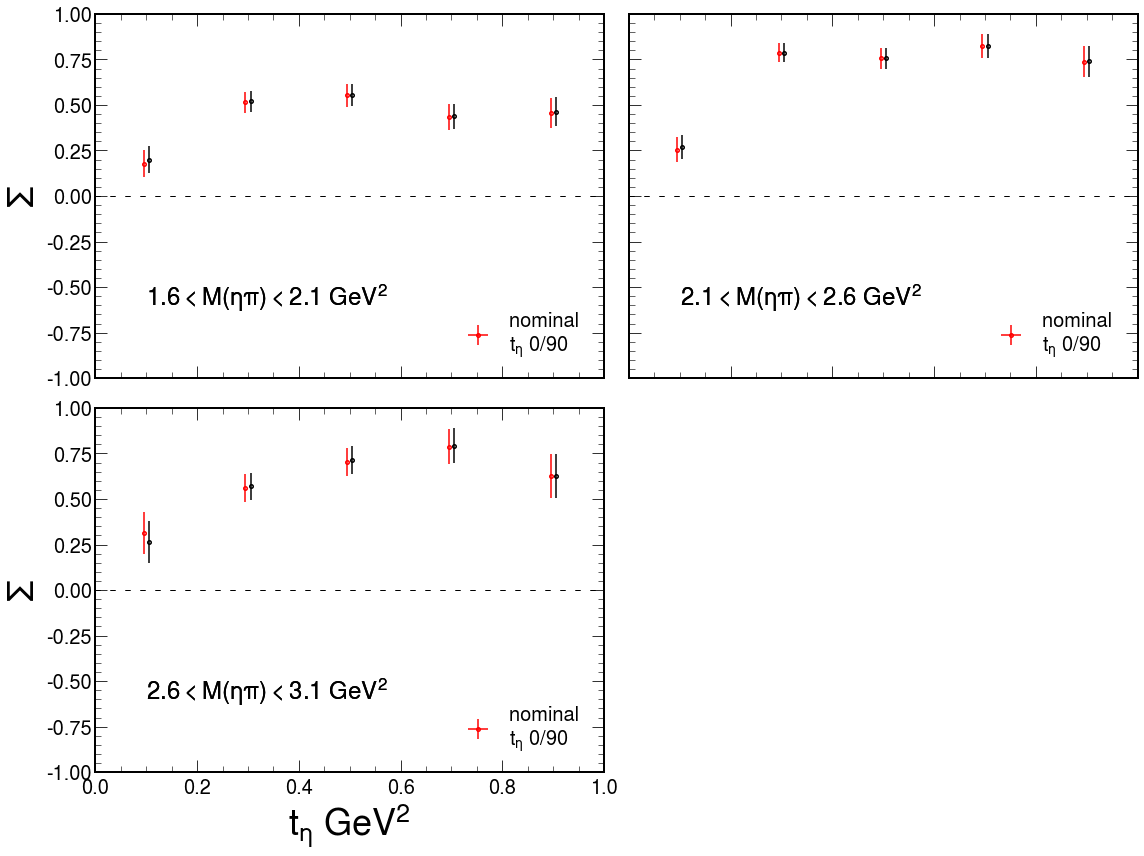

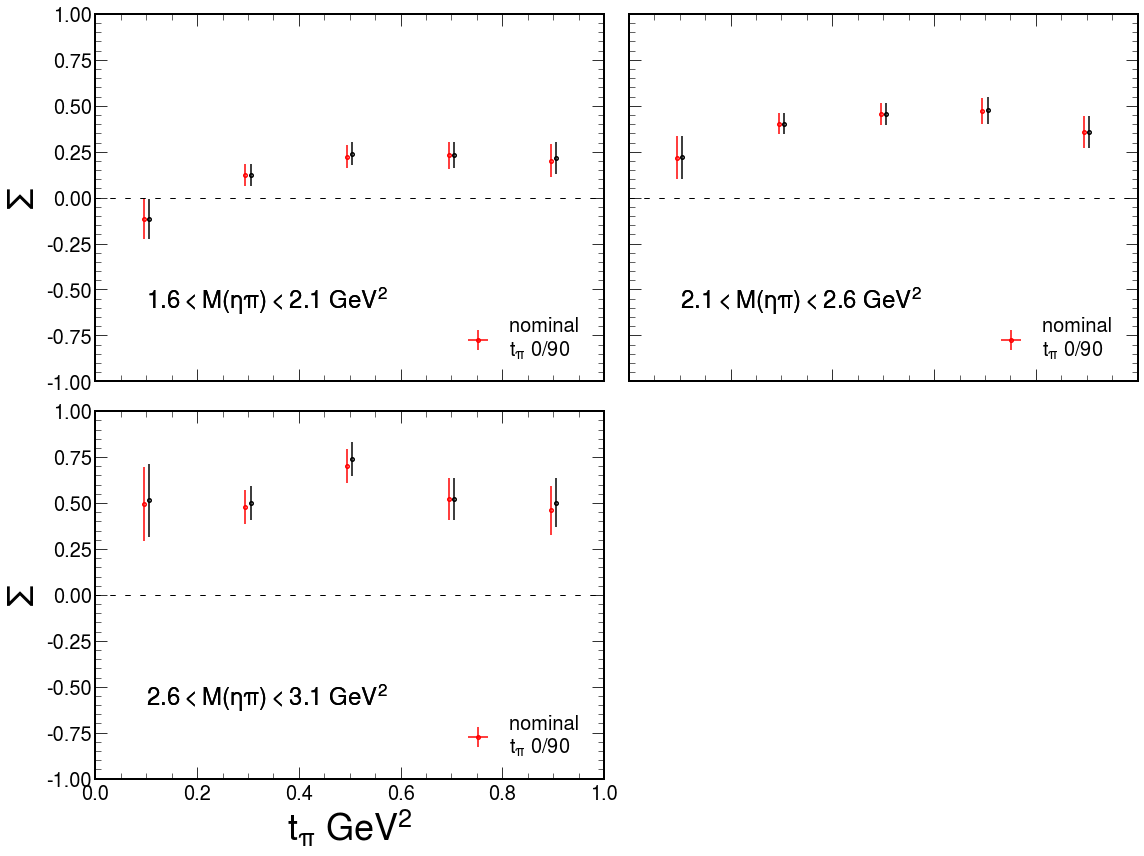

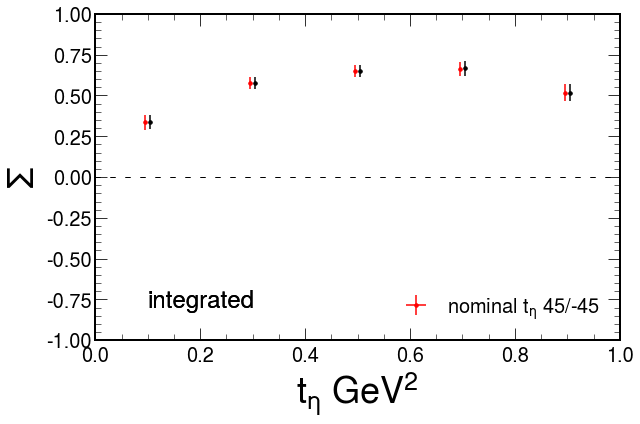

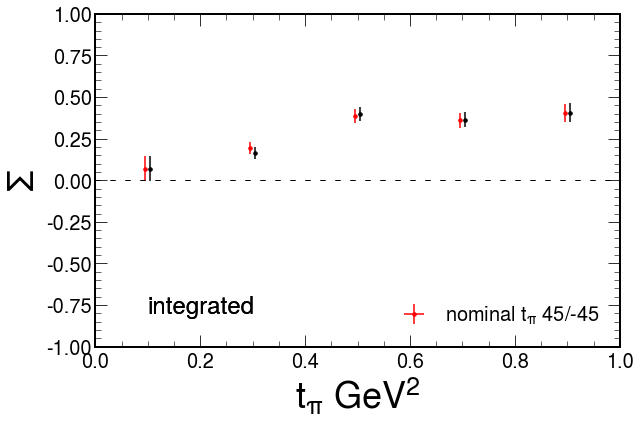

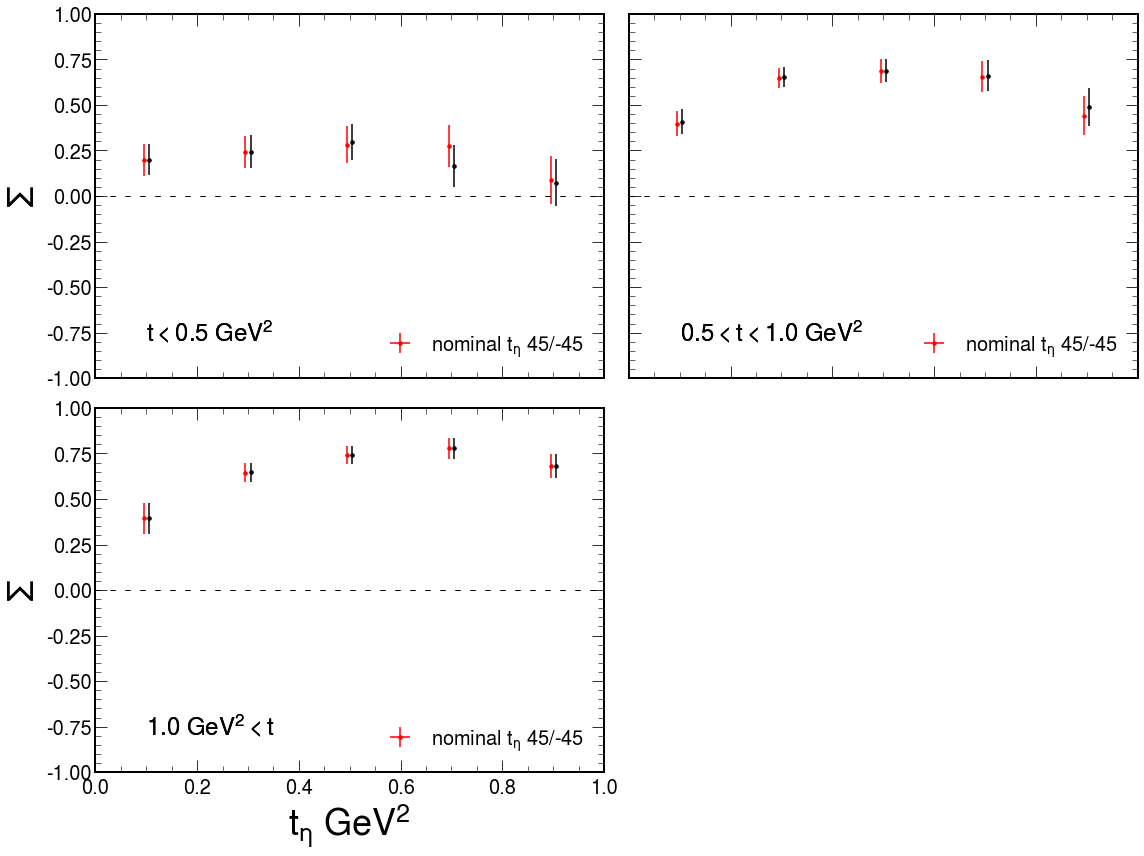

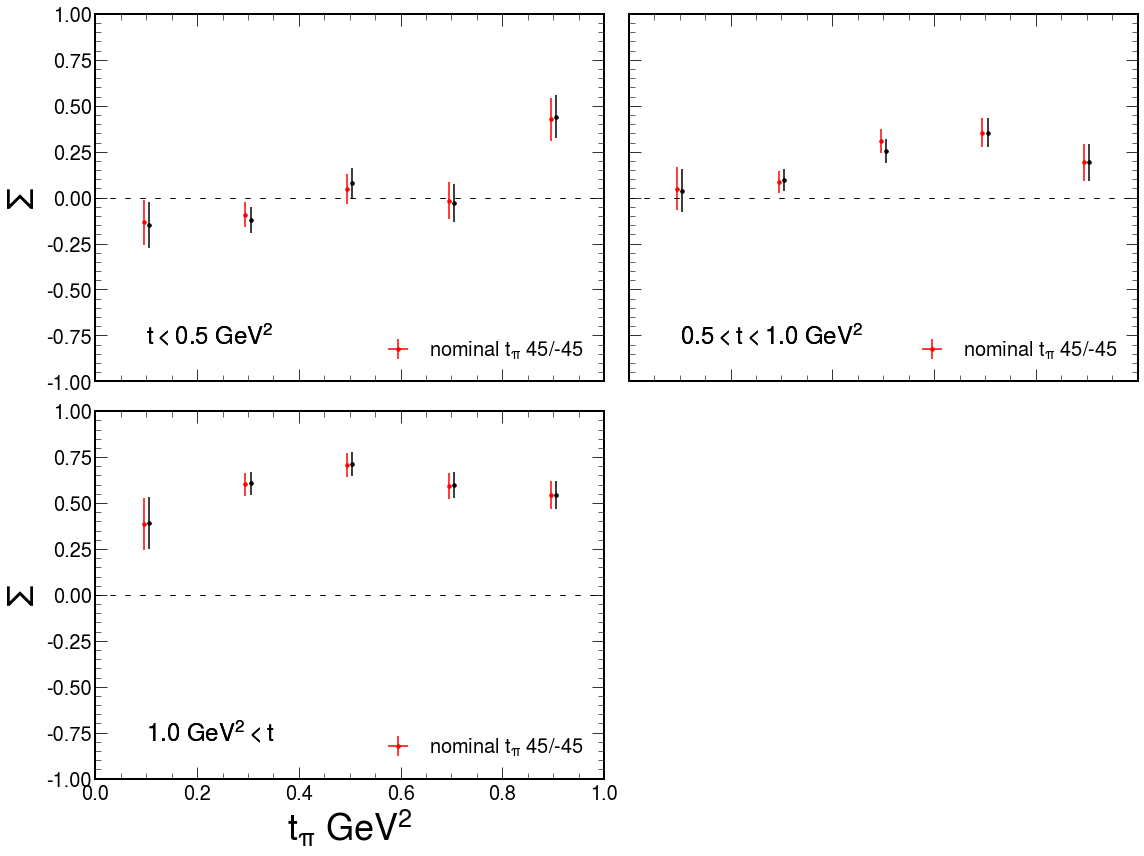

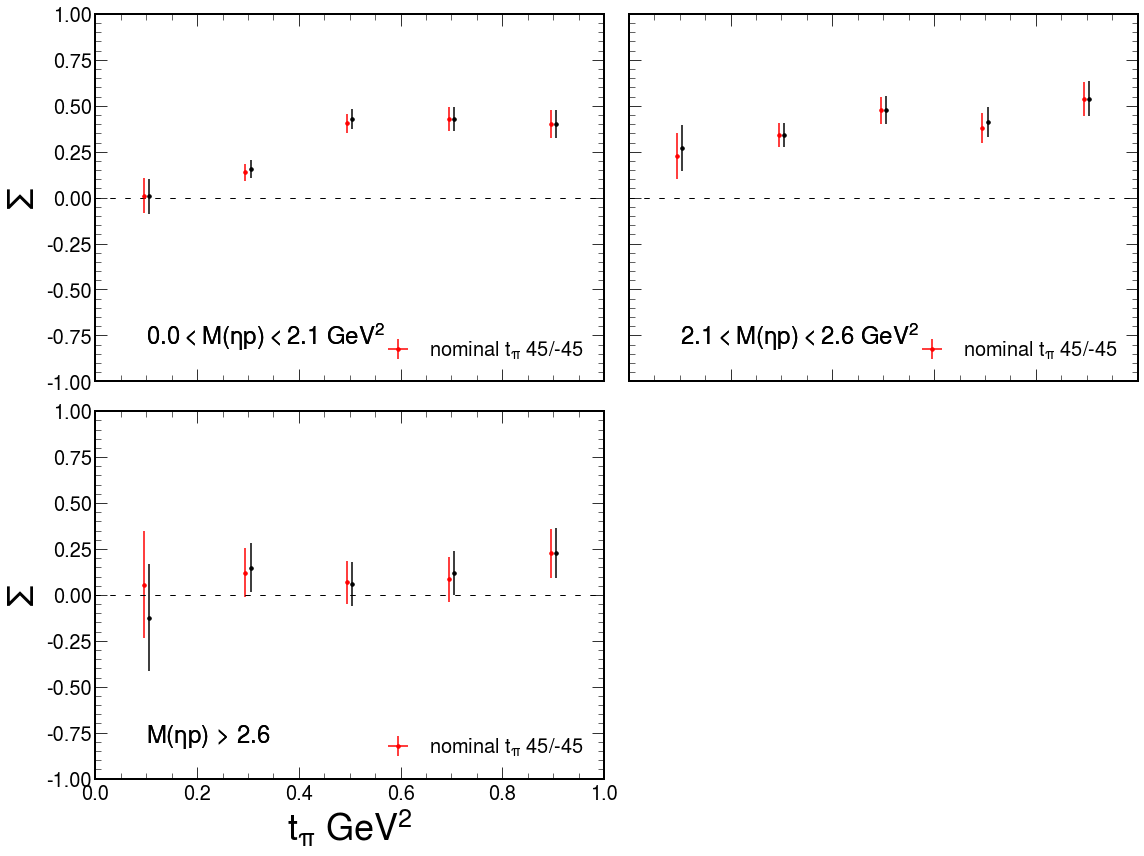

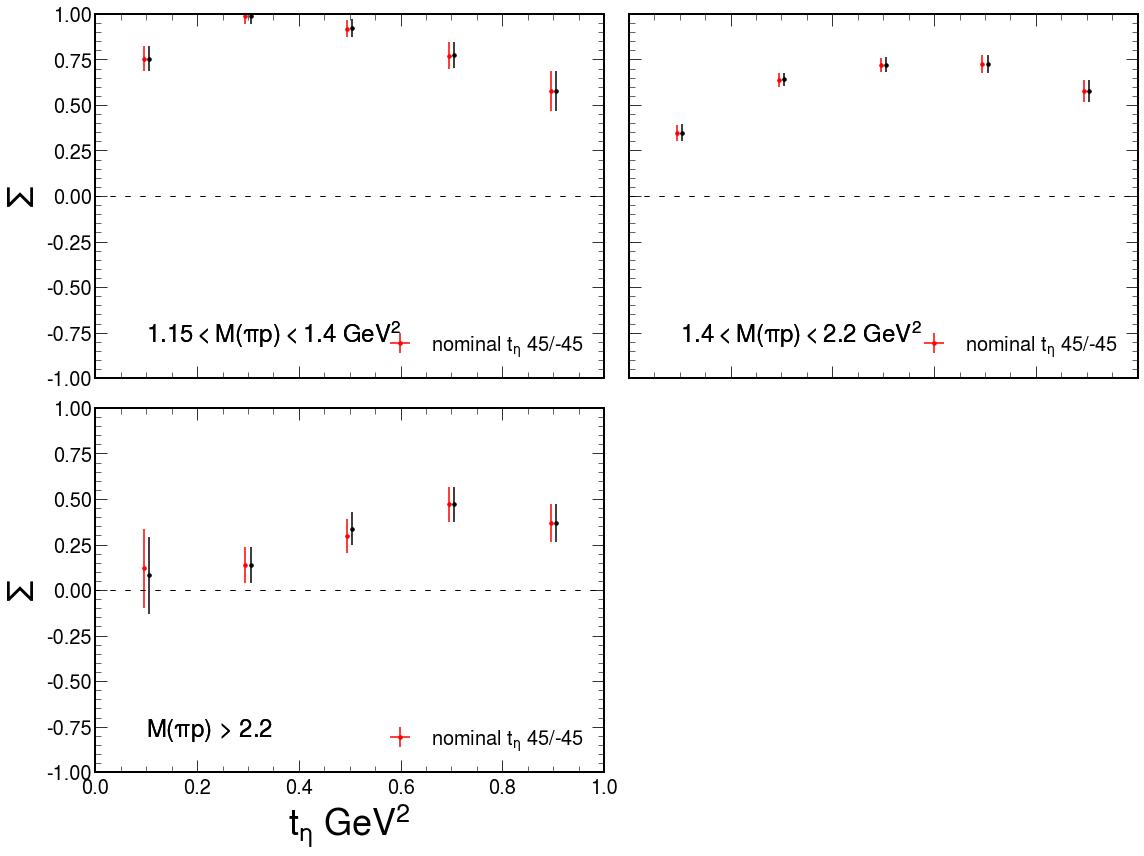

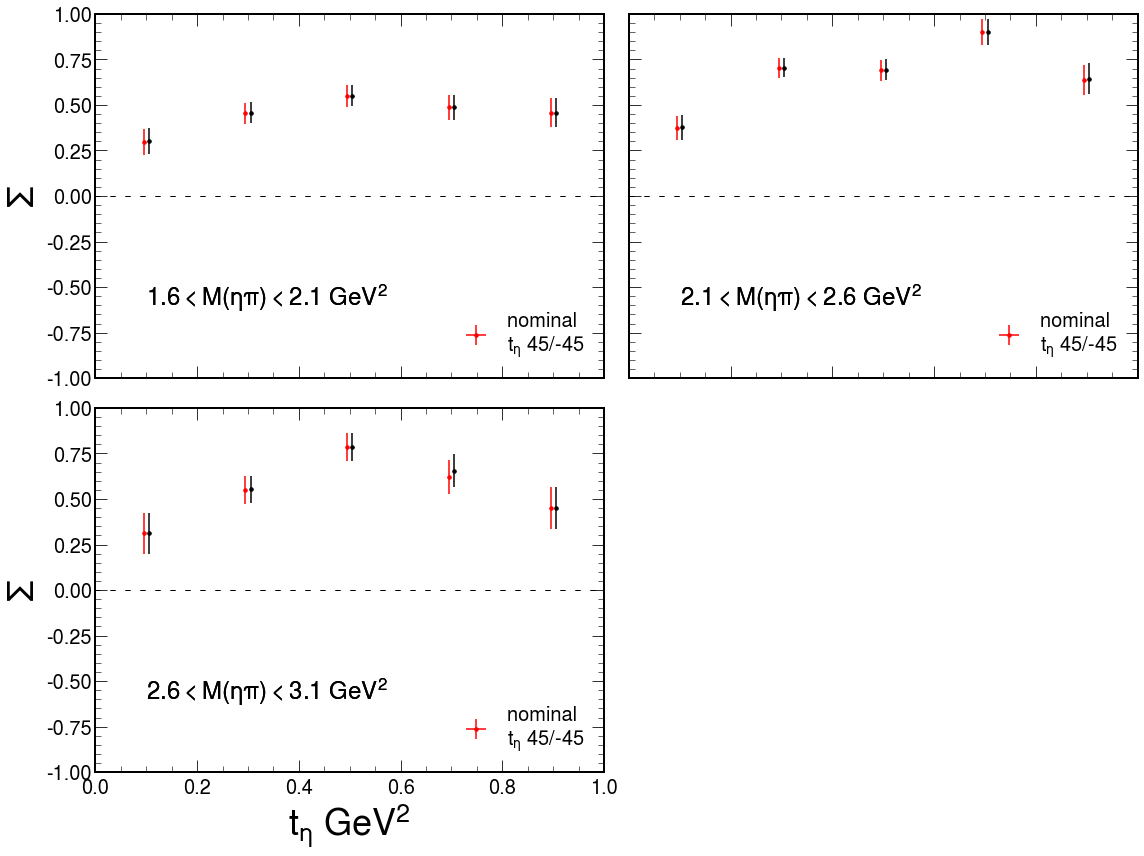

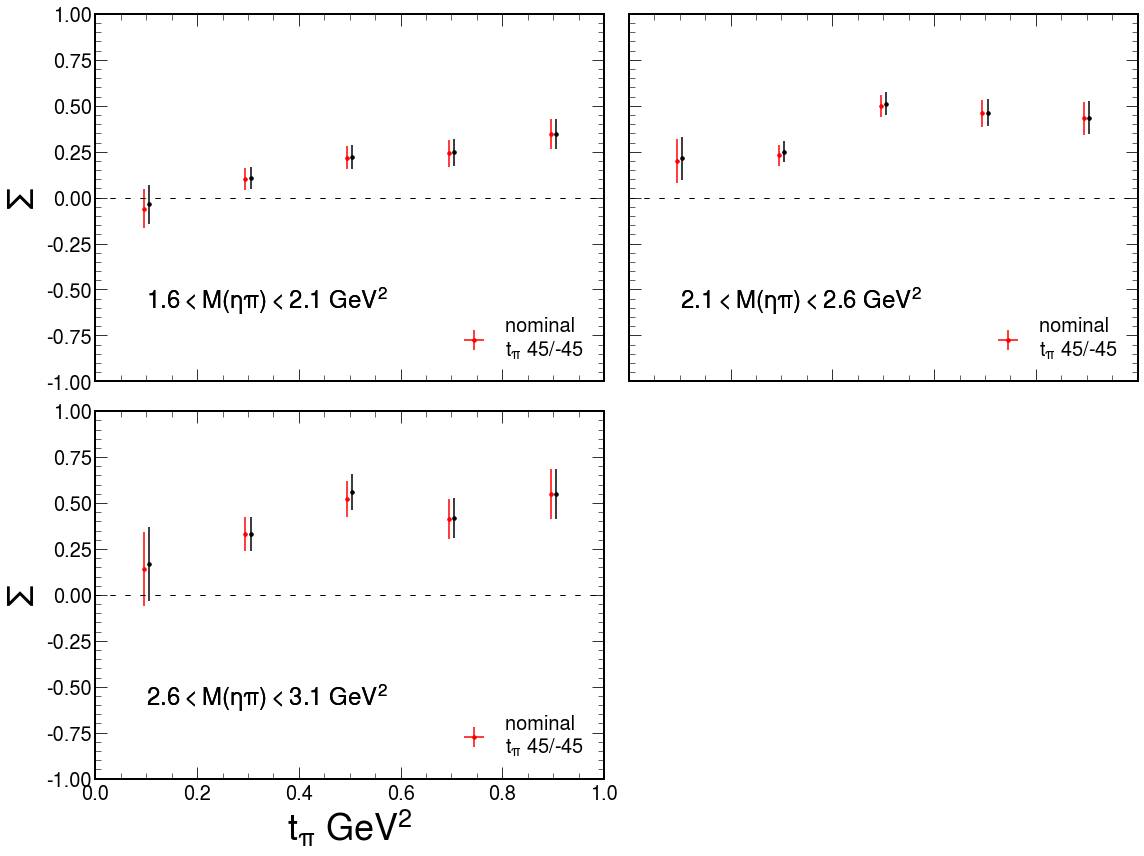

In [20]:
################## 
# Freed Phi Systematics
##################
systLabel="freePhi"
table_000=generateStandardSystematicsPlots(df,dfs_freePhase1,freePhiSystTags,"000",systLabel,-0.005,0.01,diffType="standard")
table_045=generateStandardSystematicsPlots(df,dfs_freePhase1,freePhiSystTags,"045",systLabel,-0.005,0.01,diffType="standard")

# MONTAGE THE RESULTS
files=[
    [saveFolder+"binned_setap_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_spi0p_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"]
]
for file in files:
    prefix,affix=file
    infiles=" ".join([prefix+"000"+affix,prefix+"045"+affix])
    outputname=prefix.split("/")
    outputname.insert(2,"finalResults")
    outputname="/".join(outputname)+"montage"+affix
    cmd="montage "+infiles+" -mode concatenate -tile 1x2 "+outputname
    print(cmd)
    os.system(cmd)
    

prettyTable(table_000,"lllllll","freeing the phase offset, $\phi_{0}$.","freePhi","000",["integrated"])
prettyTable(table_045,"lllllll","freeing the phase offset, $\phi_{0}$.","freePhi","045",["integrated"])

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The 

montage results/binned_setap_fluxNormSyst_pi0_000_ASBS.pdf results/binned_setap_fluxNormSyst_pi0_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_setap_fluxNormSyst_pi0_/finalResultsmontage_ASBS.pdf
montage results/binned_spi0p_fluxNormSyst_eta_000_ASBS.pdf results/binned_spi0p_fluxNormSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_spi0p_fluxNormSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/integrated_asym_fluxNormSyst_eta_000_ASBS.pdf results/integrated_asym_fluxNormSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/integrated_asym_fluxNormSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_u3_fluxNormSyst_eta_000_ASBS.pdf results/binned_u3_fluxNormSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_u3_fluxNormSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_s12_fluxNormSyst_eta_000_ASBS.pdf results/binned_s12_fluxNormSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_s12_fluxNormSyst_eta_/final

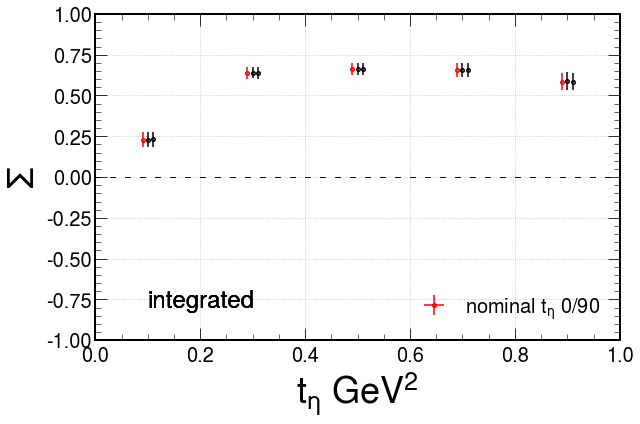

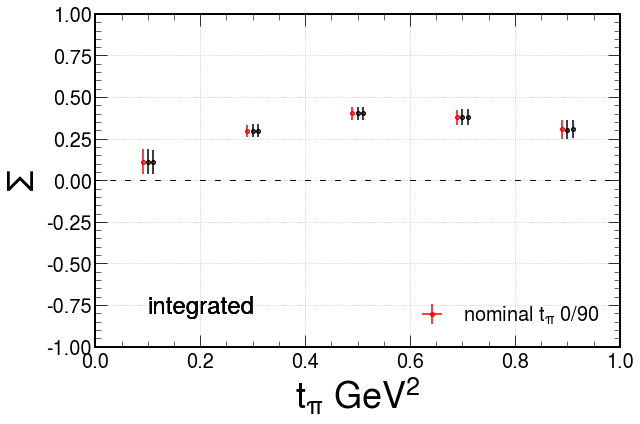

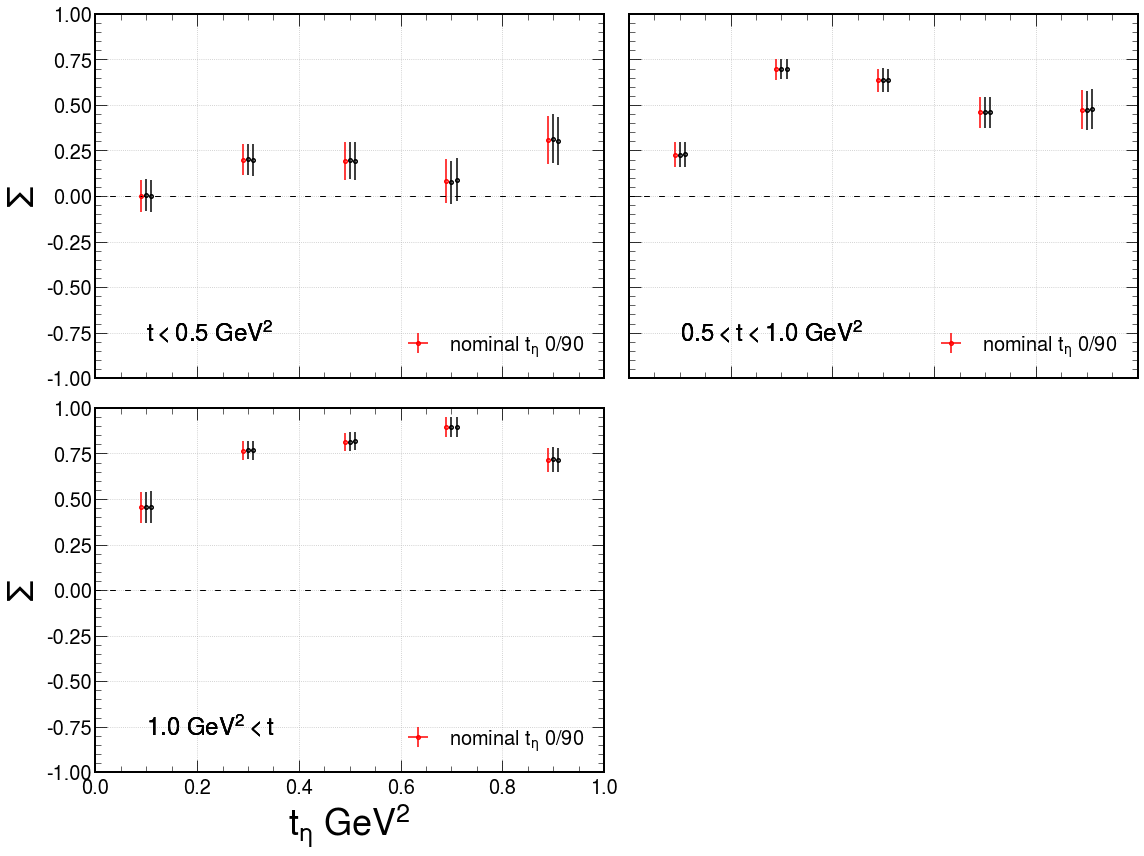

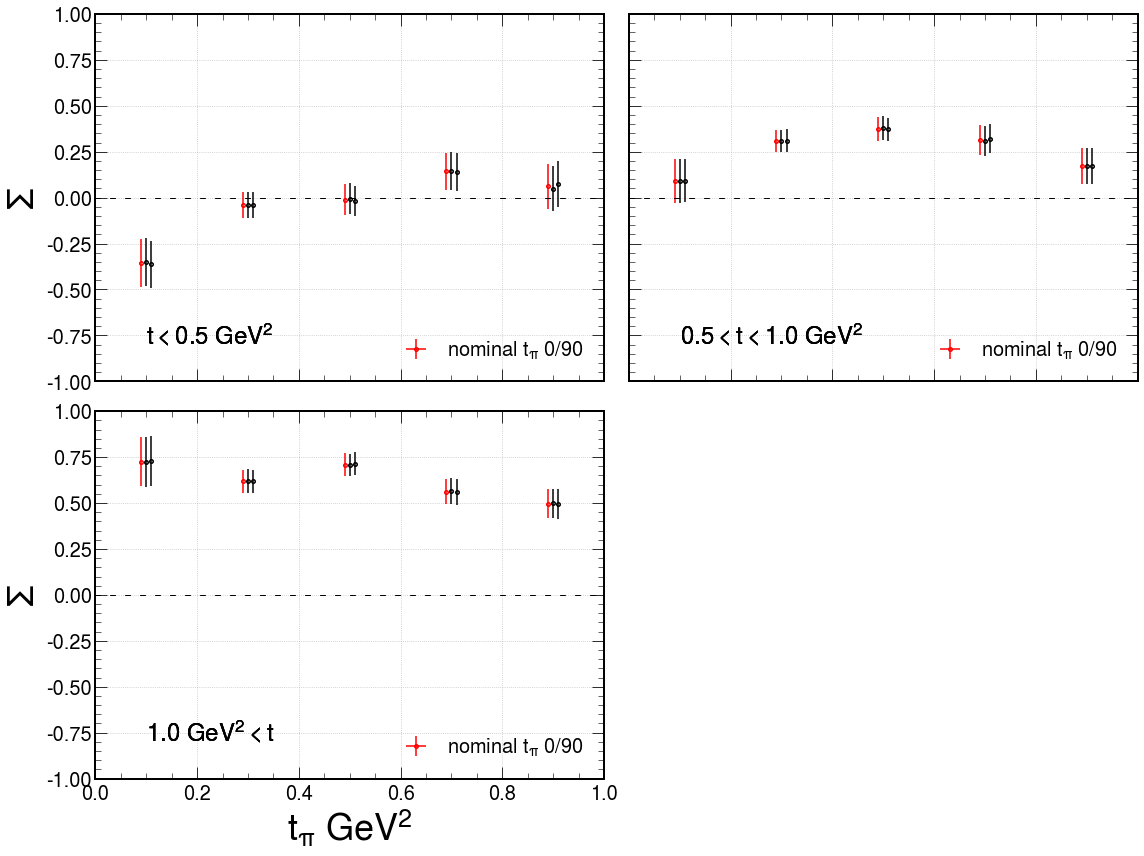

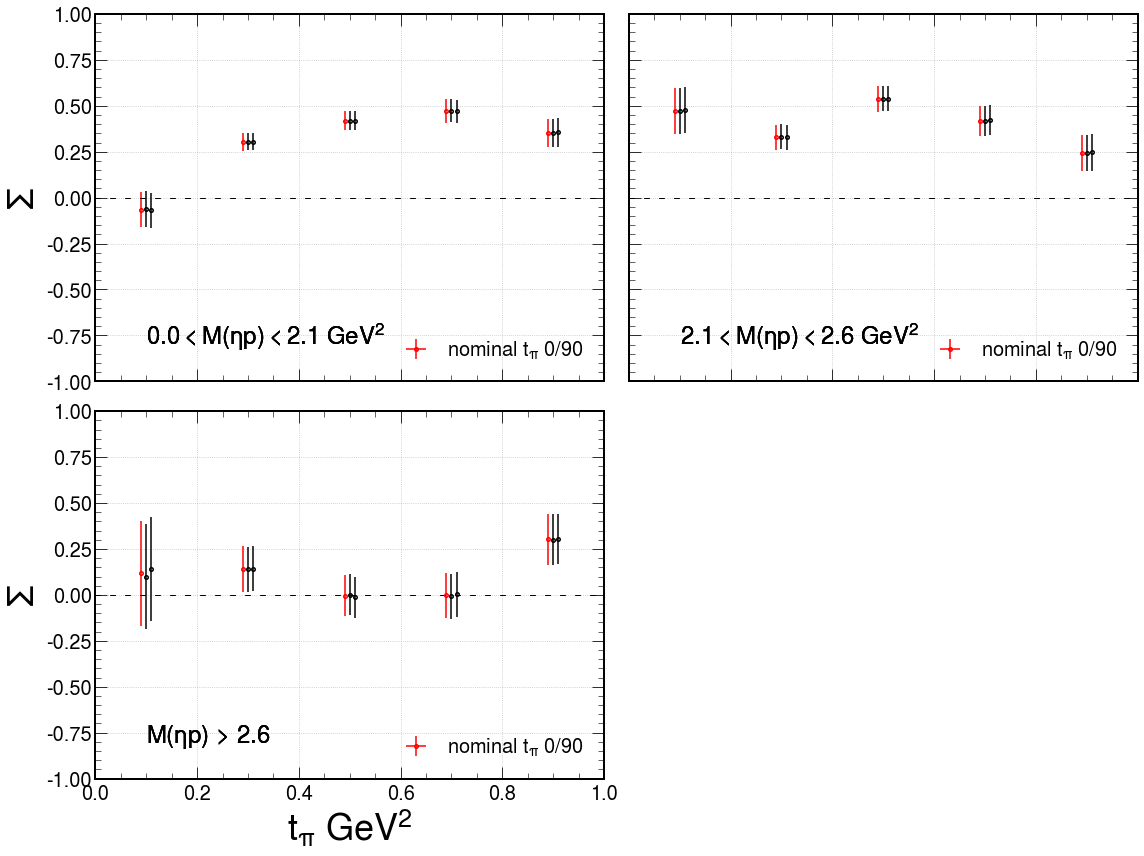

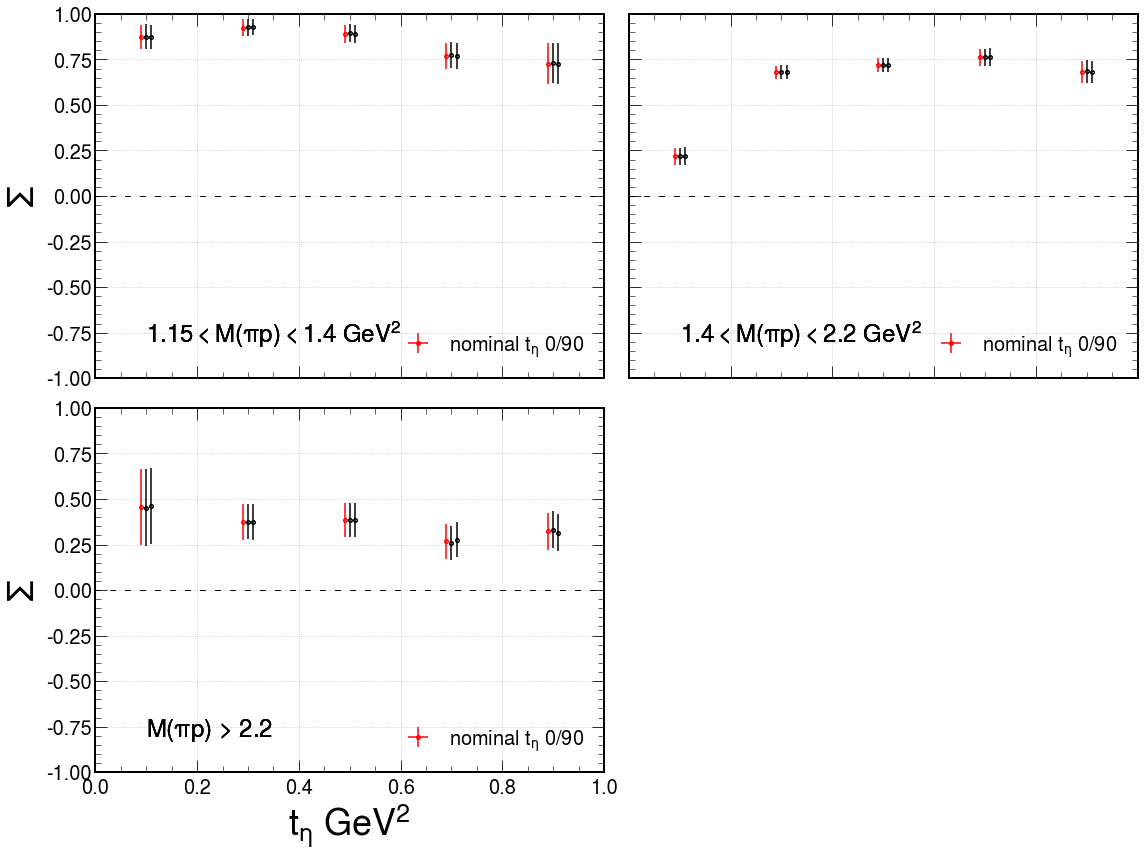

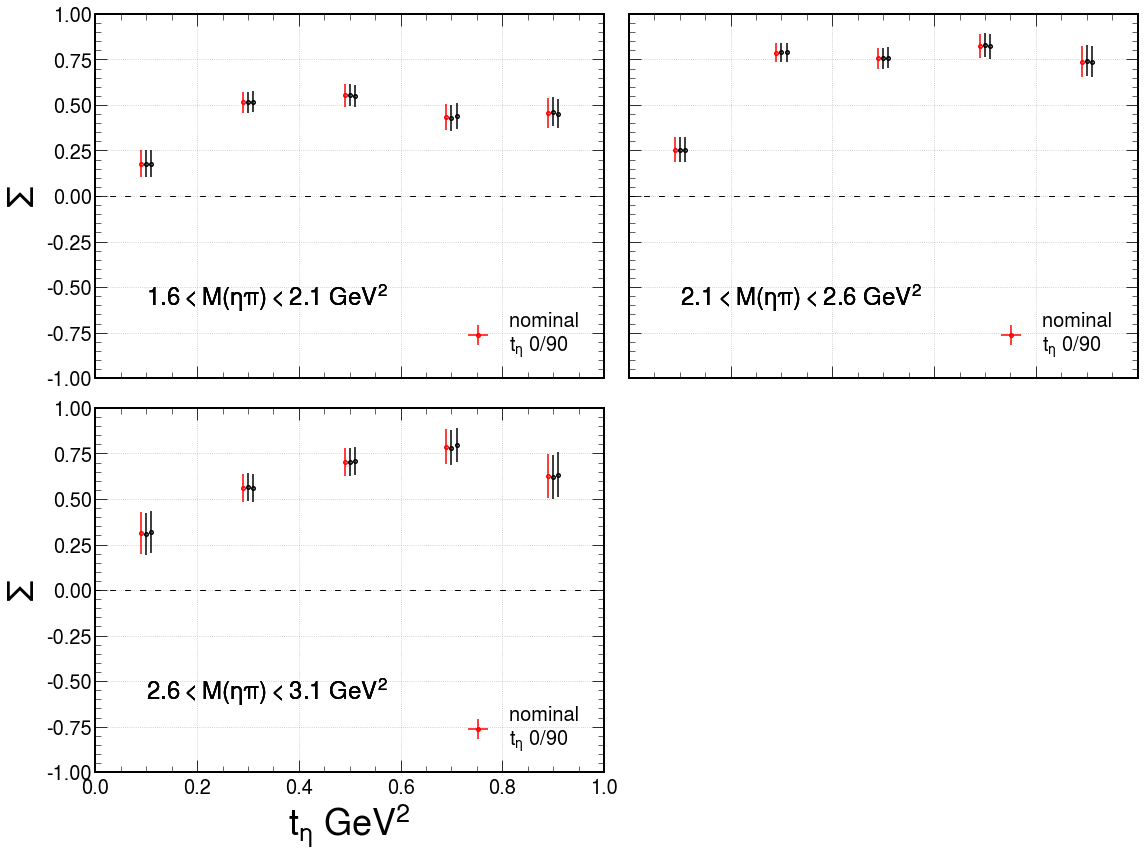

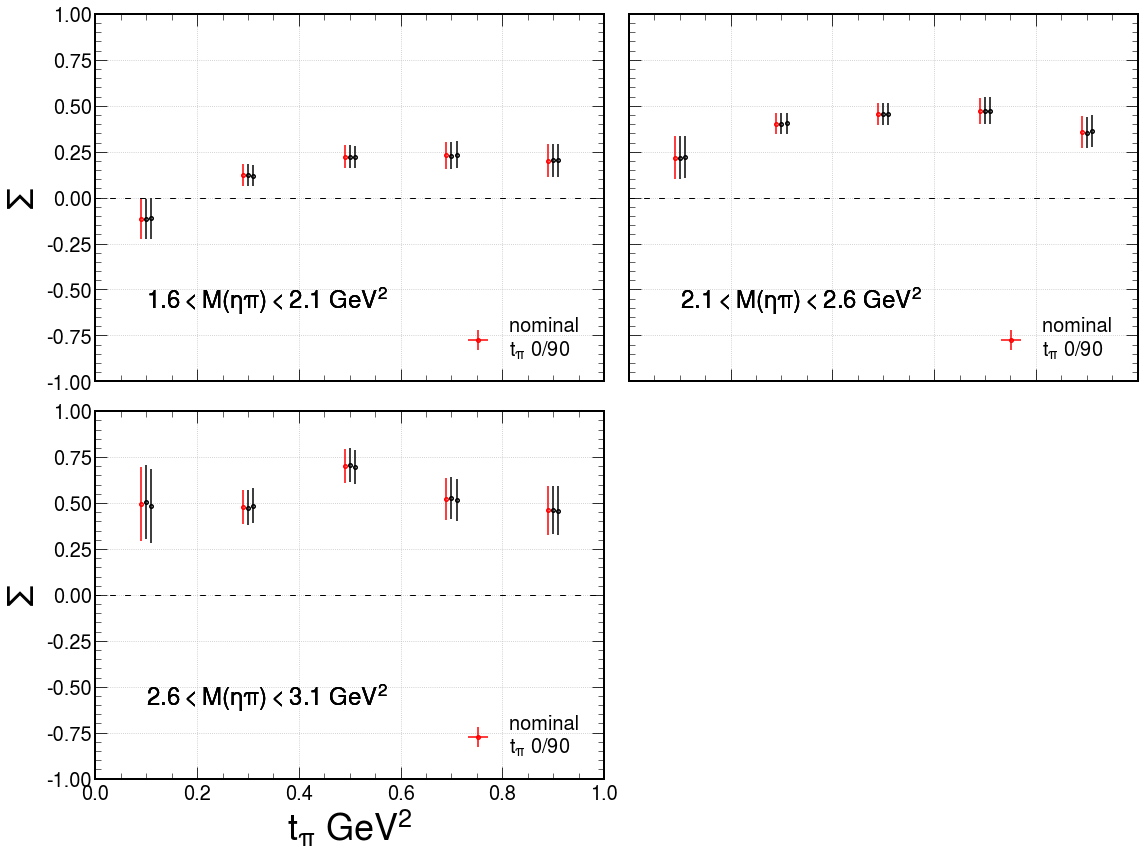

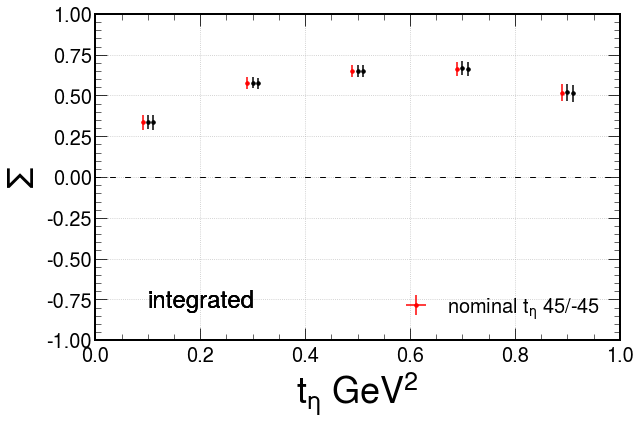

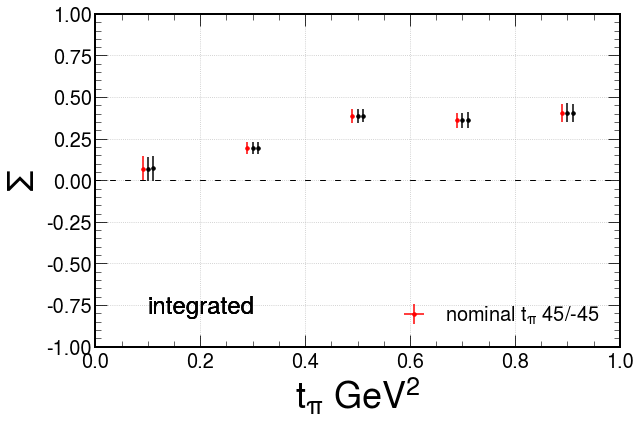

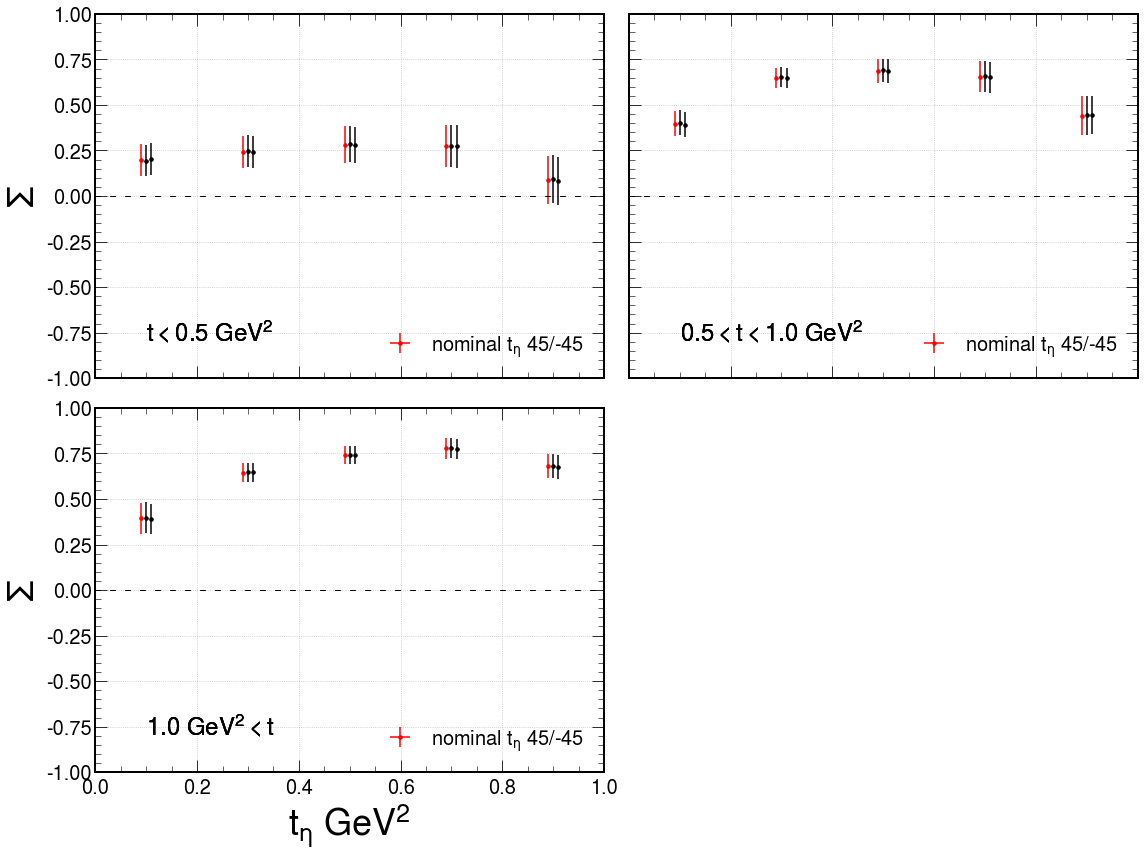

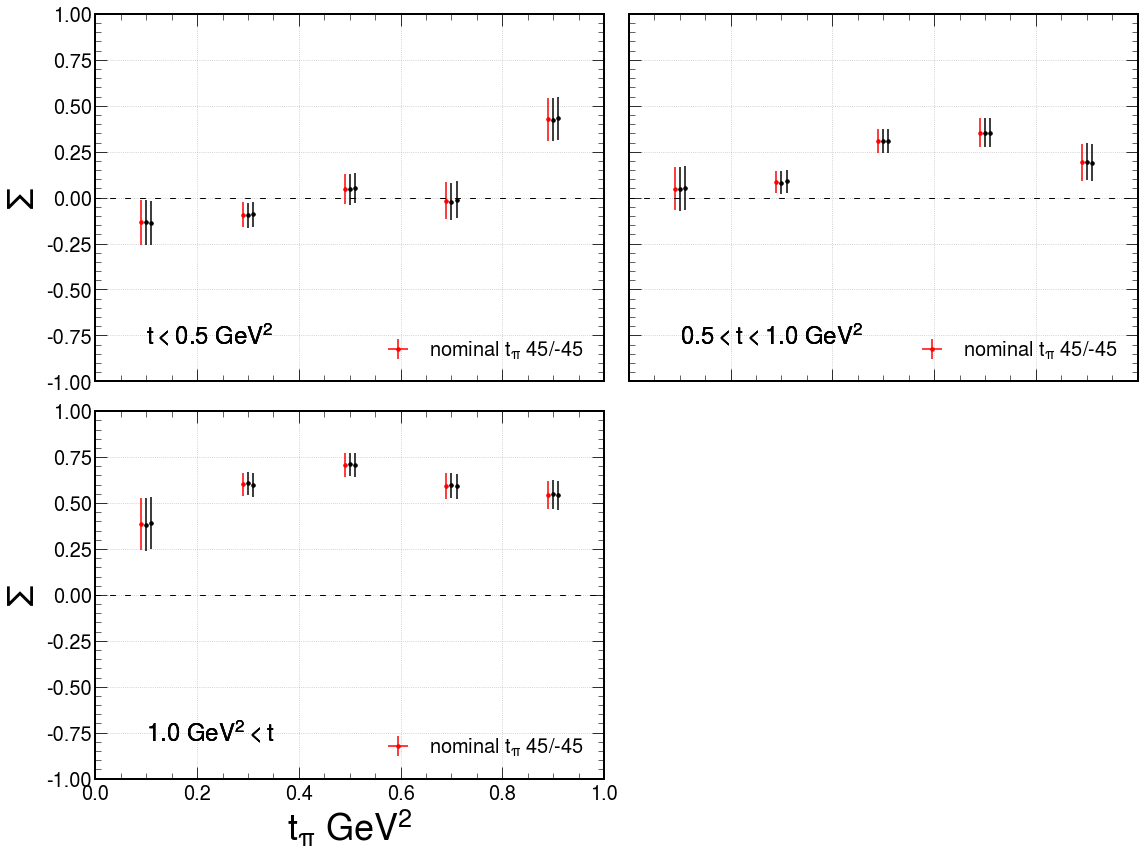

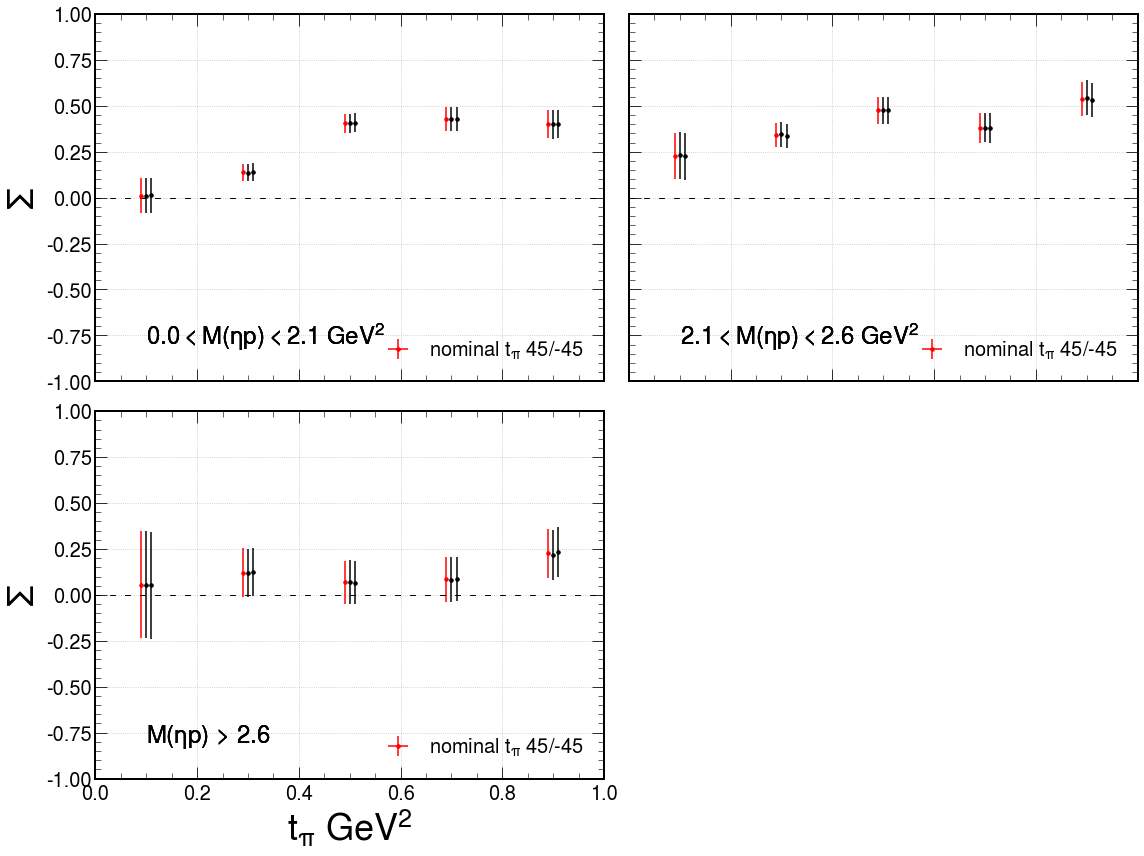

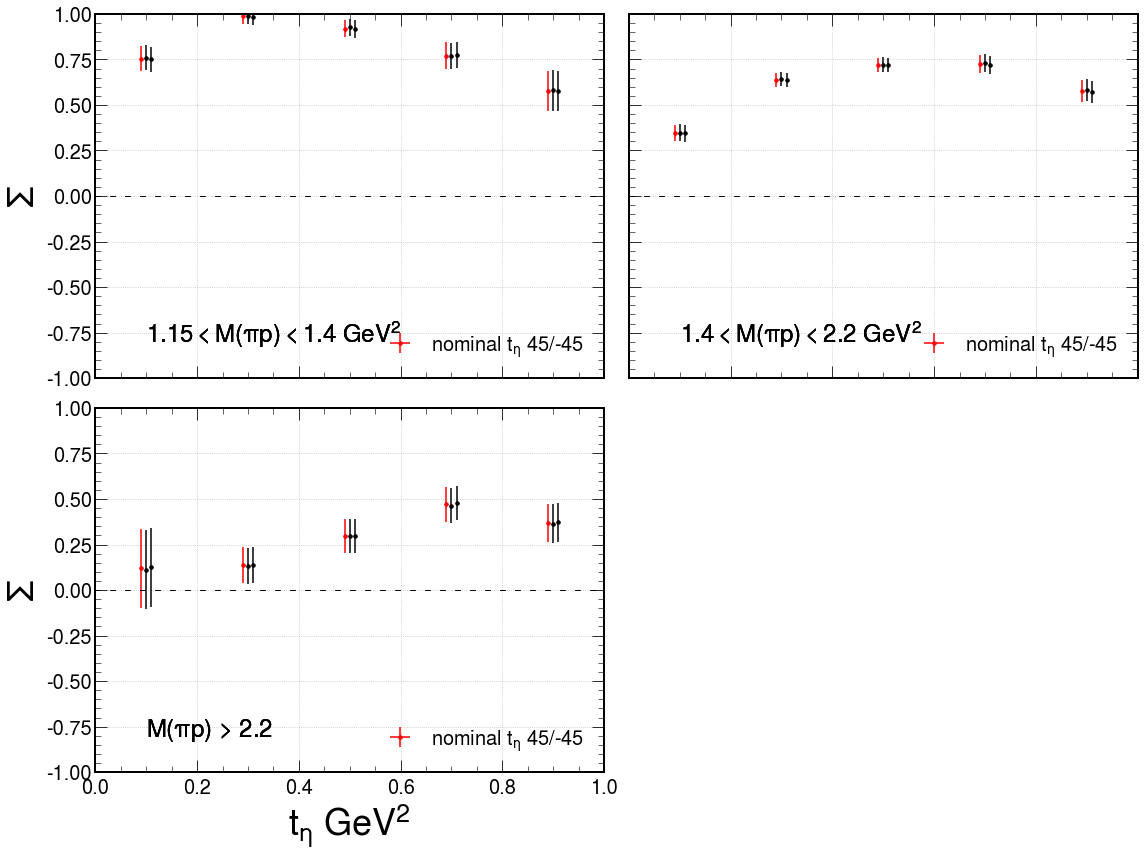

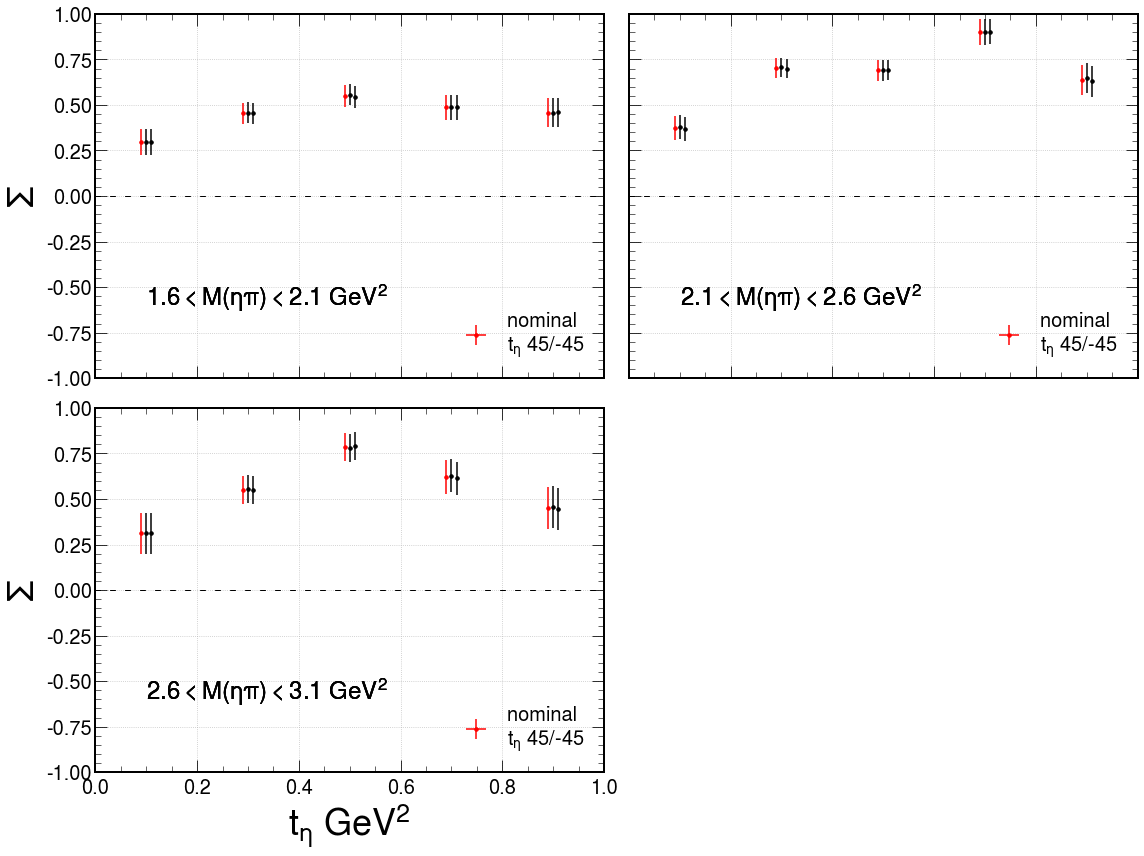

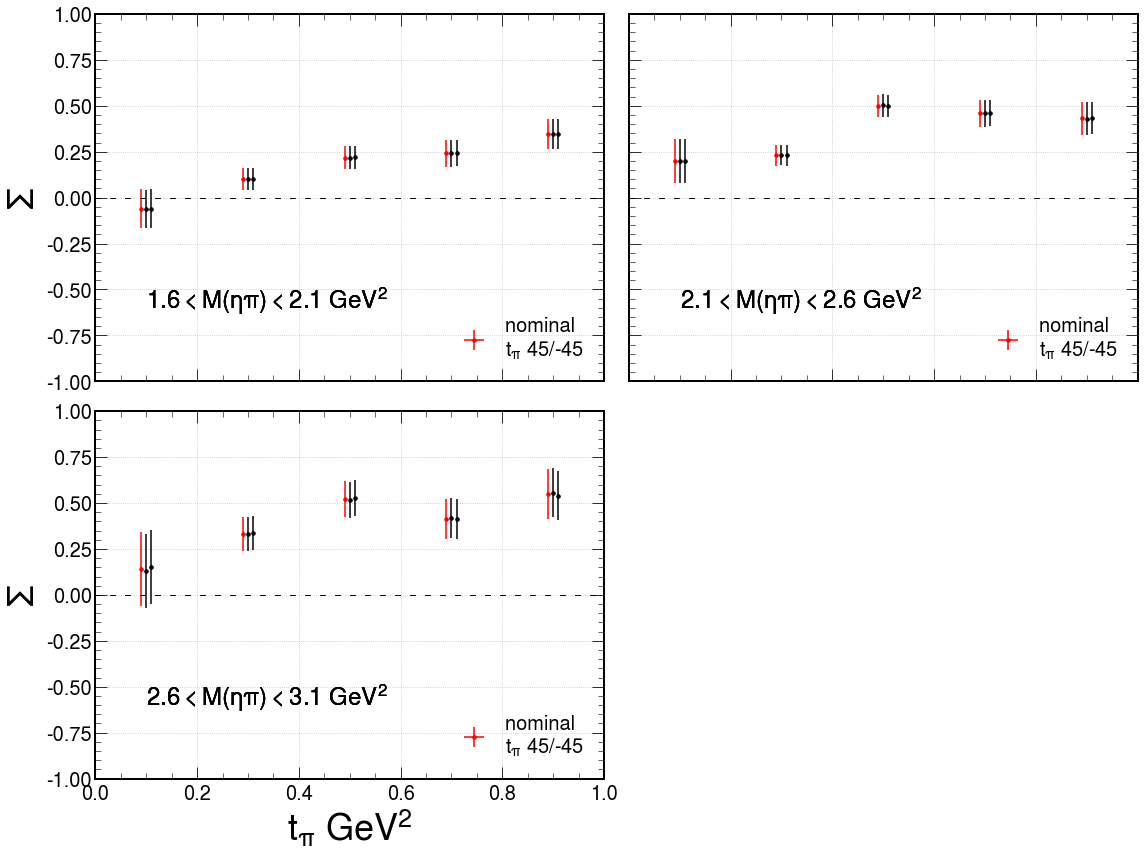

In [21]:
################## 
# Flux Norm systematics
##################
systLabel="fluxNorm"
table_000=generateStandardSystematicsPlots(df,dfs_fluxNorm1,fluxNormSystTags,"000",systLabel,-0.01,0.01,diffType="standard")
table_045=generateStandardSystematicsPlots(df,dfs_fluxNorm1,fluxNormSystTags,"045",systLabel,-0.01,0.01,diffType="standard")

# MONTAGE THE RESULTS
files=[
    [saveFolder+"binned_setap_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_spi0p_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"]
]
for file in files:
    prefix,affix=file
    infiles=" ".join([prefix+"000"+affix,prefix+"045"+affix])
    outputname=prefix.split("/")
    outputname.insert(2,"finalResults")
    outputname="/".join(outputname)+"montage"+affix
    cmd="montage "+infiles+" -mode concatenate -tile 1x2 "+outputname
    print(cmd)
    os.system(cmd)
    
prettyTable(table_000,"lllllll","varying the flux normalization by $\pm$5\%.","fluxNorm","000",["integrated"])
prettyTable(table_045,"lllllll","varying the flux normalization by $\pm$5\%.","fluxNorm","045",["integrated"])

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


\begin{table}[h!]
\centering
\begin{tabular}{rrrrrr}
\hline
Empty DataFrame
Columns: Index(['N Barlow $\sigma$', '\% Difference', '$\Sigma_{nominal}$',
       '$\Sigma_{variation}$', '$t_{1}$ bin (GeV/$c^2$)', 'Cut Variation'],
      dtype='object')
Index: RangeIndex(start=0, stop=0, step=1) \\
\hline
\end{tabular}
\caption{For the Integrated case. Selections with N $\sigma_{barlow}>2$ are shown for $\eta$ in the 0/90 polarization pair.}
\label{table:barlow_eta000}
\end{table}
\begin{table}[h!]
\centering
\begin{tabular}{||llllll||}
\hline
N Barlow $\sigma$ & \% Difference & $\Sigma_{nominal}$ & $\Sigma_{variation}$ & $t_{1}$ bin (GeV/$c^2$) &     Cut Variation \\
\hline\hline
            9.224 &           3.6 &   0.576$\pm$0.0350 &     0.597$\pm$0.0349 &      0.2$<t_{\eta}<$0.4 &    Wide Sidebands \\
            2.816 &           3.0 &   0.576$\pm$0.0350 &     0.593$\pm$0.0356 &      0.2$<t_{\eta}<$0.4 &  Narrow Sidebands \\
            2.809 &           3.3 &   0.664$\pm$0.0437 &    

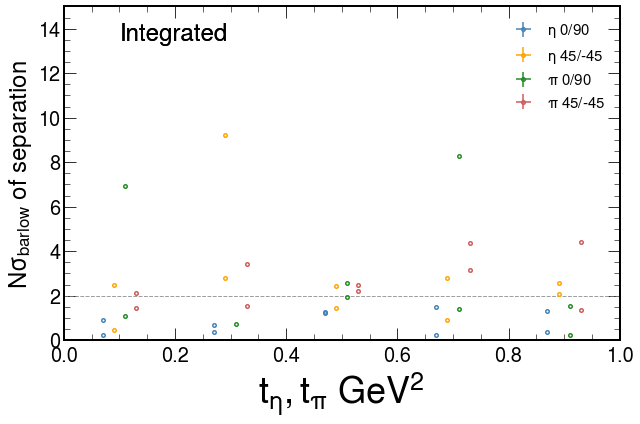

In [22]:
evtSystTags=["Narrow Sidebands","Wide Sidebands"]

##########################################
# Define labels and maps to generate the correct text
##########################################
selectionVariationMap={
    "Narrow Sidebands":"Narrow Sidebands",
    "Wide Sidebands":"Wide Sidebands",
}

##########################################
# Construct barlow plot
##########################################
shape=(1,1,)
fig,axes = plt.subplots(*shape,figsize=(9,6),sharex=True,sharey=True)
axes=[axes]
minvals=[0]
maxvals=[100]
labels=["Integrated"]

systVariationsBarlows={}
systVariationsSysts={}
systVariationsSystErrs={}
systVariationsNoms={}
systVariationsNomErrs={}
for label in labels:
    systVariationsBarlows[label]={}
    systVariationsSysts[label]={}
    systVariationsSystErrs[label]={}
    systVariationsNoms[label]={}
    systVariationsNomErrs[label]={}
    for i,systTag in enumerate(evtSystTags):
        includeInLegend=True if i==0 else False
        barlows,systs,noms,systErrs,nomErrs=plotBarlow(df,dfs_sbSyst1[systTag],axes,labels,"mandelstam_t",shape,"total",method,"asym",
                        minvals,maxvals,labels,markerFmt=".",includeInLegend=includeInLegend)
        systVariationsBarlows[label][systTag]=barlows[label]
        systVariationsSysts[label][systTag]=systs[label]
        systVariationsNoms[label][systTag]=noms[label]
        systVariationsSystErrs[label][systTag]=systErrs[label]
        systVariationsNomErrs[label][systTag]=nomErrs[label]
    constructTable(systVariationsBarlows,systVariationsSysts,systVariationsNoms,systVariationsSystErrs,systVariationsNomErrs,
                   evtSystTags,label,"llllll",caption="",nbarlowSignificant=2)
plt.savefig(saveFolder+"/finalResults/integrated_sbSyst_barlow"+outputTag+".pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The 

montage results/binned_setap_sbSyst_pi0_000_ASBS.pdf results/binned_setap_sbSyst_pi0_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_setap_sbSyst_pi0_/finalResultsmontage_ASBS.pdf
montage results/binned_spi0p_sbSyst_eta_000_ASBS.pdf results/binned_spi0p_sbSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_spi0p_sbSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/integrated_asym_sbSyst_eta_000_ASBS.pdf results/integrated_asym_sbSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/integrated_asym_sbSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_u3_sbSyst_eta_000_ASBS.pdf results/binned_u3_sbSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_u3_sbSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_s12_sbSyst_eta_000_ASBS.pdf results/binned_s12_sbSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_s12_sbSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/integrated_asym_sbSyst_pi0_000_ASBS.pdf results/in

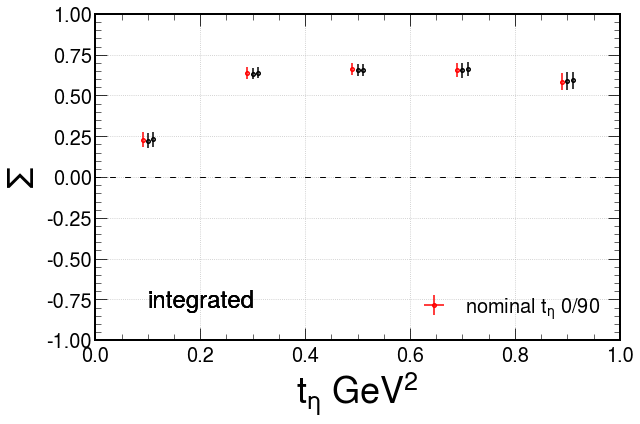

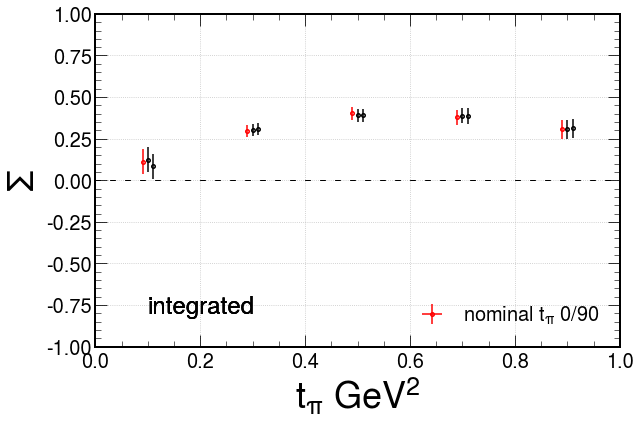

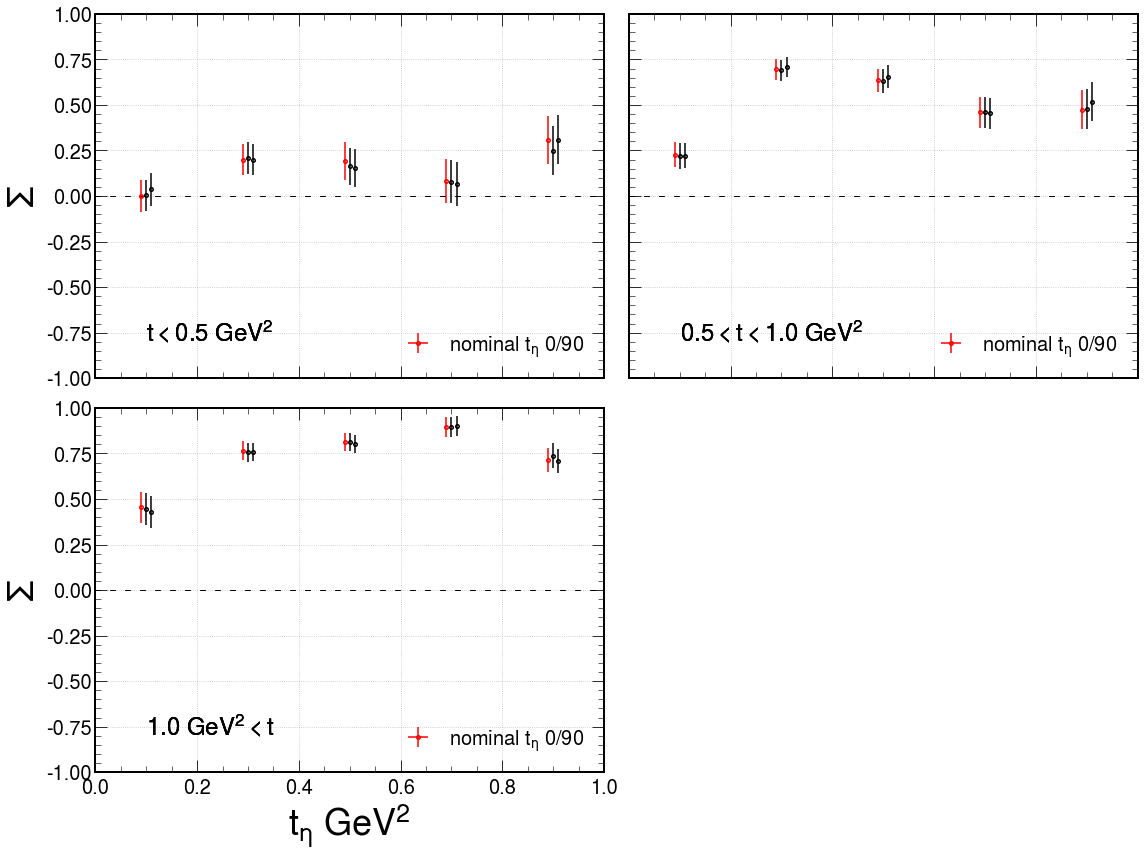

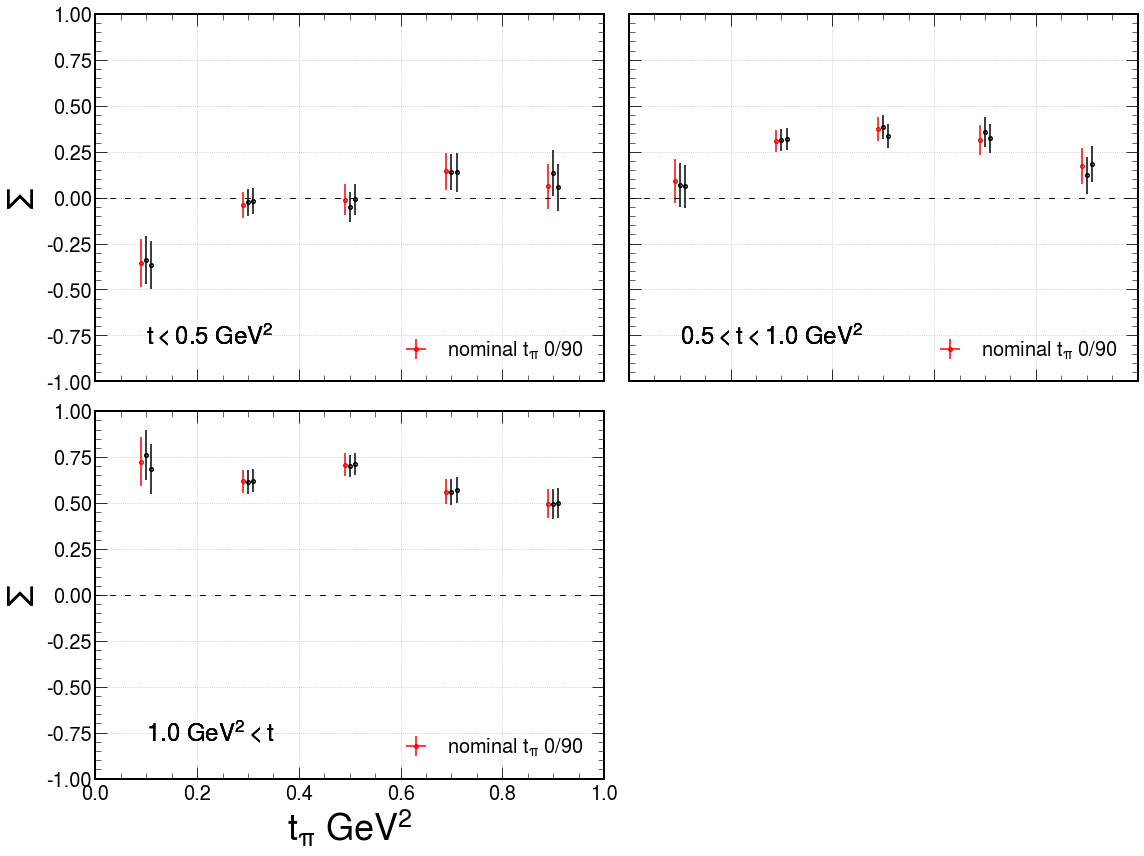

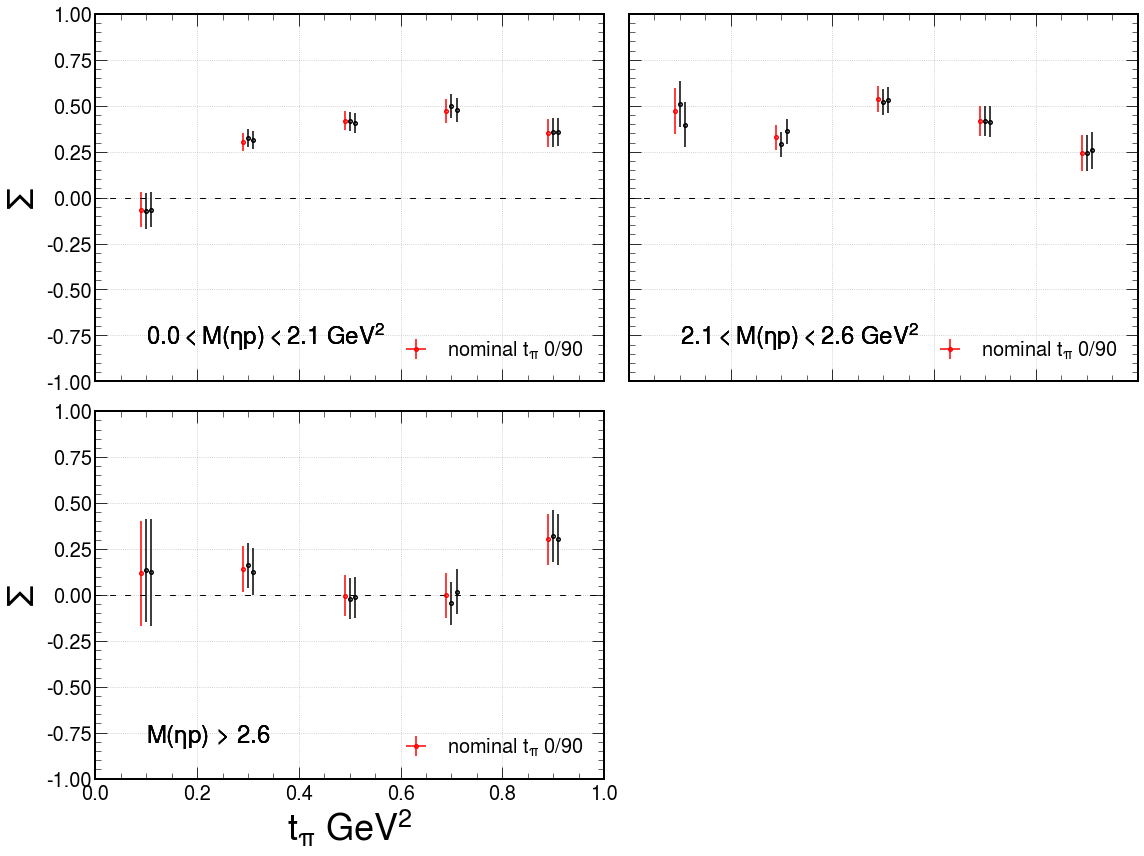

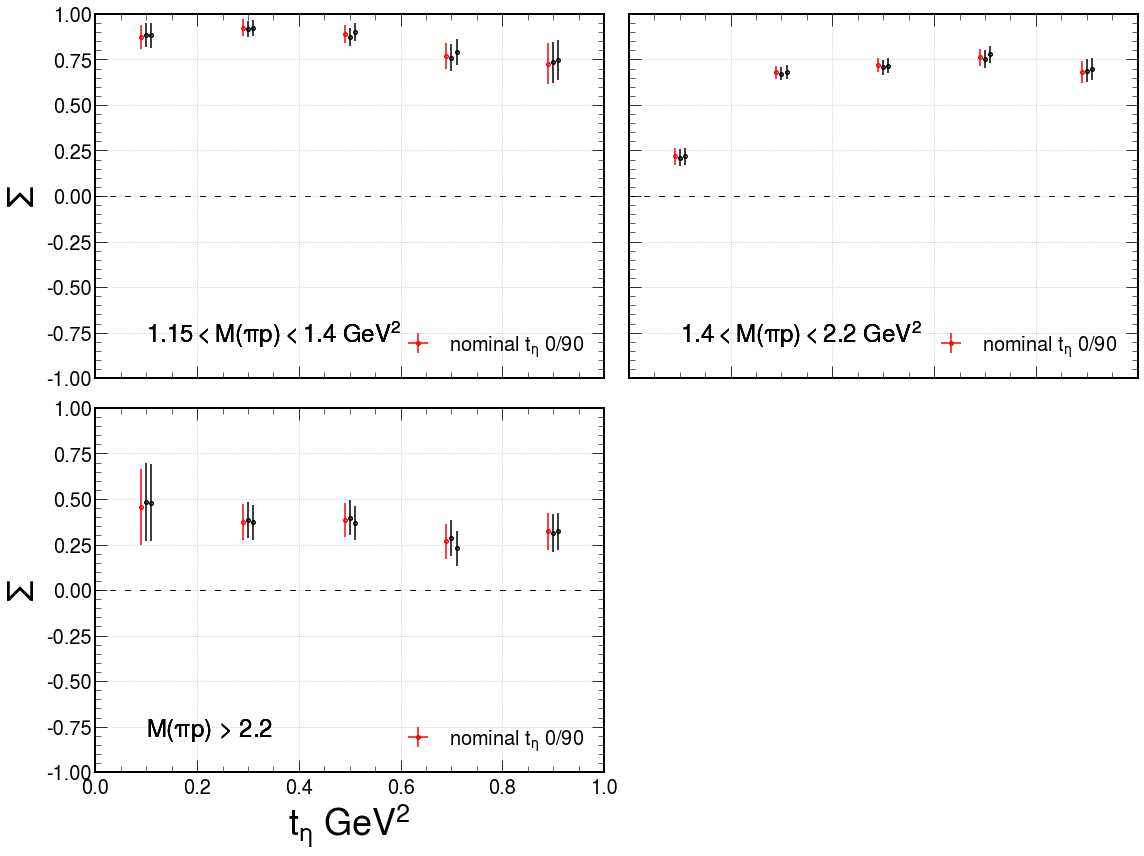

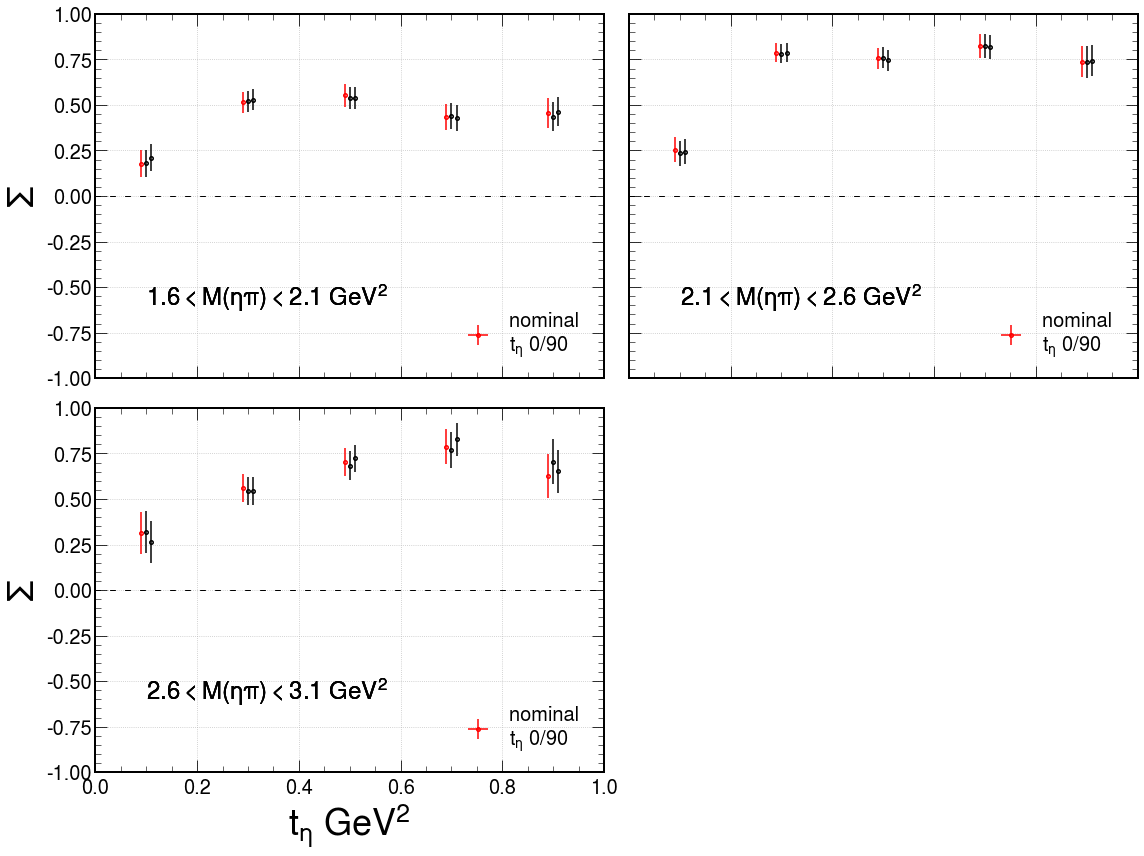

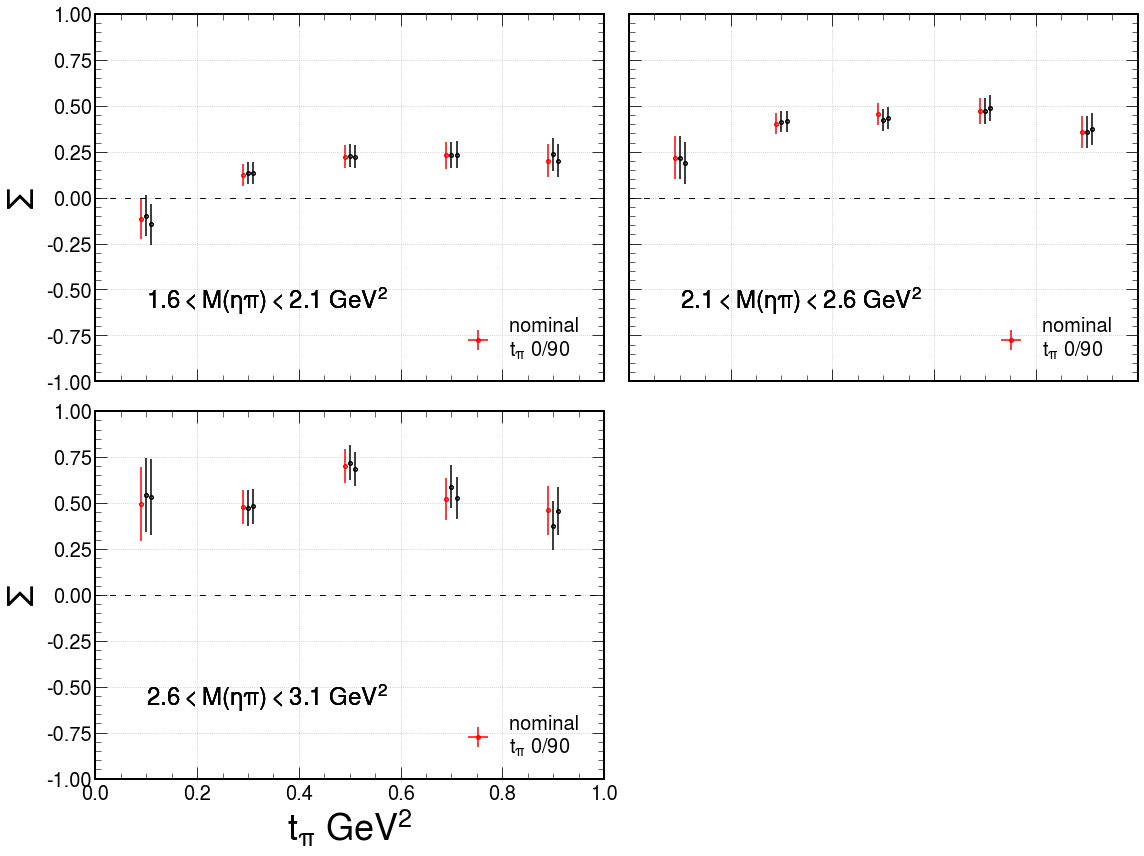

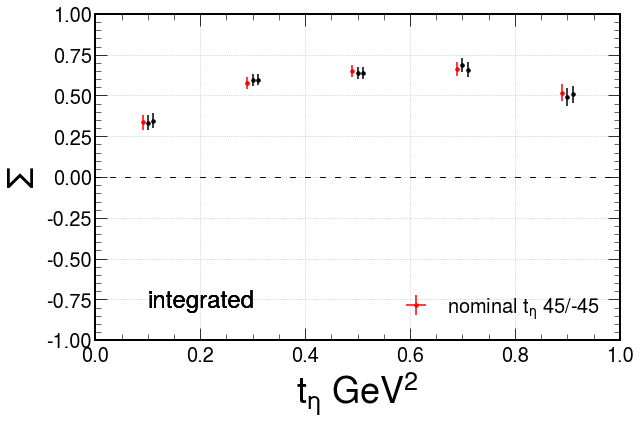

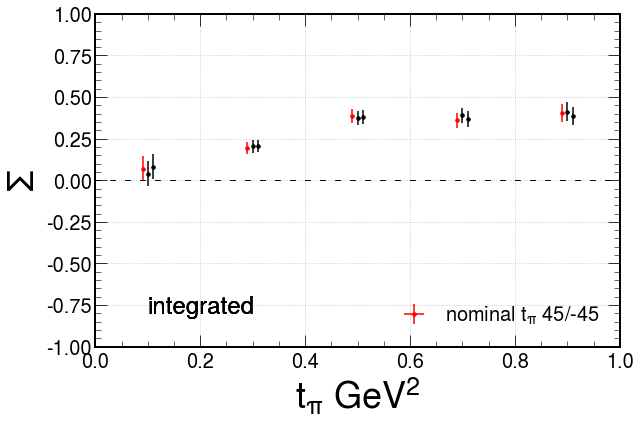

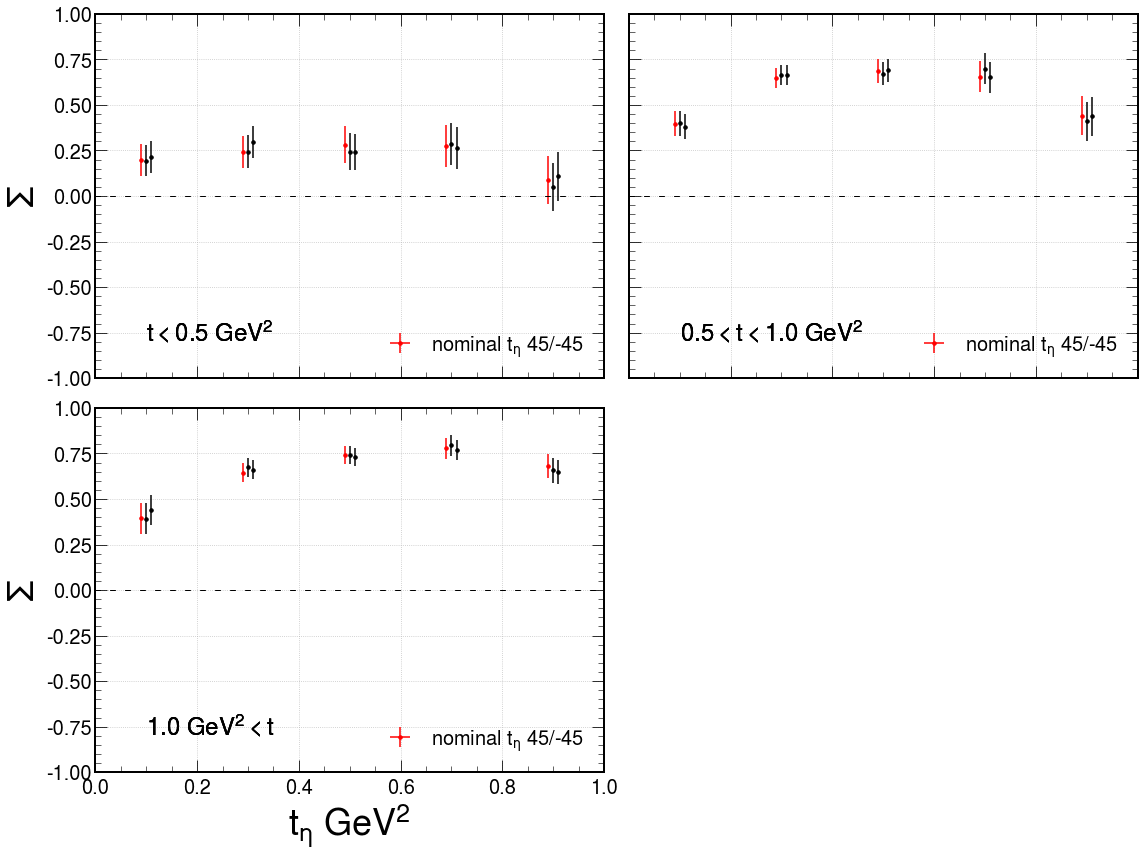

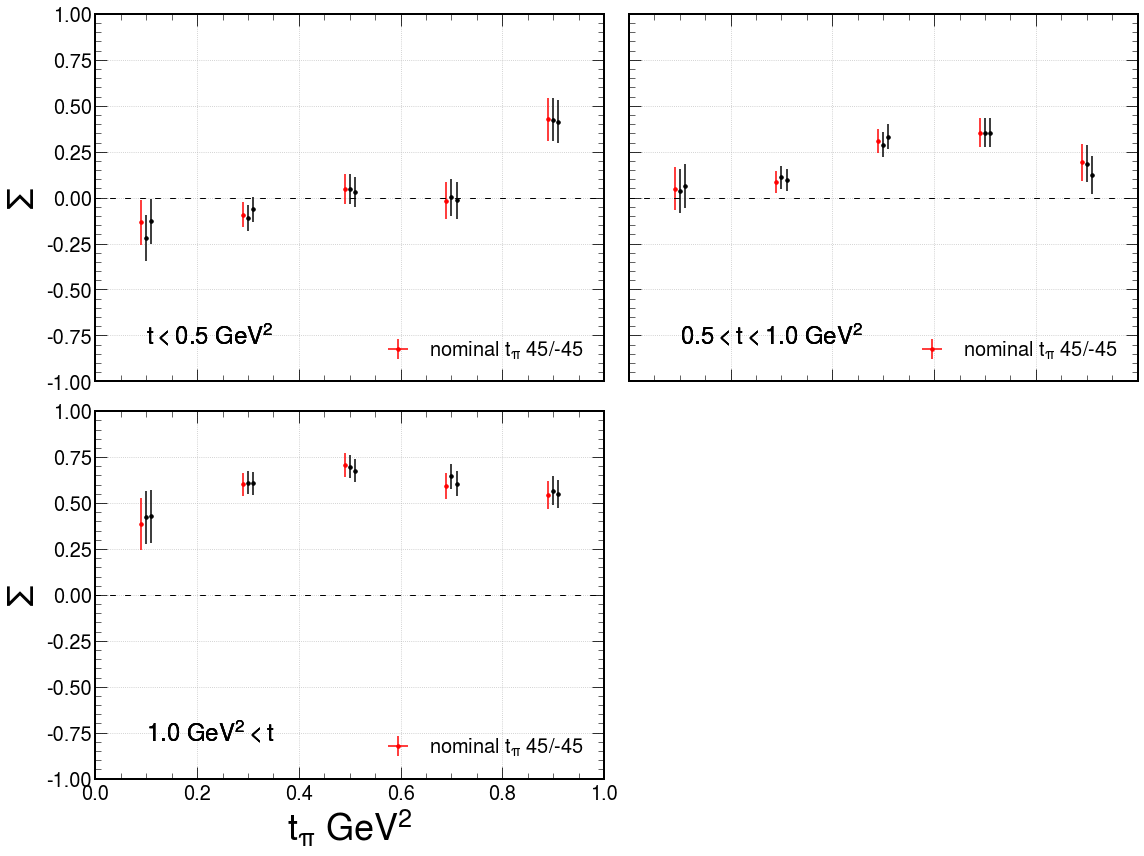

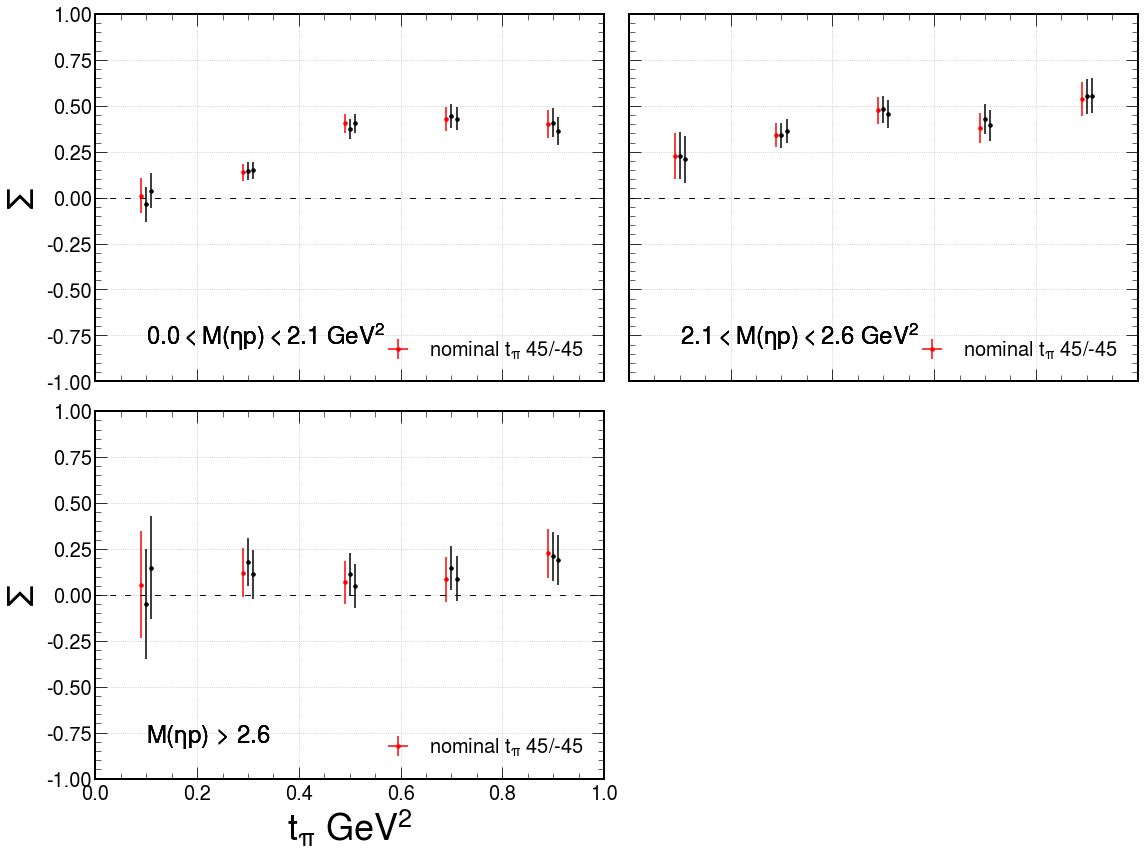

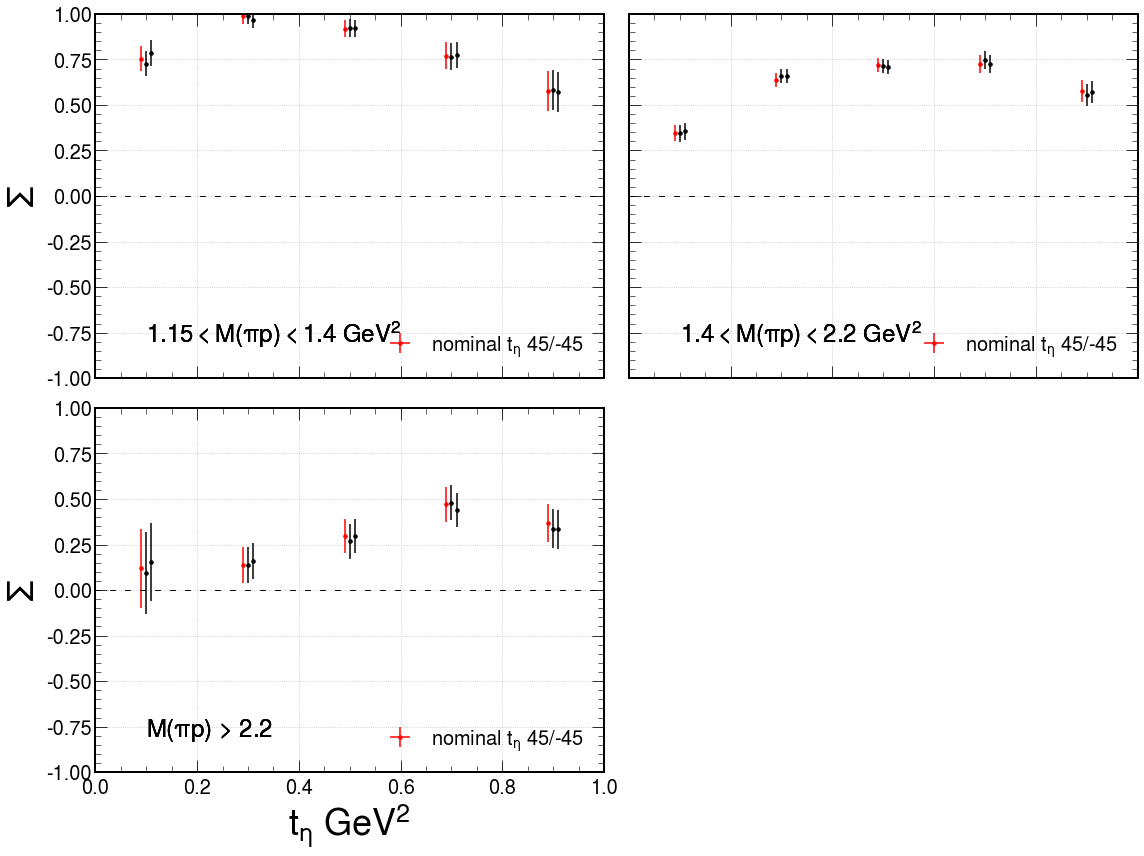

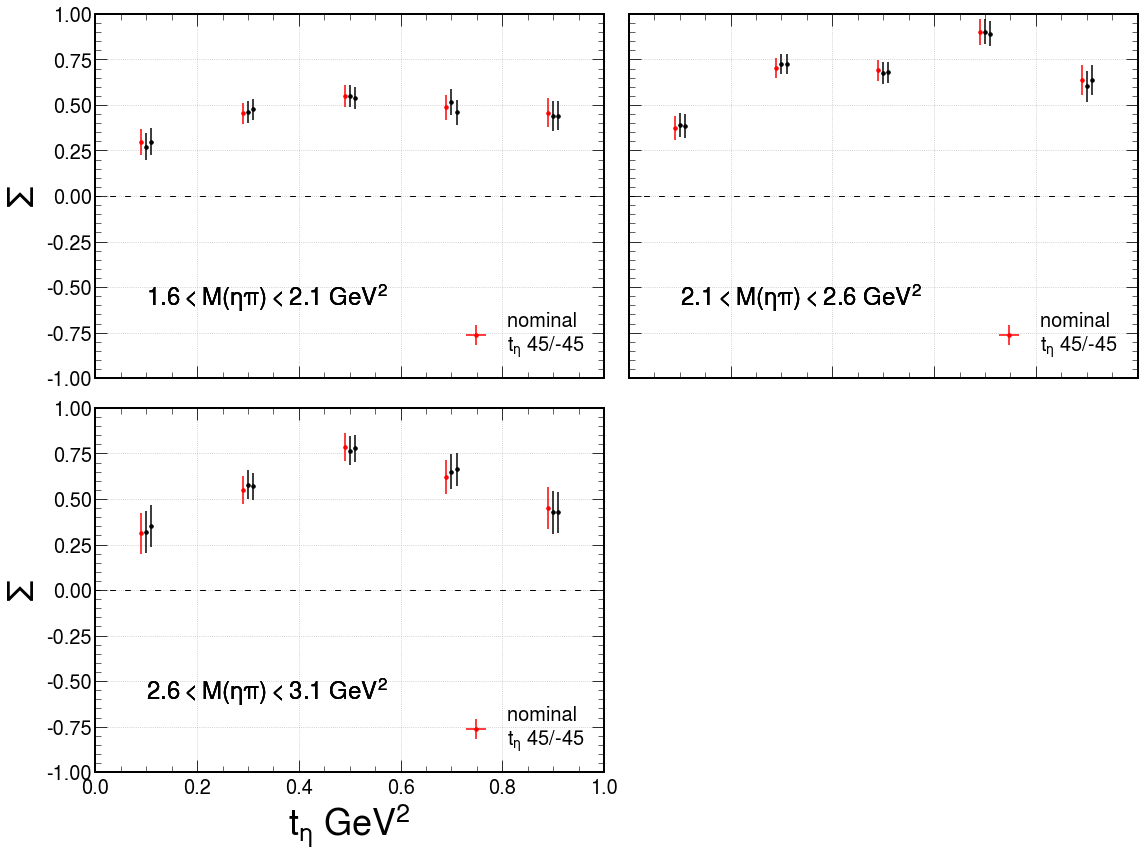

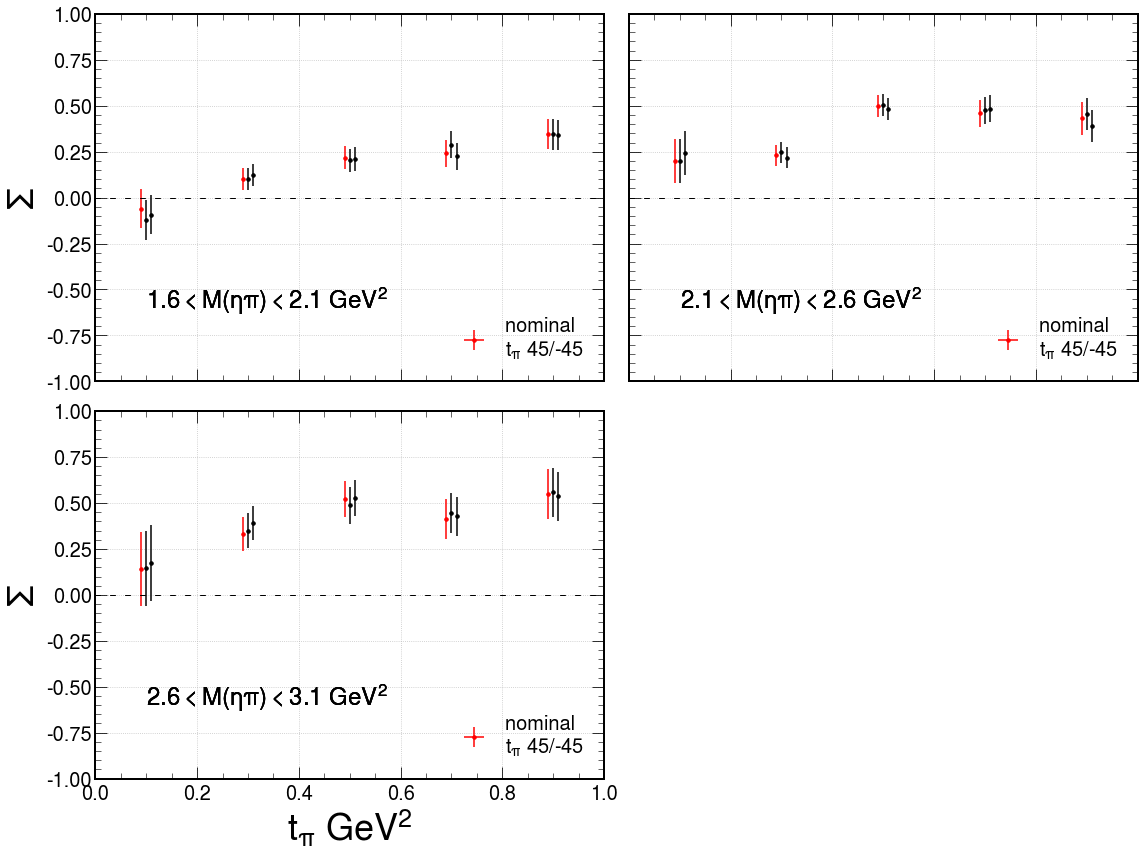

In [23]:
################## 
# Sideband systematics
##################
systLabel="sb"
table_000=generateStandardSystematicsPlots(df,dfs_sbSyst1,sbSystTags,"000",systLabel,-0.01,0.01)
table_045=generateStandardSystematicsPlots(df,dfs_sbSyst1,sbSystTags,"045",systLabel,-0.01,0.01)

# MONTAGE THE RESULTS
files=[
    [saveFolder+"binned_setap_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_spi0p_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"]
]
for file in files:
    prefix,affix=file
    infiles=" ".join([prefix+"000"+affix,prefix+"045"+affix])
    outputname=prefix.split("/")
    outputname.insert(2,"finalResults")
    outputname="/".join(outputname)+"montage"+affix
    cmd="montage "+infiles+" -mode concatenate -tile 1x2 "+outputname
    print(cmd)
    os.system(cmd)
    
prettyTable(table_000,"lllllll","choosing different sideband regions.","sb","000", ["integrated"])
prettyTable(table_045,"lllllll","choosing different sideband regions.","sb","045", ["integrated"])

(260, 58)
(260, 58)


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The 

montage results/binned_setap_splitEtaSyst_pi0_000_ASBS.pdf results/binned_setap_splitEtaSyst_pi0_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_setap_splitEtaSyst_pi0_/finalResultsmontage_ASBS.pdf
montage results/binned_spi0p_splitEtaSyst_eta_000_ASBS.pdf results/binned_spi0p_splitEtaSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_spi0p_splitEtaSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/integrated_asym_splitEtaSyst_eta_000_ASBS.pdf results/integrated_asym_splitEtaSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/integrated_asym_splitEtaSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_u3_splitEtaSyst_eta_000_ASBS.pdf results/binned_u3_splitEtaSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_u3_splitEtaSyst_eta_/finalResultsmontage_ASBS.pdf
montage results/binned_s12_splitEtaSyst_eta_000_ASBS.pdf results/binned_s12_splitEtaSyst_eta_045_ASBS.pdf -mode concatenate -tile 1x2 results/binned_s12_splitEtaSyst_eta_/final

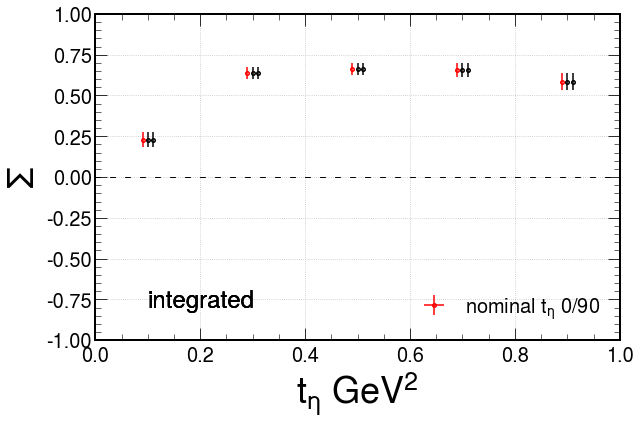

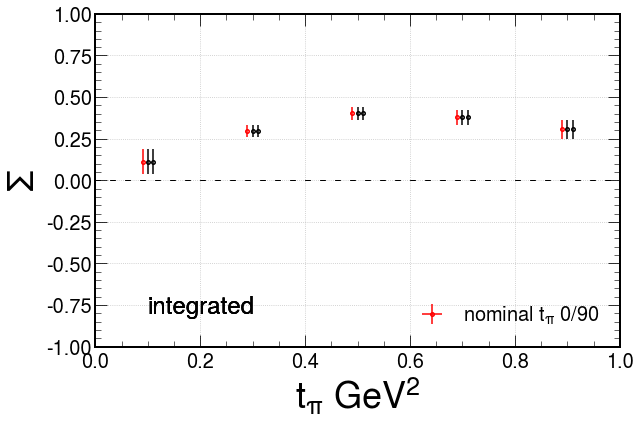

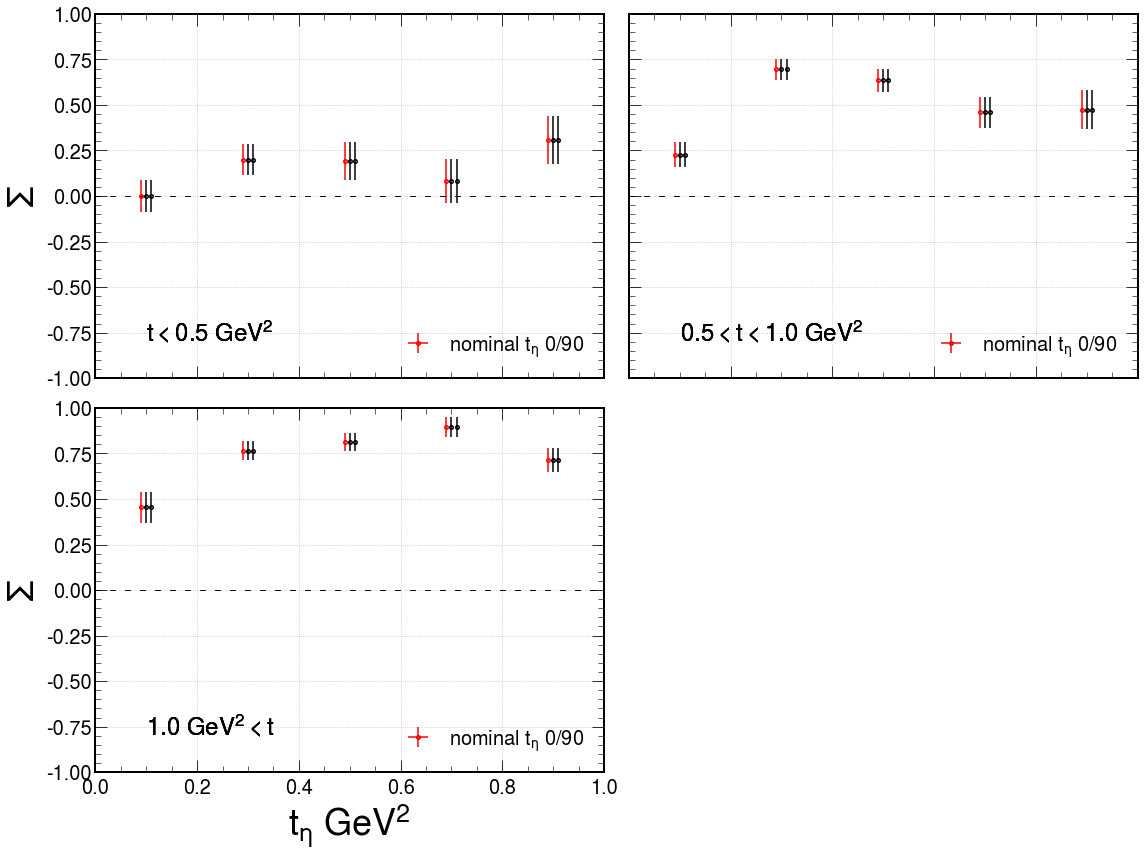

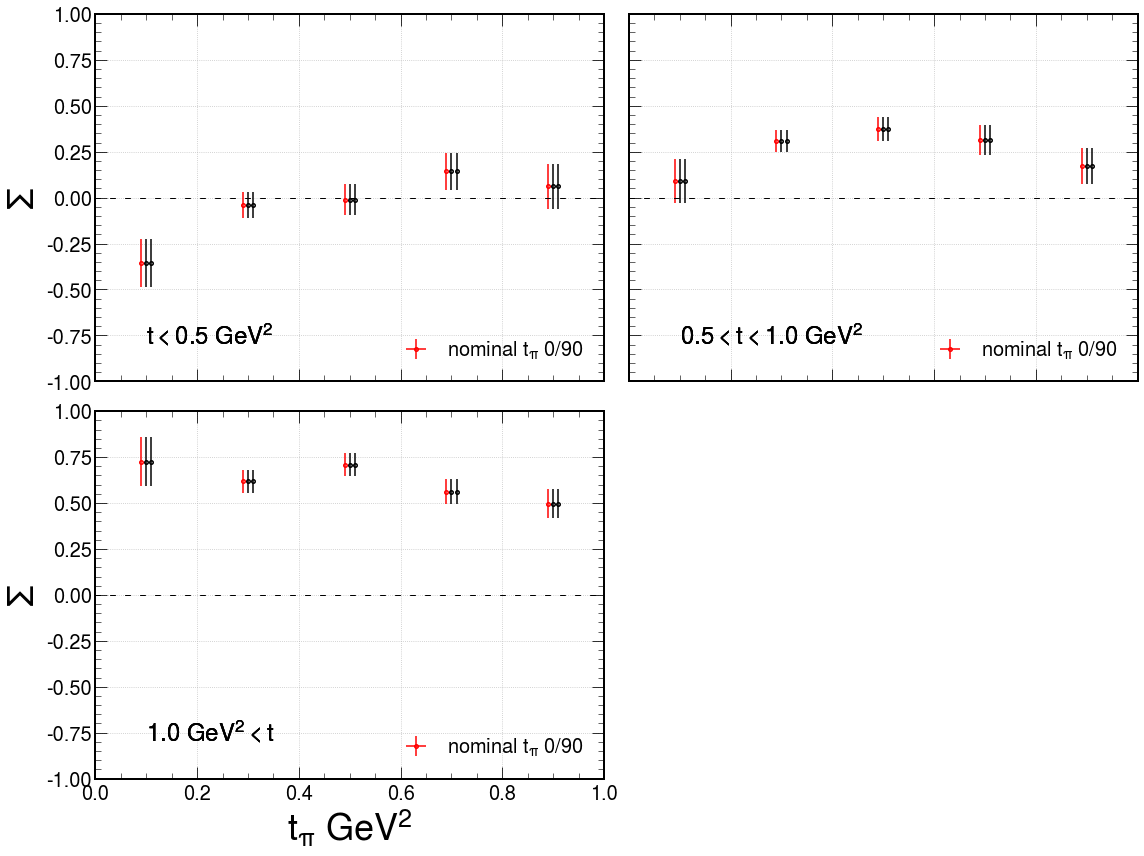

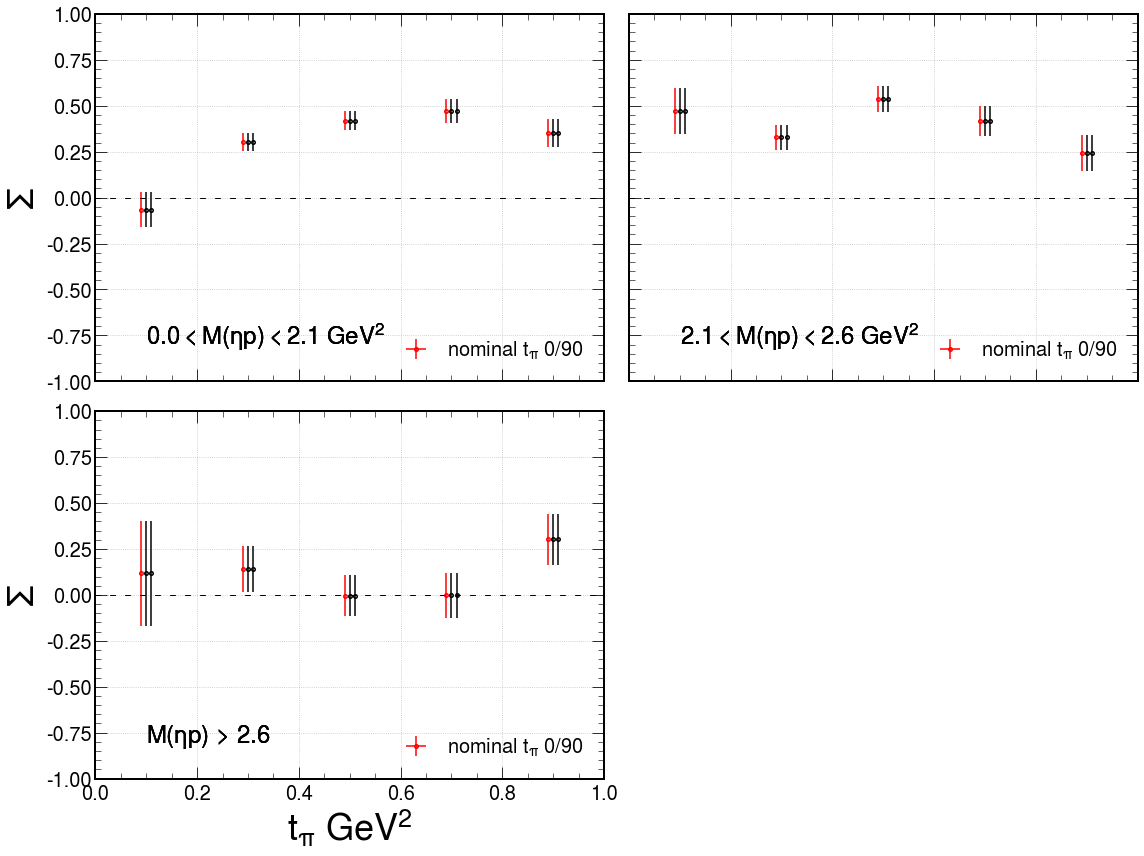

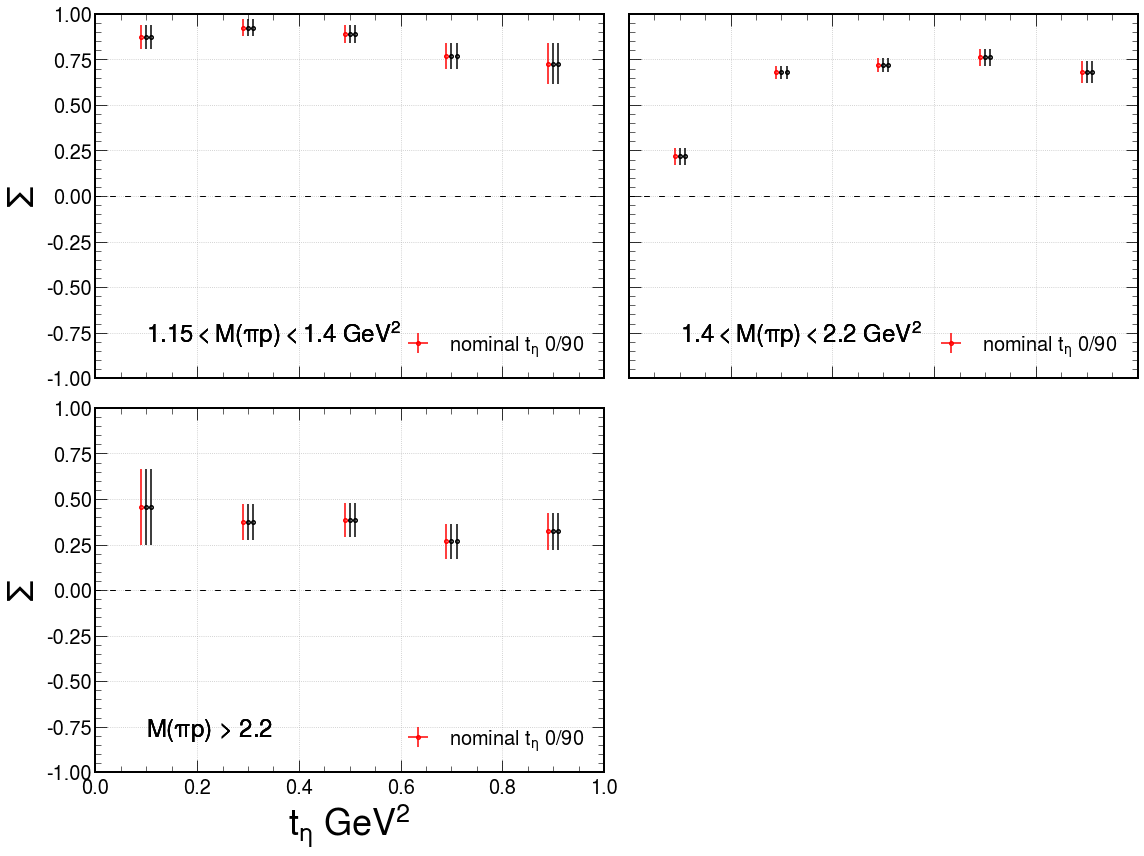

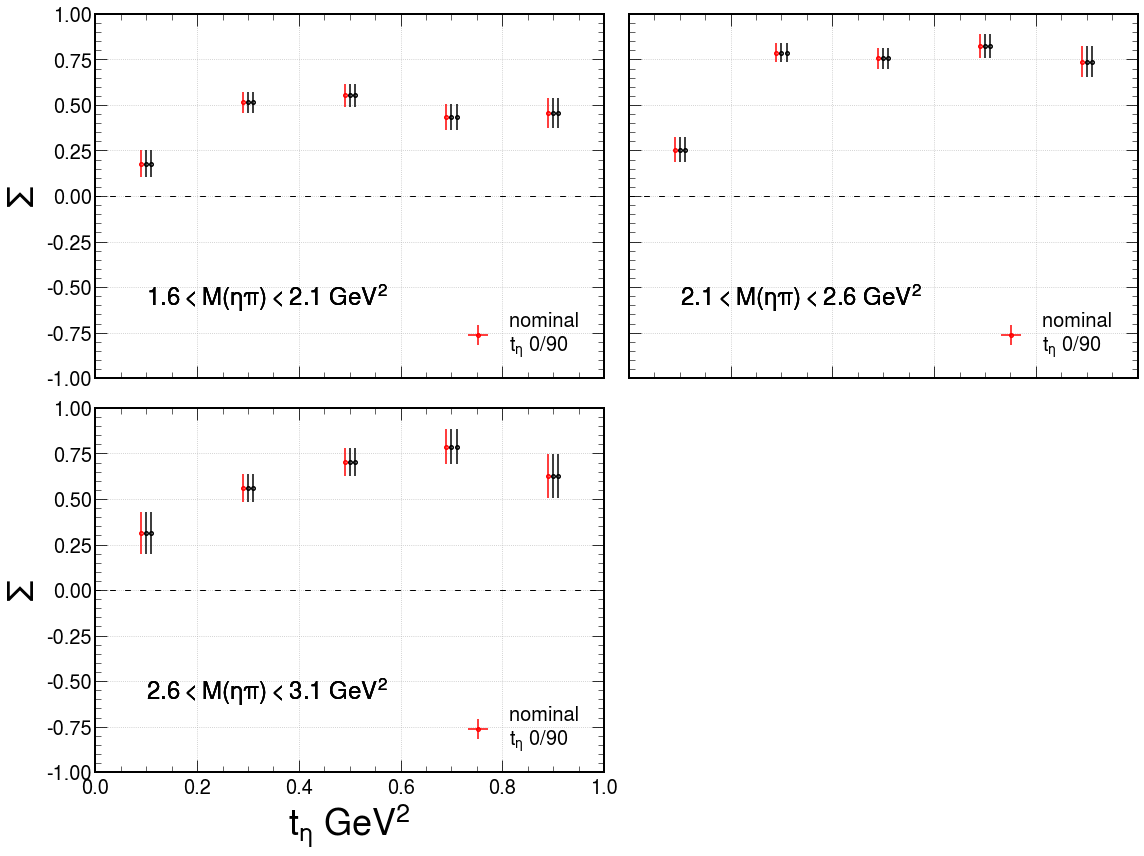

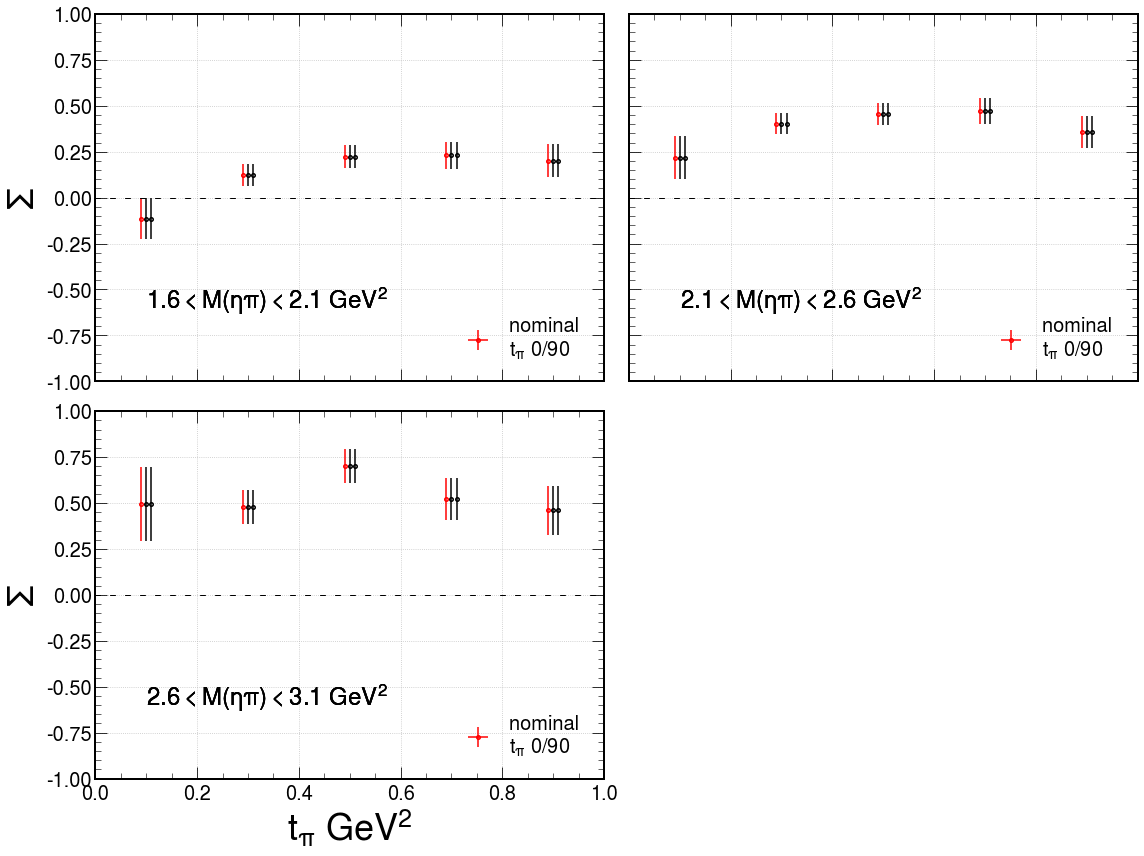

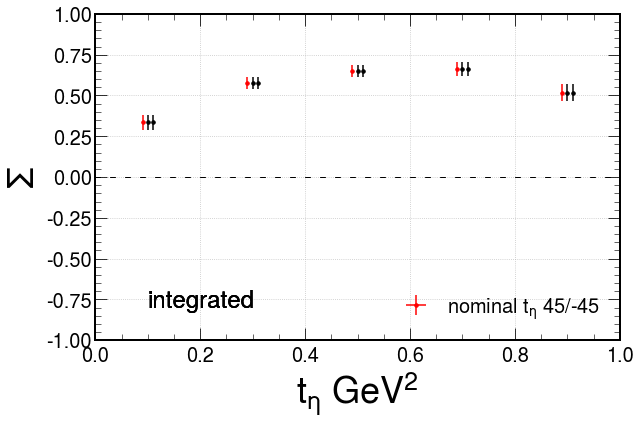

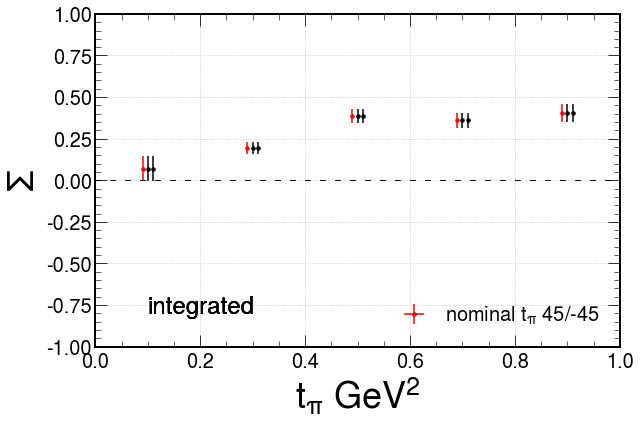

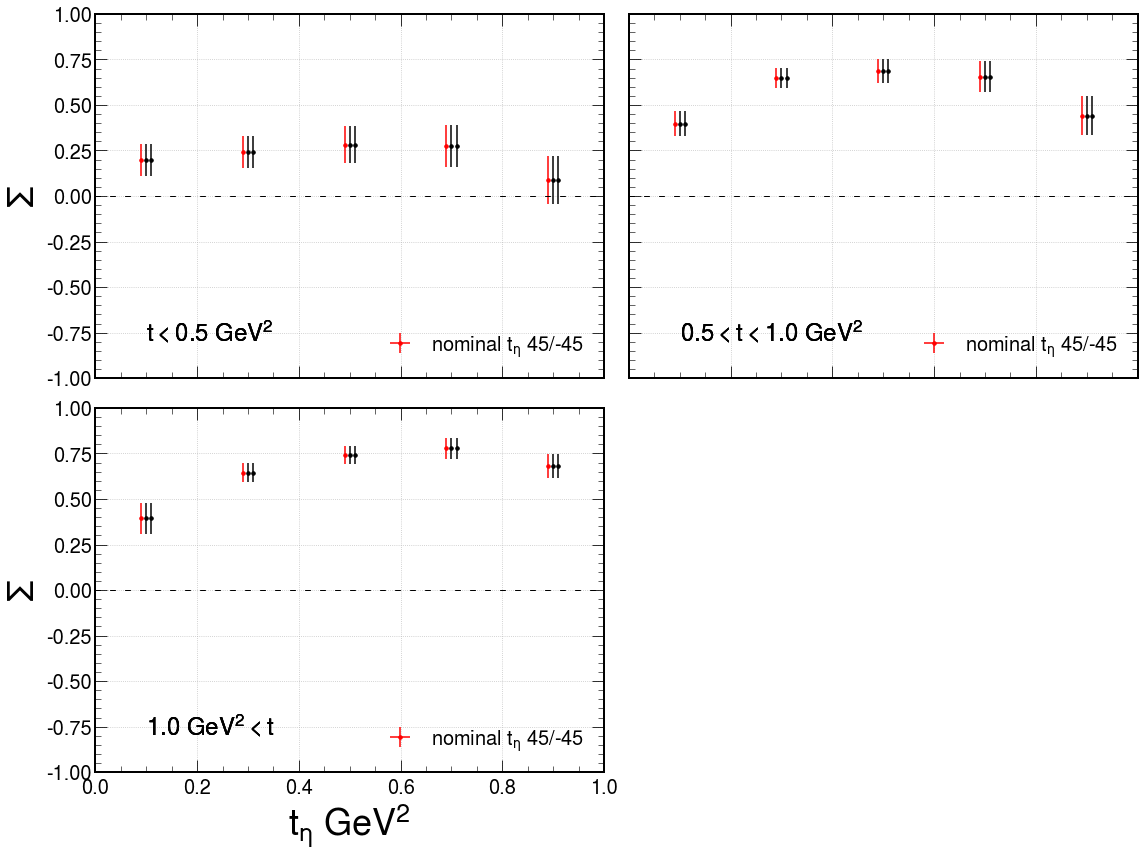

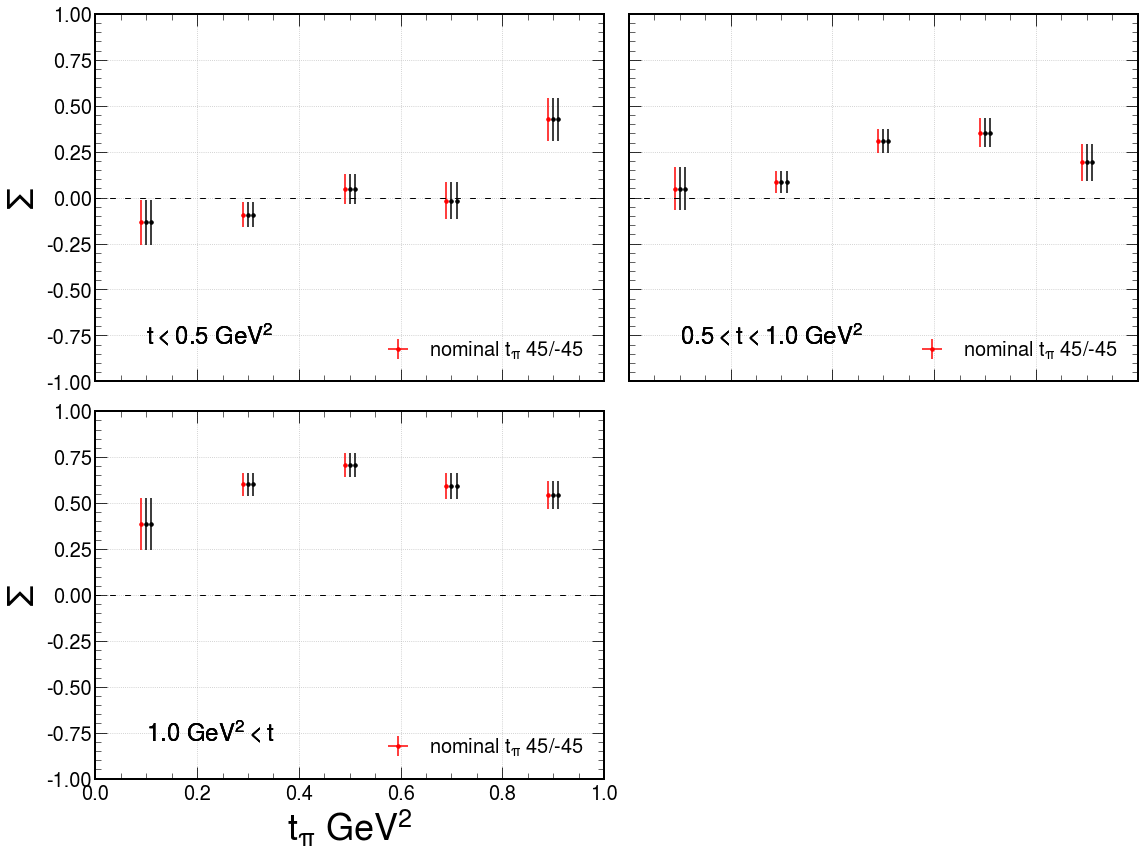

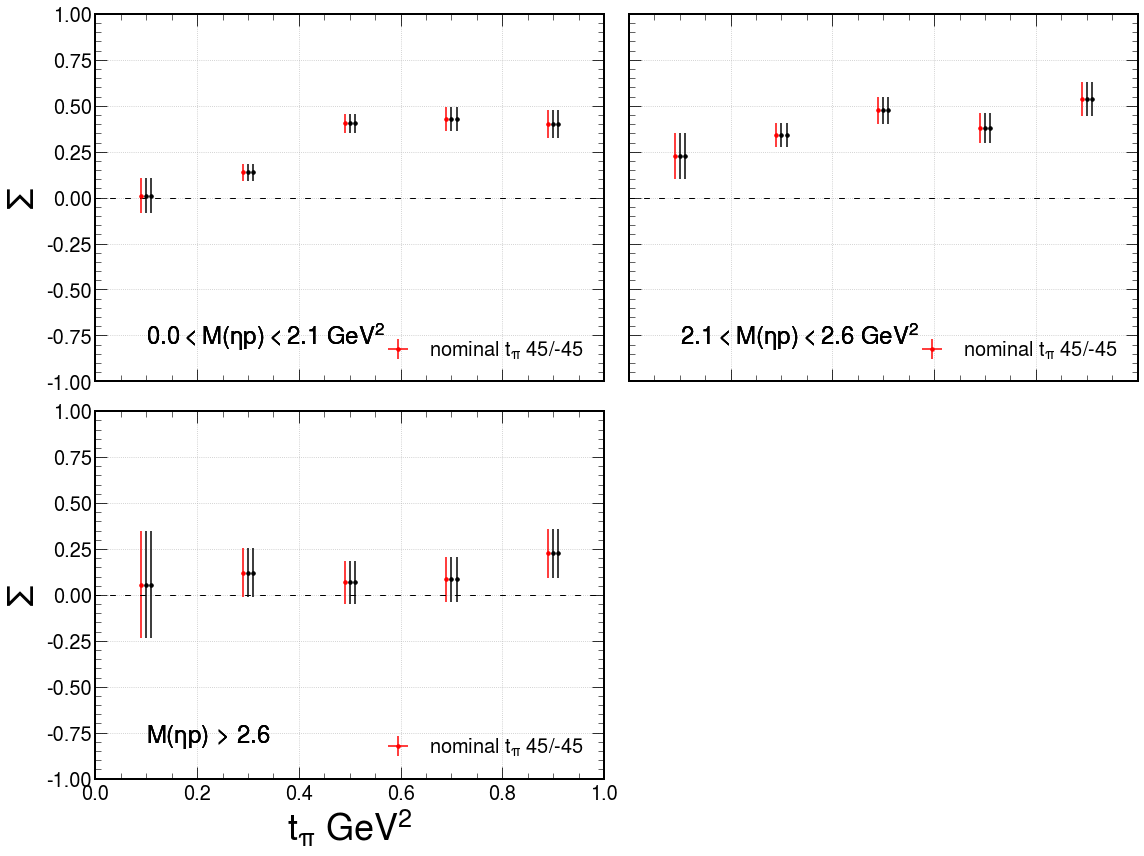

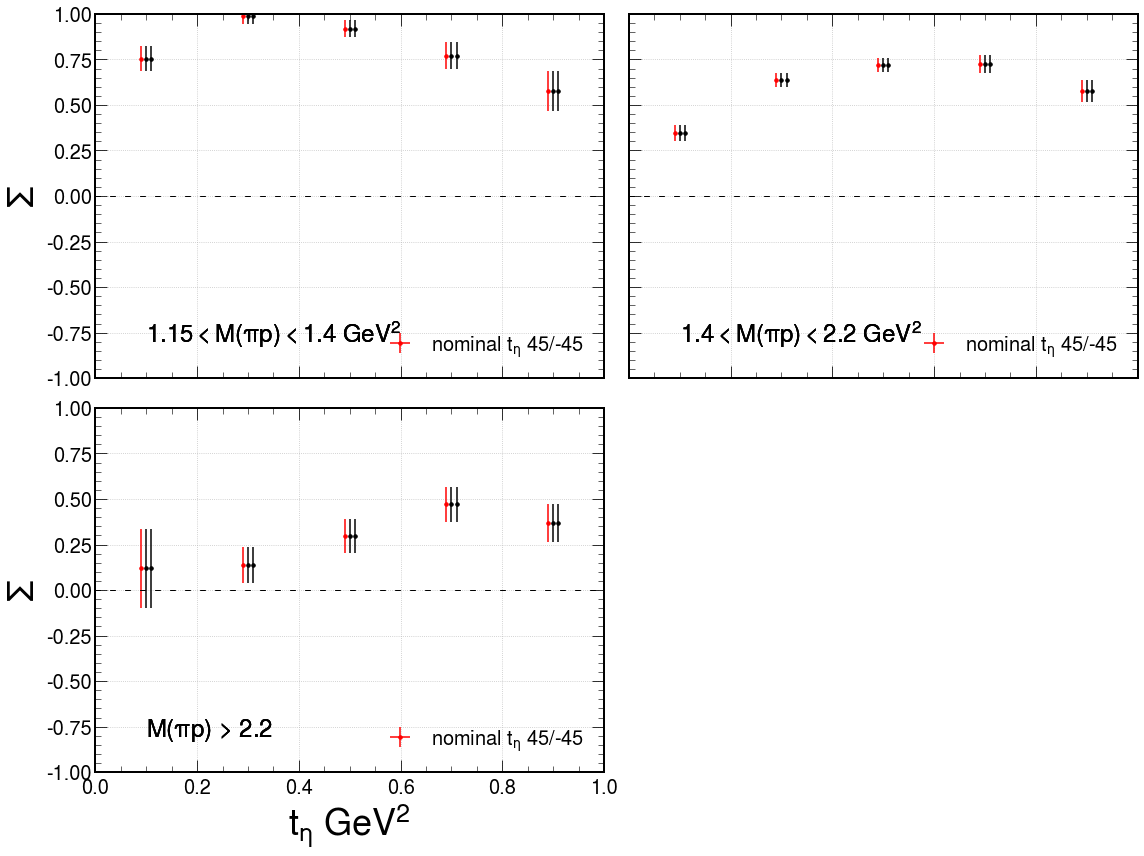

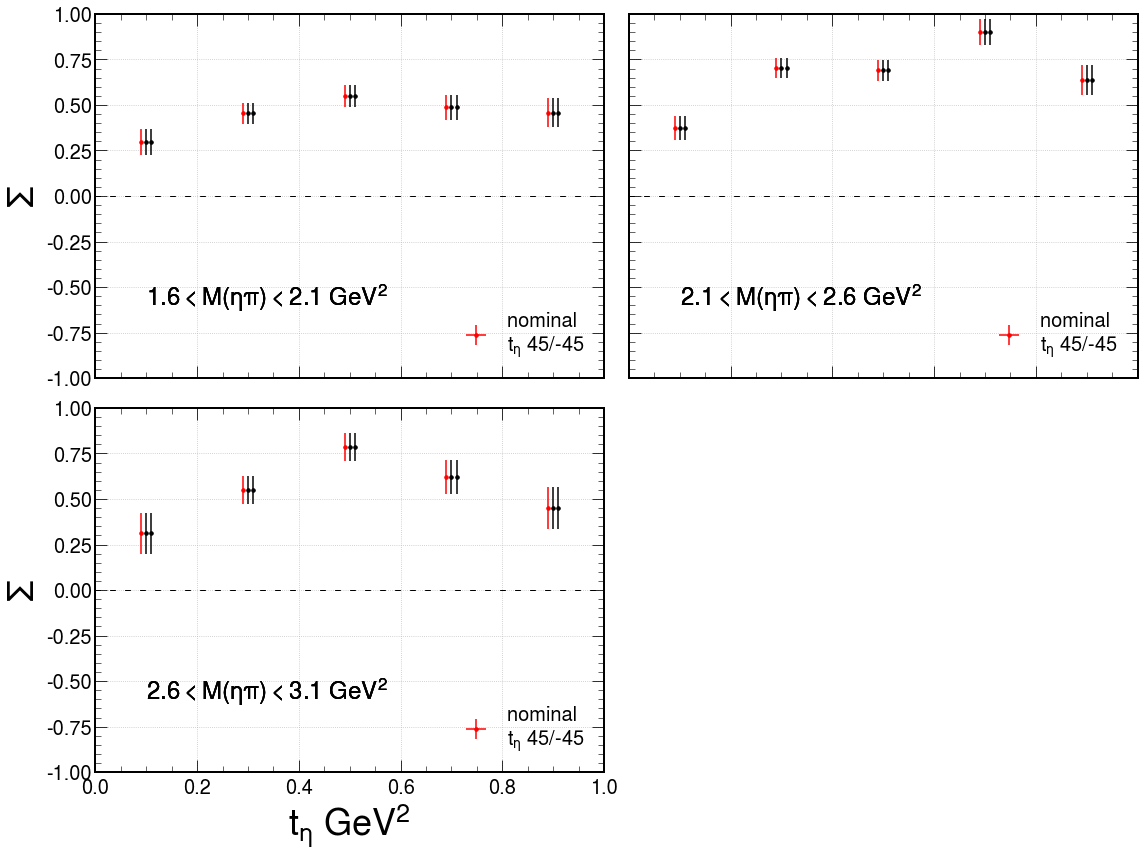

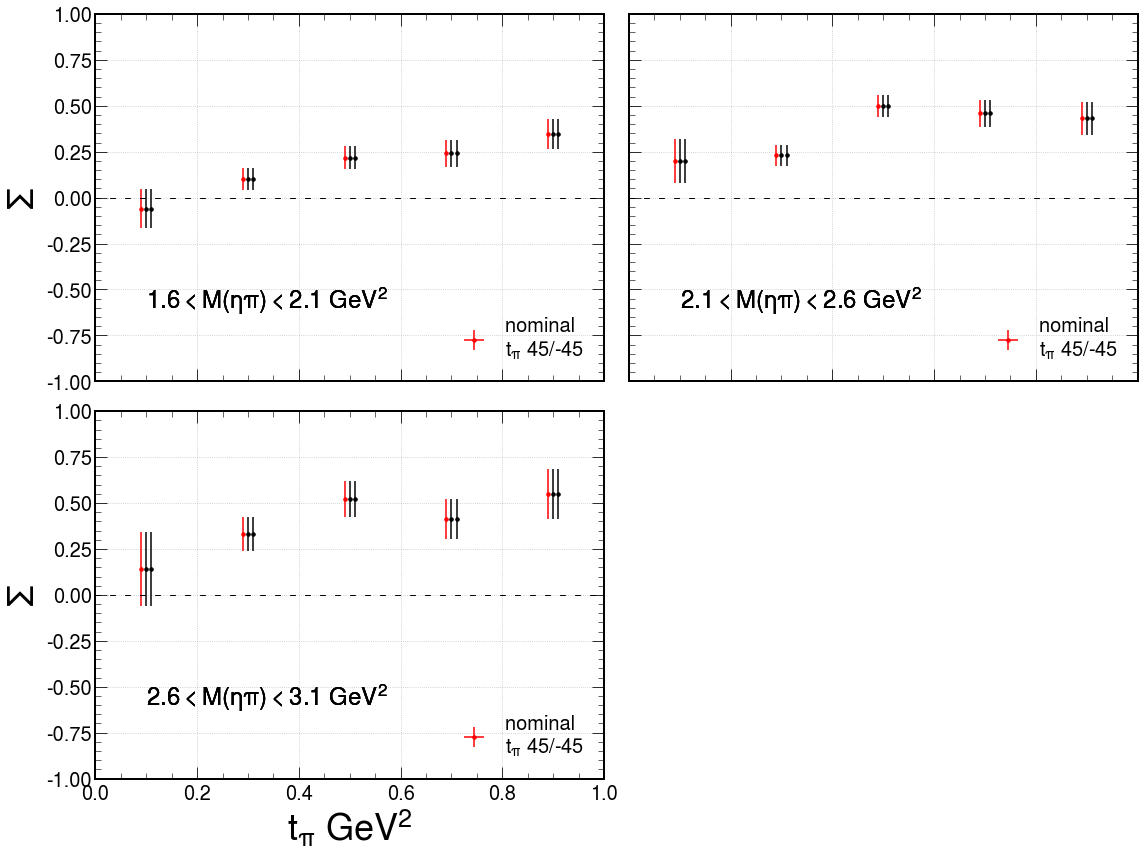

In [24]:
dfLeft=loadResults(baseFolder+'/fitAsymmetryPlots_results/results_etaLeft_ASBS.csv')
dfRight=loadResults(baseFolder+'/fitAsymmetryPlots_results/results_etaRight_ASBS.csv')
dfs_etaSplit={
    "Left Half":dfLeft,
    "Right Half":dfRight
}
etaSplitTags=["Left Half","Right Half"]

################## 
# Sideband systematics
##################
systLabel="splitEta"
table_000=generateStandardSystematicsPlots(df,dfs_etaSplit,etaSplitTags,"000",systLabel,-0.01,0.01)
table_045=generateStandardSystematicsPlots(df,dfs_etaSplit,etaSplitTags,"045",systLabel,-0.01,0.01)

# MONTAGE THE RESULTS
files=[
    [saveFolder+"binned_setap_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_spi0p_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_eta_",outputTag+".pdf"],
    [saveFolder+"integrated_asym_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_u3_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"],
    [saveFolder+"binned_s12_"+systLabel+"Syst"+"_pi0_",outputTag+".pdf"]
]
for file in files:
    prefix,affix=file
    infiles=" ".join([prefix+"000"+affix,prefix+"045"+affix])
    outputname=prefix.split("/")
    outputname.insert(2,"finalResults")
    outputname="/".join(outputname)+"montage"+affix
    cmd="montage "+infiles+" -mode concatenate -tile 1x2 "+outputname
    print(cmd)
    os.system(cmd)
    
prettyTable(table_000,"lllllll","splitting the $\eta$ peak in half to obtain indepedent datasets.","etaSplit","000", ["integrated"])
prettyTable(table_045,"lllllll","splitting the $\eta$ peak in half to obtain indepedent datasets.","etaSplit","045", ["integrated"])

In [25]:
# evtSystTags=["Left Half","Right Half"]

# ##########################################
# # Define labels and maps to generate the correct text
# ##########################################
# selectionVariationMap={
#     "Left Half": "Left Half of $M(\eta)$",
#     "Right Half":"Right Half of $M(\eta)$",
# }

# ##########################################
# # Construct barlow plot
# ##########################################
# shape=(1,1,)
# fig,axes = plt.subplots(*shape,figsize=(9,6),sharex=True,sharey=True)
# axes=[axes]
# minvals=[0]
# maxvals=[100]
# labels=["Integrated"]

# systVariationsBarlows={}
# systVariationsSysts={}
# systVariationsSystErrs={}
# systVariationsNoms={}
# systVariationsNomErrs={}
# for label in labels:
#     systVariationsBarlows[label]={}
#     systVariationsSysts[label]={}
#     systVariationsSystErrs[label]={}
#     systVariationsNoms[label]={}
#     systVariationsNomErrs[label]={}
#     for i,systTag in enumerate(evtSystTags):
#         includeInLegend=True if i==0 else False
#         barlows,systs,noms,systErrs,nomErrs=plotBarlow(df,dfs_etaSplit[systTag],axes,labels,"mandelstam_t",shape,"total",method,"asym",
#                         minvals,maxvals,labels,markerFmt=".",includeInLegend=includeInLegend)
#         systVariationsBarlows[label][systTag]=barlows[label]
#         systVariationsSysts[label][systTag]=systs[label]
#         systVariationsNoms[label][systTag]=noms[label]
#         systVariationsSystErrs[label][systTag]=systErrs[label]
#         systVariationsNomErrs[label][systTag]=nomErrs[label]
#     constructTable(systVariationsBarlows,systVariationsSysts,systVariationsNoms,systVariationsSystErrs,systVariationsNomErrs,
#                    evtSystTags,label,"llllll",caption="",nbarlowSignificant=2)
# plt.savefig(saveFolder+"/finalResults/integrated_splitEtaSyst_barlow"+outputTag+".pdf")

# Make Latex figure text for systematics

In [26]:
# evtSels=list(evtSystMap.keys())
# evtSelLabels=["$\\chi^2$","Unused Energy","Missing Mass Squared","Photon Energy","Photon Theta","Proton Momentum","Proton Z"]
# evtSelOrders=[
#     ["$\\chi^2<18$","$\\chi^2<14$"],
#     ["Unusued Energy $<$ 0.125 GeV","Unusued Energy $<$ 0.15 GeV"],
#     ["$\\vert\\textrm{MM}^2\\vert<0.1$ $\textrm{GeV}^2$","$\\vert\\textrm{MM}^2\\vert<0.025$ $\textrm{GeV}^2$"],
#     ["$\\gamma_E>0.11 GeV$","$\\gamma_E>0.12 GeV$"],
#     ["$2.3<\\theta<10.5\\quad\\textrm{or}\\quad\\theta>11.7$ degrees","$2.7<\\theta<10.1\\quad\\textrm{or}\\quad\\theta>12.1$ degrees"],
#     ["$|p_{proton}|>0.1$ GeV/c", "$|p_{proton}|>0.5$ GeV/c"],
#     ["$51<z_{proton}<79$ cm","$53<z_{proton}<77$ cm"]
# ]

systLabels=["evt","freePhi","fluxNorm","sb","splitEta"]
systLabelTexts=["of the event selection","with freed phase offset","of +/-5\\% flux normalization","of the sideband subtraction regions",
               "of $M(\\eta)$ split halves"]
systSectionTexts=[
    "Event Selection Systematics - additional sub-binning",
    "Freed phase offset systematics - additional sub-binning",
    "Flux Normalization systematics - additional sub-binning",
    "Sideband systematics - additional sub-binning",
    "Split Eta systematics - additional sub-binning,"
]

for systLabel,systLabelText,systSectionText in zip(systLabels,systLabelTexts,systSectionTexts):
    caption="Systematic differences in $\Sigma$ due to variations "+systLabelText+" for (Left) $t_{\eta}$, (Right) $t_{\pi}$ "+\
    "are measured in five bins. Integrated over $u_3$, $s_{12}$, and $s_{23}$. (Top) Asymmetries from 0/90 pair. (Bot) Asymmetries from 45/-45 pair."+\
    " Red is the nominal results, black points are from different variations of event selections."
    text=[
        "\\begin{figure}[htb!]",
        "\t\centering",
        "\t\includegraphics[width=0.45\\textwidth]{plots/etapi0_results/double_regge/asym/integrated_asym_"+systLabel+"Syst_eta_montage"+outputTag+".pdf}",
        "\t\includegraphics[width=0.45\\textwidth]{plots/etapi0_results/double_regge/asym/integrated_asym_"+systLabel+"Syst_pi0_montage"+outputTag+".pdf}",
        "\t\caption{"+caption+"}",
        "\t\label{fig:etapi0_"+systLabel+"Syst_integrated_ASBS"+"}",
        "\end{figure}"
    ]
    print("\n".join(text))
print("-----------------------------------")
print("-----------------------------------\n\n")

for systLabel,systLabelText,systSectionText in zip(systLabels,systLabelTexts,systSectionTexts):
    # For the integrated
    print("\subsection{"+systSectionText+"}")    
    for particle,particleCaption in zip(["eta","pi0"],["$t_{\eta}$","$t_{\pi}$"]):  
        binnedTags=["binned_setap","binned_spi0p","binned_u3","binned_s12"]
        binnedLabels=["$M(\\eta p)$","$M(\\pi^0 p)$","$u_3$","$s_{12}$"]
        t1s=["$t_{\pi}$","$t_{\eta}$","(Left) $t_{\eta}$, (Right) $t_{\pi}$","(Left) $t_{\eta}$, (Right) $t_{\pi}$"]

        # For the binned
        for binnedTag,binnedLabel,t1 in zip(binnedTags,binnedLabels,t1s):
            if particle=="eta" and binnedTag=="binned_setap":
                continue
            if particle=="pi0" and binnedTag=="binned_spi0p":
                continue
            caption="Systematic differences in $\Sigma$ due to variations "+systLabelText+" for "+t1+\
            " are measured in five bins. Binned in "+binnedLabel+". (Top) Asymmetries from 0/90 pair. (Bot) Asymmetries from 45/-45 pair."+\
            " Red is the nominal results, black points are from different variations of event selections."
            text_prefix=[
                "\\begin{figure}[htb!]",
                "\t\centering"
            ]
            test_suffix=[
                "\t\caption{"+caption+"}",
                "\t\label{fig:"+particle+"_"+systLabel+"Syst_"+binnedTag+"}",
                "\end{figure}"
            ]
            if binnedTag in ["binned_u3","binned_s12"]:
                text_center=[
                    "\t\includegraphics[width=0.45\\textwidth]{plots/etapi0_results/double_regge/asym/"+binnedTag+"_"+systLabel+"Syst_eta_montage"+outputTag+".pdf}",
                    "\t\includegraphics[width=0.45\\textwidth]{plots/etapi0_results/double_regge/asym/"+binnedTag+"_"+systLabel+"Syst_pi0_montage"+outputTag+".pdf}",
                ]
            else:
                text_center=[
                    "\t\includegraphics[width=0.45\\textwidth]{plots/etapi0_results/double_regge/asym/"+binnedTag+"_"+systLabel+"Syst_"+particle+"_montage"+outputTag+".pdf}",
                ]
            text=text_prefix+text_center+test_suffix
            print("\n".join(text))
    print("\FloatBarrier\n\n")
#     print("\n\n==================================================================================")

\begin{figure}[htb!]
	\centering
	\includegraphics[width=0.45\textwidth]{plots/etapi0_results/double_regge/asym/integrated_asym_evtSyst_eta_montage_ASBS.pdf}
	\includegraphics[width=0.45\textwidth]{plots/etapi0_results/double_regge/asym/integrated_asym_evtSyst_pi0_montage_ASBS.pdf}
	\caption{Systematic differences in $\Sigma$ due to variations of the event selection for (Left) $t_{\eta}$, (Right) $t_{\pi}$ are measured in five bins. Integrated over $u_3$, $s_{12}$, and $s_{23}$. (Top) Asymmetries from 0/90 pair. (Bot) Asymmetries from 45/-45 pair. Red is the nominal results, black points are from different variations of event selections.}
	\label{fig:etapi0_evtSyst_integrated_ASBS}
\end{figure}
\begin{figure}[htb!]
	\centering
	\includegraphics[width=0.45\textwidth]{plots/etapi0_results/double_regge/asym/integrated_asym_freePhiSyst_eta_montage_ASBS.pdf}
	\includegraphics[width=0.45\textwidth]{plots/etapi0_results/double_regge/asym/integrated_asym_freePhiSyst_pi0_montage_ASBS.pdf}
	\cap

# Integrated over u3

In [27]:
listOfImportantFiles=[]

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.





\begin{longtable}{||lllll||}
\hline
    Binning & Polarization Pair &           $t_1$ bin &   $\Sigma_{inst}$ & $N \sigma_{diff}$ \\
\hline\hline
\endhead
\hline\hline
\multicolumn{5}{r}{{Continued on next page}} \\
\hline\hline
\endfoot

\hline
\endlastfoot
 Integrated &              0/90 &  0.0$<t_{\eta}<$0.2 &  -0.015$\pm$0.016 &             0.929 \\
 Integrated &              0/90 &  0.2$<t_{\eta}<$0.4 &   0.014$\pm$0.012 &             1.128 \\
 Integrated &              0/90 &  0.4$<t_{\eta}<$0.6 &  -0.003$\pm$0.013 &             0.241 \\
 Integrated &              0/90 &  0.6$<t_{\eta}<$0.8 &  -0.022$\pm$0.015 &             1.420 \\
 Integrated &              0/90 &  0.8$<t_{\eta}<$1.0 &   0.009$\pm$0.019 &             0.508 \\
 Integrated &              0/90 &   0.0$<t_{\pi}<$0.2 &   0.027$\pm$0.025 &             1.067 \\
 Integrated &              0/90 &   0.2$<t_{\pi}<$0.4 &  -0.000$\pm$0.013 &             0.012 \\
 Integrated &              0/90 &   0.4$<t_{\pi}<$0.6 &   0

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


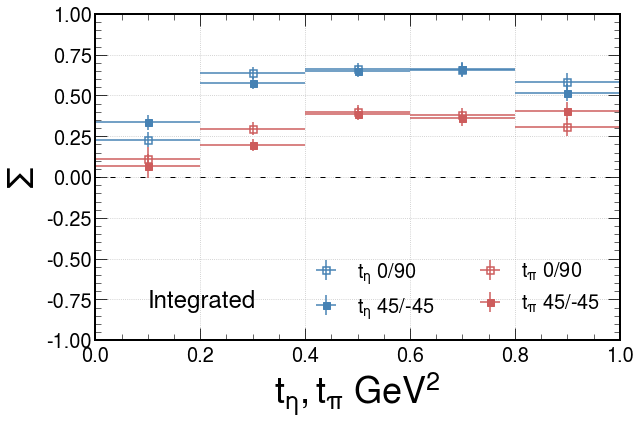

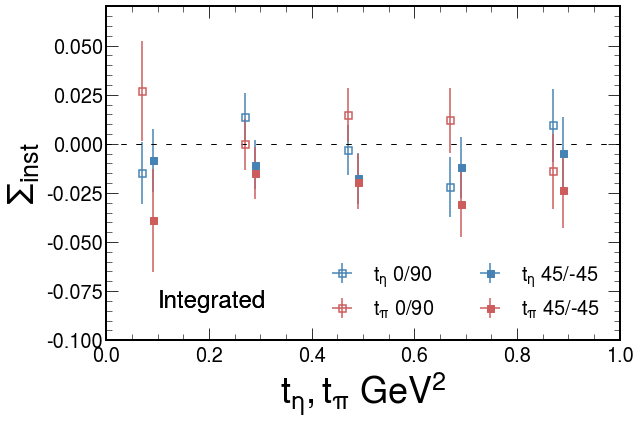

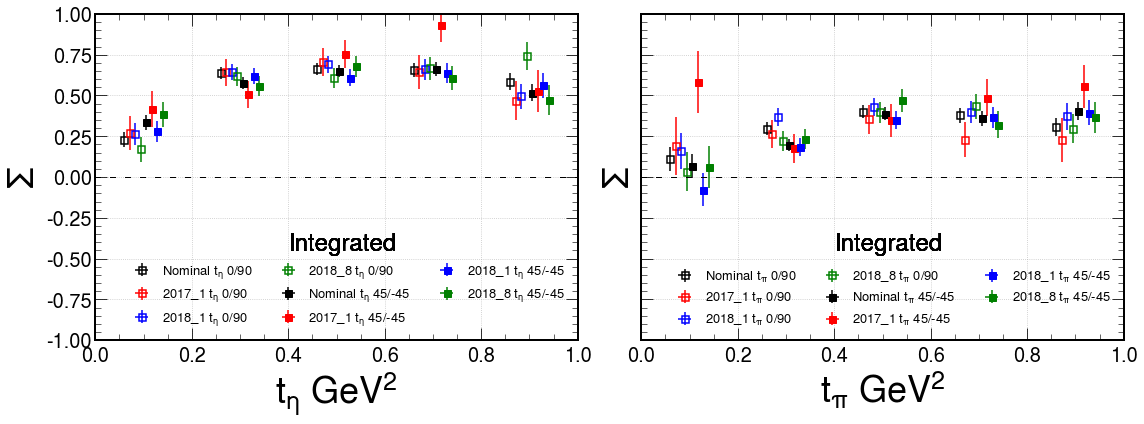

In [32]:
shape=(1,1,)
fig,axes = plt.subplots(*shape,figsize=(9,6),sharex=True,sharey=True)
axes=[axes]

minvals=[0]
maxvals=[100]
labels=[
    "Integrated"
]

plotAsymmetries(df,axes,labels,r"$\Sigma$","mandelstam_t",shape,["eta","pi0"],"total",method,"asym",["steelblue","indianred"],"",
               minvals,maxvals,labels)
plt.savefig(saveFolder+"integrated_asym"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"integrated_asym"+outputTag+".pdf")

################################### Instrumental Asymmetry
shape=(1,1)
fig,axes = plt.subplots(*shape,figsize=(9,6),sharex=True,sharey=True)
axes=[axes]

mapSysts=[]
offsets=np.linspace(-0.03,0.03,4)
i=0
mapSysts=[]
for pairsToPlot in [["000"],["045"]]:
#     for particle,color in zip([["eta"],["pi0"]],[["steelblue"],["indianred"]]):
    for particle,color in zip([["eta","pi0"]],[["steelblue","indianred"]]):
        mapSysts.append(plotAsymmetries(df,axes,labels,r"$\Sigma_{inst}$","mandelstam_t",shape,particle,"total","","instAsym",color,"",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i]))
        i+=1
for ax in axes:
    ax.set_ylim(-0.1,0.07)
plt.tight_layout()
plt.savefig(saveFolder+"integrated_instAsym"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"integrated_instAsym"+outputTag+".pdf")
tmpdf, chi2 = constructInstAsymTable(mapSysts,labels)
prettyTable(tmpdf,"lllll","Binned in $t_1$. Integrated over other kinematic variables. $\chi^2$ of "+chi2+" with respect to zero asymmetry for the ensemble",
            "Inst_u3","000",'all',2,splitParticleTable=False)


################################## PER RUN
shape=(1,2)
fig,axes = plt.subplots(*shape,figsize=(16,6),sharex=True,sharey=True)
axes=axes.flatten()

table=makeRunSystPlots(df,axes,"mandelstam_t",labels,labelOffset=0.175,labelOffsetX=0.3)
prettyTable(table,"lllllll","splitting the datasets into the different run periods.","runDependence","BothPols",captionTemplate=1)

plt.tight_layout()
plt.savefig(saveFolder+"integrated_asym_per_run"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"integrated_asym_per_run"+outputTag+".pdf")

# Binned in u3

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.





\begin{longtable}{||lllll||}
\hline
                 Binning & Polarization Pair &           $t_1$ bin &   $\Sigma_{inst}$ & $N \sigma_{diff}$ \\
\hline\hline
\endhead
\hline\hline
\multicolumn{5}{r}{{Continued on next page}} \\
\hline\hline
\endfoot

\hline
\endlastfoot
       t < 0.5 $GeV^{2}$ &              0/90 &  0.0$<t_{\eta}<$0.2 &  -0.009$\pm$0.031 &             0.304 \\
       t < 0.5 $GeV^{2}$ &              0/90 &  0.2$<t_{\eta}<$0.4 &  -0.007$\pm$0.031 &             0.221 \\
       t < 0.5 $GeV^{2}$ &              0/90 &  0.4$<t_{\eta}<$0.6 &   0.008$\pm$0.035 &             0.230 \\
       t < 0.5 $GeV^{2}$ &              0/90 &  0.6$<t_{\eta}<$0.8 &  -0.060$\pm$0.041 &             1.465 \\
       t < 0.5 $GeV^{2}$ &              0/90 &  0.8$<t_{\eta}<$1.0 &   0.064$\pm$0.048 &             1.347 \\
       t < 0.5 $GeV^{2}$ &              0/90 &   0.0$<t_{\pi}<$0.2 &   0.087$\pm$0.045 &             1.945 \\
       t < 0.5 $GeV^{2}$ &              0/90 &   0.2$<t_{\pi}<$0.

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


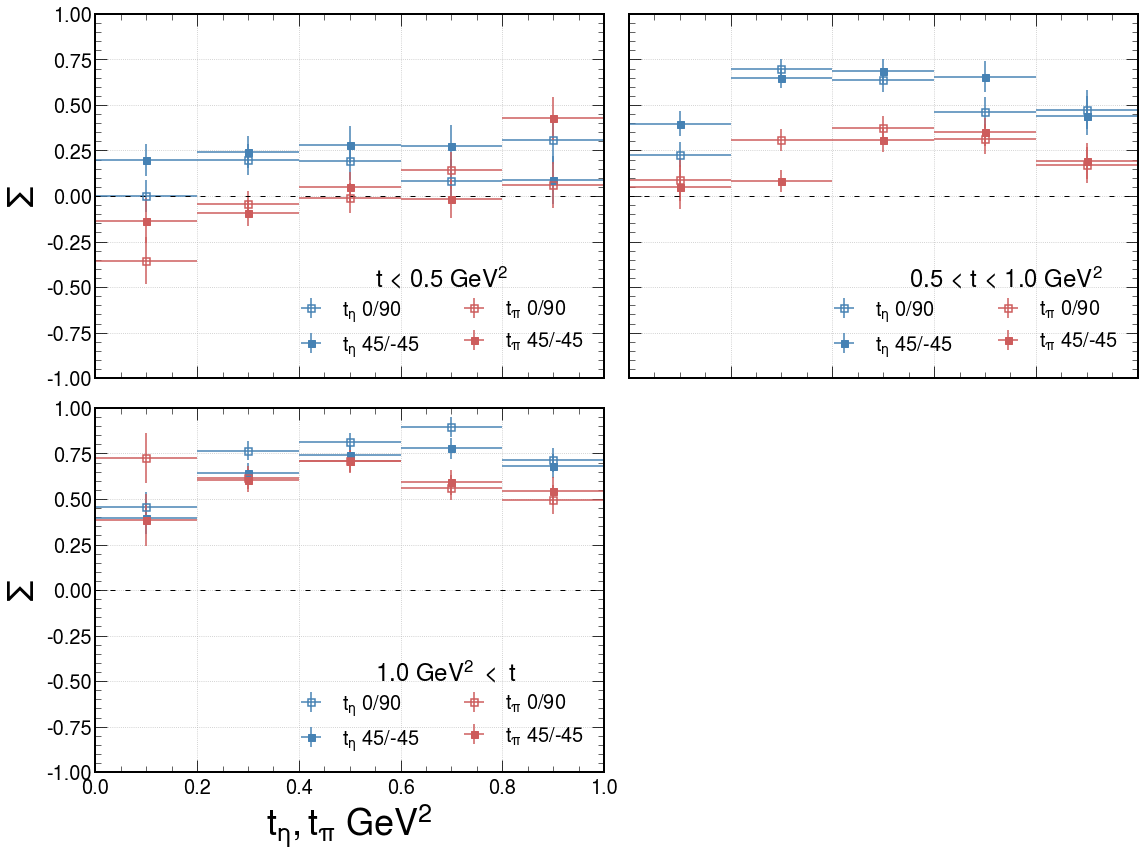

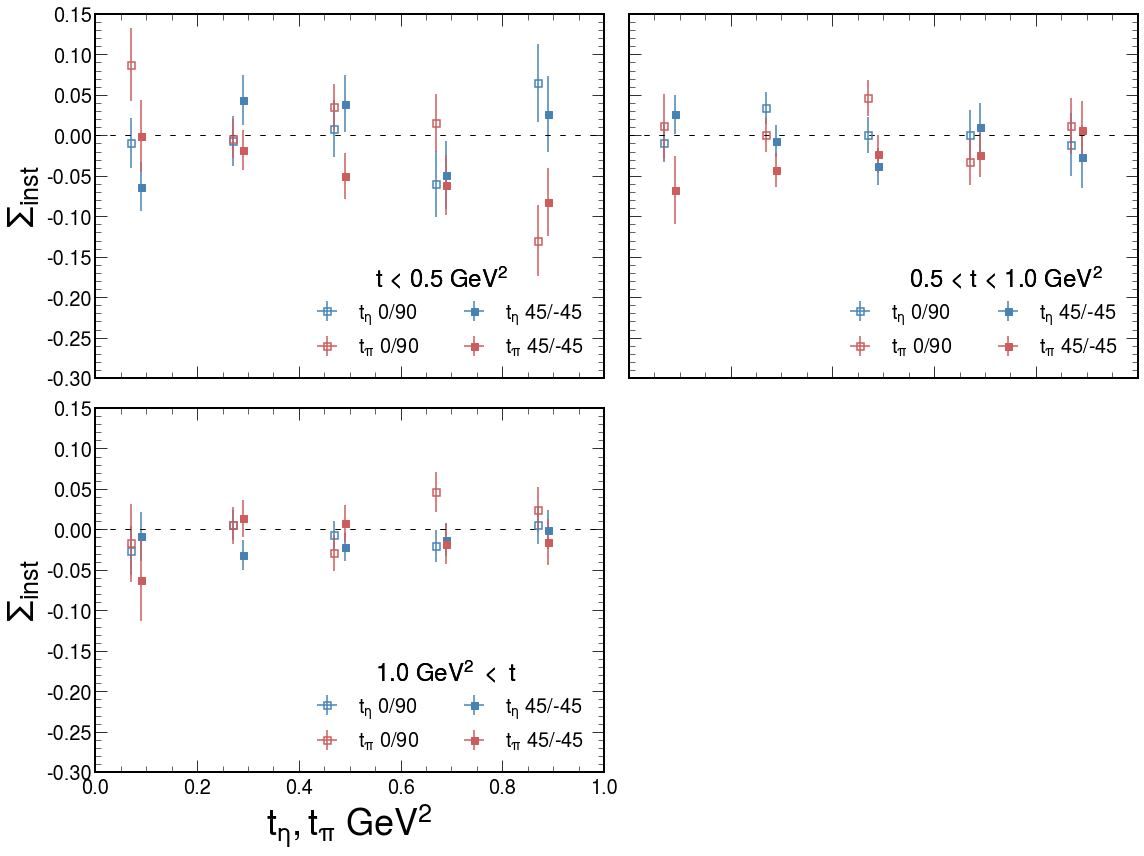

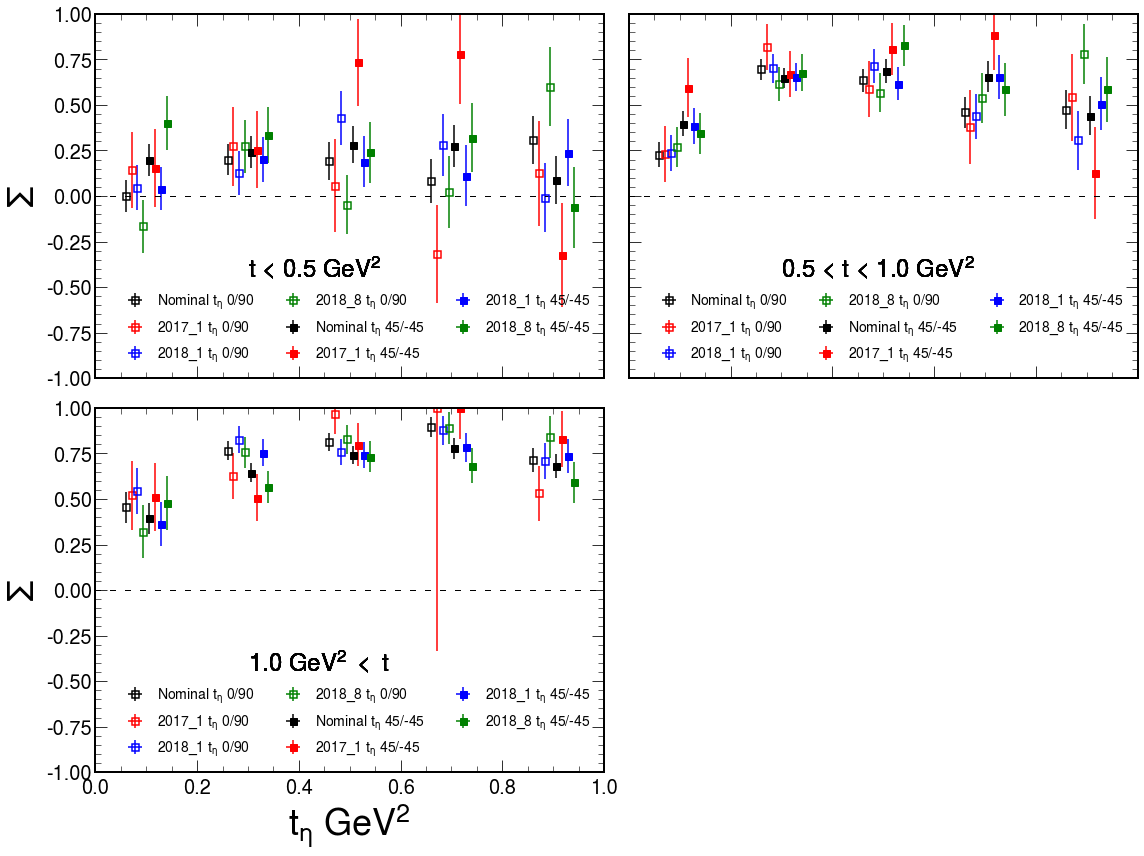

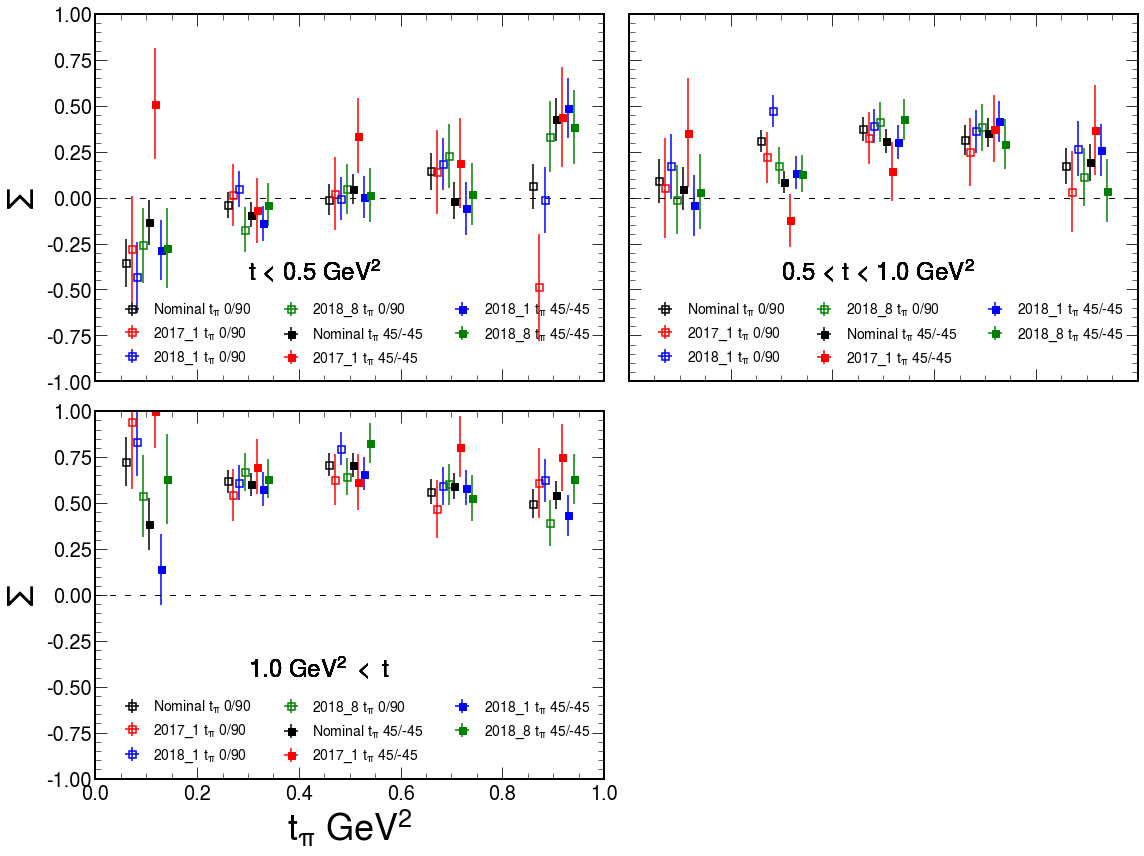

In [33]:
shape=(2,2)
fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
axes=axes.flatten()

minvals=[0,0.5,1]
maxvals=[0.5,1,100]
labels=[
    r"t < 0.5 $GeV^{2}$",
    r"0.5 < t < 1.0 $GeV^{2}$",
    r"$1.0~GeV^{2}~<~t$",
]

plotAsymmetries(df,axes,labels,r"$\Sigma$","mandelstam_t",shape,["eta","pi0"],"total",method,"asym",["steelblue","indianred"],"",
               minvals,maxvals,labels,labelOffset=0.15,labelOffsetX=0.45)
plt.savefig(saveFolder+"binned_u3"+outputTag+".pdf")
plt.tight_layout()
listOfImportantFiles.append(saveFolder+"binned_u3"+outputTag+".pdf")

################################### Instrumental Asymmetry
shape=(2,2)
fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
axes=axes.flatten()

mapSysts=[]
offsets=np.linspace(-0.03,0.03,4)
i=0
for pairsToPlot in [["000"],["045"]]:
    mapSysts.append(plotAsymmetries(df,axes,labels,r"$\Sigma_{inst}$","mandelstam_t",shape,["eta","pi0"],"total","","instAsym",["steelblue","indianred"],"",
                   minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.15,labelOffsetX=0.45))
    i+=1
plt.tight_layout()
for ax in axes:
    ax.set_ylim(-0.3,0.15)
plt.savefig(saveFolder+"instAsym_binned_u3"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"instAsym_binned_u3"+outputTag+".pdf")
tmpdf, chi2 = constructInstAsymTable(mapSysts,labels)
prettyTable(tmpdf,"lllll","Binned in $t_1$ and $u_3. $\chi^2$ of "+chi2+" with respect to zero asymmetry for the ensemble",
            "Inst_u3","000",'all',2,splitParticleTable=False)

################################## PER RUN
for iax,particle in enumerate(["eta","pi0"]):
    shape=(2,2)
    fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
    axes=axes.flatten()

    
    offsets=np.linspace(-0.04,0.04,8)
    i=0
    for pairsToPlot in [["000"],["045"]]:
        # plotAsymmetries normally runs over all axes in a list looping over all labels
        #    if we wanted to just run over a single axis/label pair we can grab a specific axis and put that into a list, i.e. [axes[0]]
        plotAsymmetries(df,axes,labels,r"$\Sigma$","mandelstam_t",shape,[particle],"total",method,"asym",["black","black"],"Nominal ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","mandelstam_t",shape,[particle],"2017_1",method,"asym",["red","red"],"2017_1 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","mandelstam_t",shape,[particle],"2018_1",method,"asym",["blue","blue"],"2018_1 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","mandelstam_t",shape,[particle],"2018_8",method,"asym",["green","green"],"2018_8 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1

    skipPads=[3]
    for iax in range(len(axes)):
        if iax not in skipPads:
            axes[iax].legend(loc=4,prop={"size":14},ncol=3)
        else:
            axes[iax].axis(False)
    plt.tight_layout()
    plt.savefig(saveFolder+"binned_u3_per_run_"+particle+outputTag+".pdf")
    listOfImportantFiles.append(saveFolder+"binned_u3_per_run_"+particle+outputTag+".pdf")

## Binned in Metap

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.





\begin{longtable}{||lllll||}
\hline
                         Binning & Polarization Pair &          $t_1$ bin &   $\Sigma_{inst}$ & $N \sigma_{diff}$ \\
\hline\hline
\endhead
\hline\hline
\multicolumn{5}{r}{{Continued on next page}} \\
\hline\hline
\endfoot

\hline
\endlastfoot
 0.0<$M(\eta p)$<$2.1 GeV^{{2}}$ &              0/90 &  0.0$<t_{\pi}<$0.2 &   0.070$\pm$0.033 &             2.157 \\
 0.0<$M(\eta p)$<$2.1 GeV^{{2}}$ &              0/90 &  0.2$<t_{\pi}<$0.4 &   0.006$\pm$0.017 &             0.353 \\
 0.0<$M(\eta p)$<$2.1 GeV^{{2}}$ &              0/90 &  0.4$<t_{\pi}<$0.6 &   0.009$\pm$0.018 &             0.508 \\
 0.0<$M(\eta p)$<$2.1 GeV^{{2}}$ &              0/90 &  0.6$<t_{\pi}<$0.8 &   0.041$\pm$0.023 &             1.800 \\
 0.0<$M(\eta p)$<$2.1 GeV^{{2}}$ &              0/90 &  0.8$<t_{\pi}<$1.0 &  -0.014$\pm$0.027 &             0.532 \\
 0.0<$M(\eta p)$<$2.1 GeV^{{2}}$ &            45/-45 &  0.0$<t_{\pi}<$0.2 &  -0.035$\pm$0.034 &             1.044 \\
 0.0<$M(\eta p)$

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


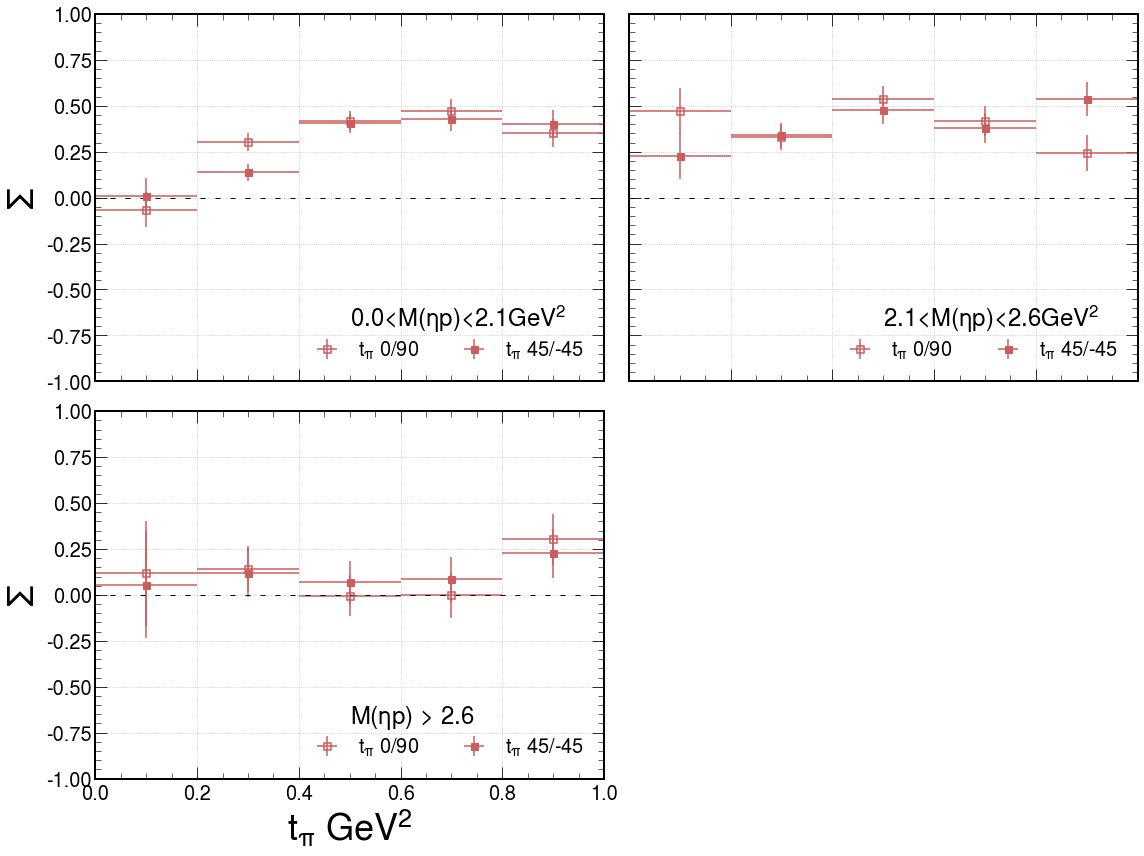

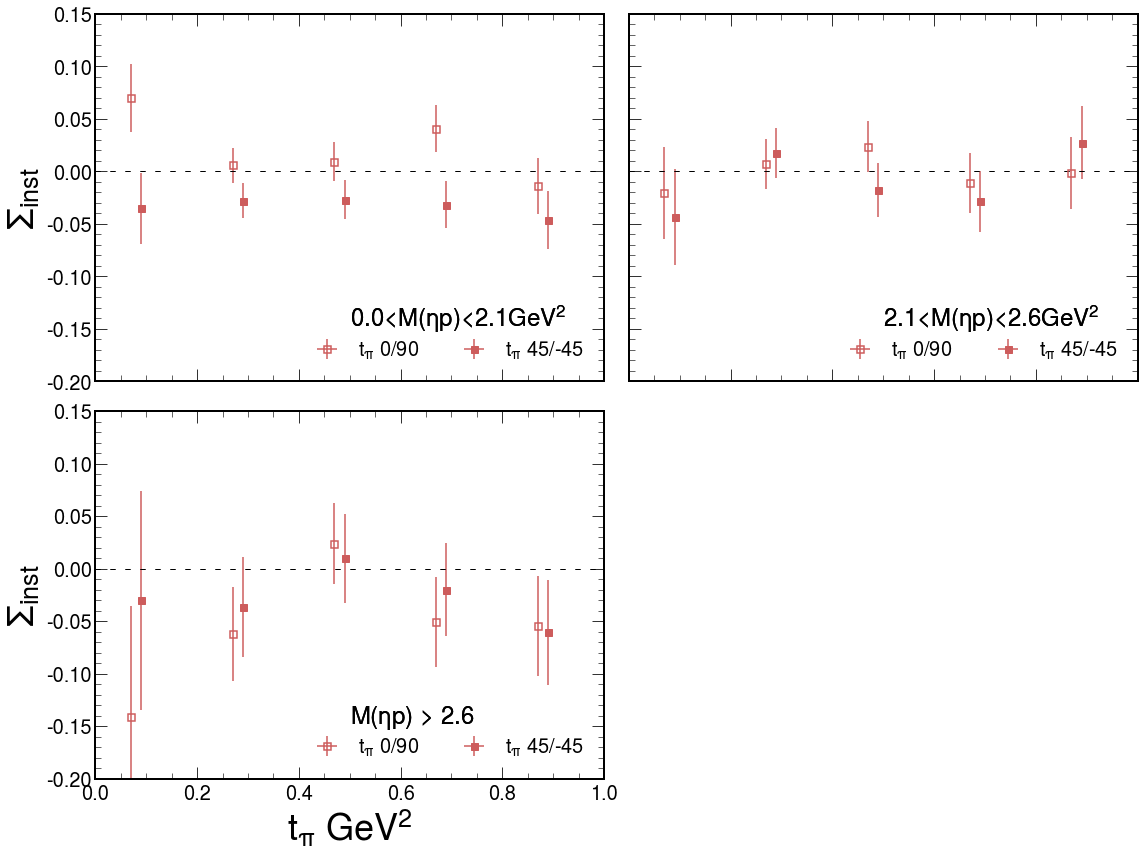

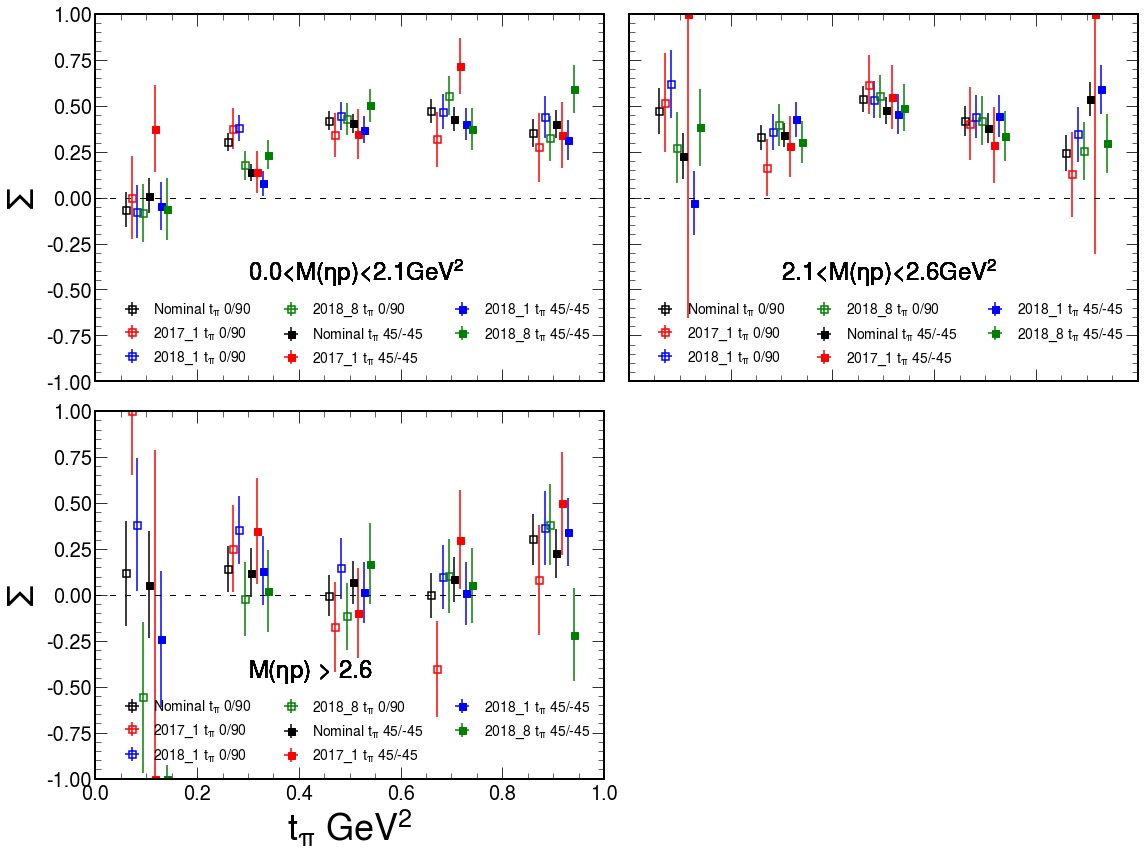

In [34]:
shape=(2,2)
fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
axes=axes.flatten()

minvals=df[df.binVar=="Metap"].minval1.unique()
maxvals=df[df.binVar=="Metap"].maxval1.unique()
labels=[]

for minval,maxval in zip(minvals,maxvals):
    labels.append(r""+str(minval)+"<$M(\eta p)$<$"+str(maxval)+" GeV^{{2}}$")
labels[-1]=r"$M(\eta p)$ > {}".format(maxvals[1])

plotAsymmetries(df,axes,labels,r"$\Sigma$","Metap",shape,["pi0"],"total",method,"asym",["indianred"],"",minvals,maxvals,labels,labelOffset=0.05,
               labelOffsetX=0.4)
plt.tight_layout()
plt.savefig(saveFolder+"binned_setap"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"binned_setap"+outputTag+".pdf")

################################### Instrumental Asymmetry
shape=(2,2)
fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
axes=axes.flatten()

offsets=np.linspace(-0.03,0.03,4)
i=0
mapSysts=[]
for pairsToPlot in [["000"],["045"]]:
    mapSysts.append(plotAsymmetries(df,axes,labels,r"$\Sigma_{inst}$","Metap",shape,["pi0"],"total","","instAsym",["indianred"],"",
                   minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.05,labelOffsetX=0.4))
    i+=1
for ax in axes:
    ax.set_ylim(-0.2,0.15)
plt.tight_layout()
plt.savefig(saveFolder+"instAsym_binned_setap"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"instAsym_binned_setap"+outputTag+".pdf")
tmpdf, chi2 = constructInstAsymTable(mapSysts,labels)
prettyTable(tmpdf,"lllll","Binned in $t_1$ and $M(\eta p)$. $\chi^2$ of "+chi2+" with respect to zero asymmetry for the ensemble",
            "Inst_u3","000",'all',2,splitParticleTable=False)
    

################################## PER RUN
for iax,particle in enumerate(["pi0"]):
    shape=(2,2)
    fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
    axes=axes.flatten()
    offsets=np.linspace(-0.04,0.04,8)
    i=0
    for pairsToPlot in [["000"],["045"]]:
        # plotAsymmetries normally runs over all axes in a list looping over all labels
        #    if we wanted to just run over a single axis/label pair we can grab a specific axis and put that into a list, i.e. [axes[0]]
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Metap",shape,[particle],"total",method,"asym",["black","black"],"Nominal ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Metap",shape,[particle],"2017_1",method,"asym",["red","red"],"2017_1 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Metap",shape,[particle],"2018_1",method,"asym",["blue","blue"],"2018_1 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Metap",shape,[particle],"2018_8",method,"asym",["green","green"],"2018_8 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1

    skipPads=[3]
    for iax in range(len(axes)):
        if iax not in skipPads:
            axes[iax].legend(loc=4,prop={"size":14},ncol=3)
        else:
            axes[iax].axis(False)
    plt.tight_layout()
    plt.savefig(saveFolder+"binned_setap_per_run_"+particle+outputTag+".pdf")
    listOfImportantFiles.append(saveFolder+"binned_setap_per_run_"+particle+outputTag+".pdf")

# Binned Mpi0p

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.





\begin{longtable}{||lllll||}
\hline
                         Binning & Polarization Pair &           $t_1$ bin &   $\Sigma_{inst}$ & $N \sigma_{diff}$ \\
\hline\hline
\endhead
\hline\hline
\multicolumn{5}{r}{{Continued on next page}} \\
\hline\hline
\endfoot

\hline
\endlastfoot
 $1.15<M(\pi p)$<$1.4 GeV^{{2}}$ &              0/90 &  0.0$<t_{\eta}<$0.2 &  -0.009$\pm$0.024 &             0.384 \\
 $1.15<M(\pi p)$<$1.4 GeV^{{2}}$ &              0/90 &  0.2$<t_{\eta}<$0.4 &   0.005$\pm$0.016 &             0.336 \\
 $1.15<M(\pi p)$<$1.4 GeV^{{2}}$ &              0/90 &  0.4$<t_{\eta}<$0.6 &   0.003$\pm$0.018 &             0.172 \\
 $1.15<M(\pi p)$<$1.4 GeV^{{2}}$ &              0/90 &  0.6$<t_{\eta}<$0.8 &   0.024$\pm$0.026 &             0.924 \\
 $1.15<M(\pi p)$<$1.4 GeV^{{2}}$ &              0/90 &  0.8$<t_{\eta}<$1.0 &   0.024$\pm$0.041 &             0.590 \\
 $1.15<M(\pi p)$<$1.4 GeV^{{2}}$ &            45/-45 &  0.0$<t_{\eta}<$0.2 &   0.003$\pm$0.025 &             0.105 \\
 $1.15<M(

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


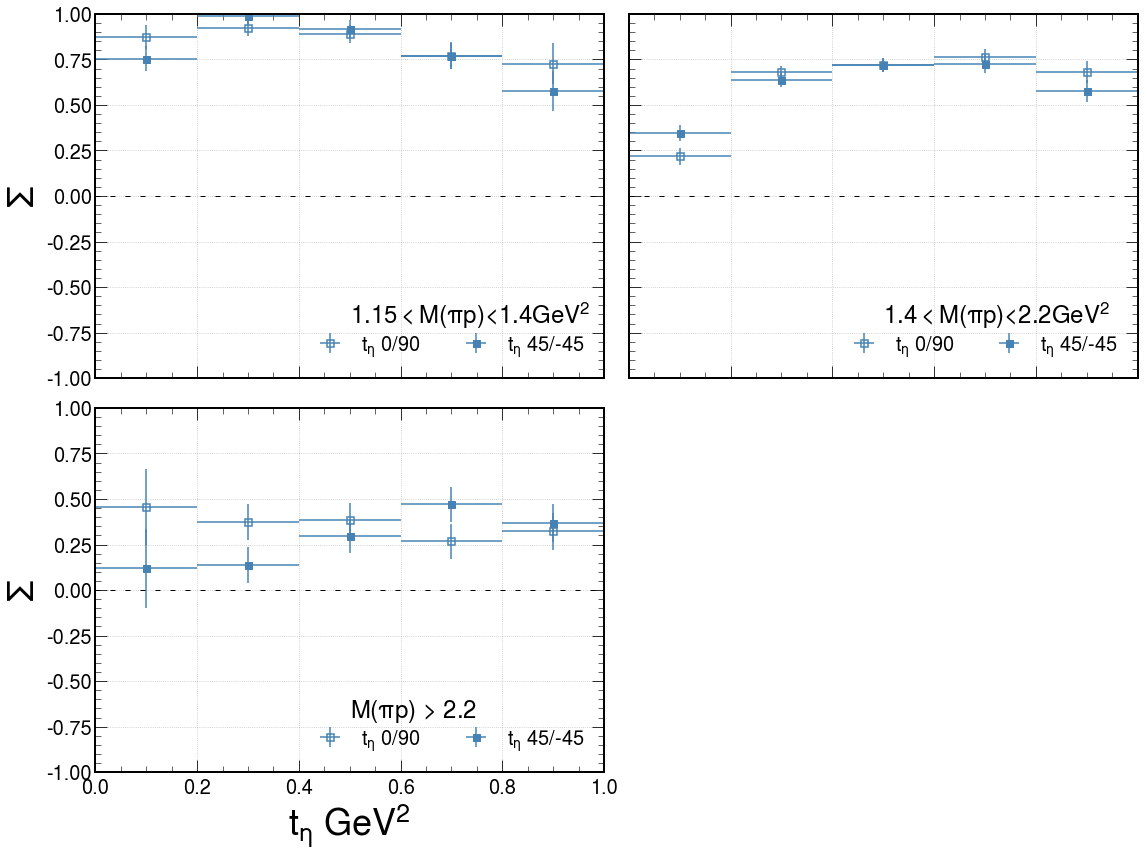

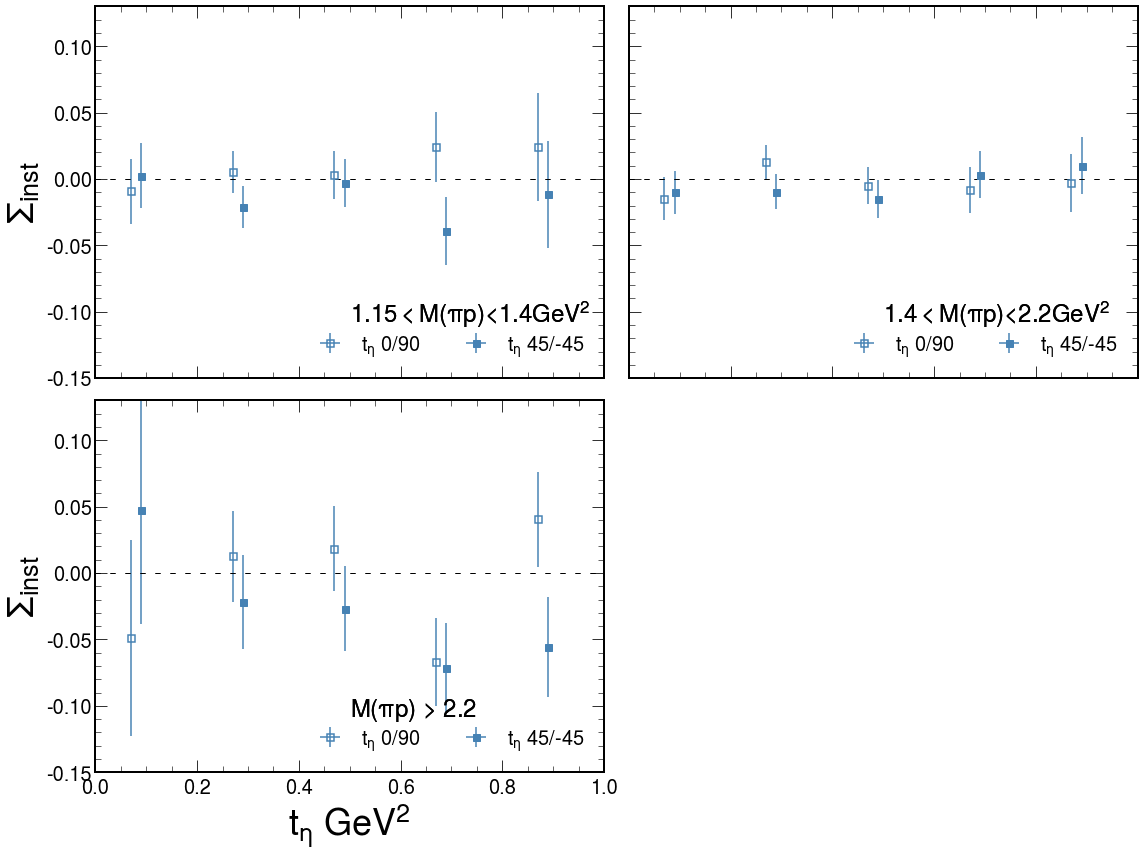

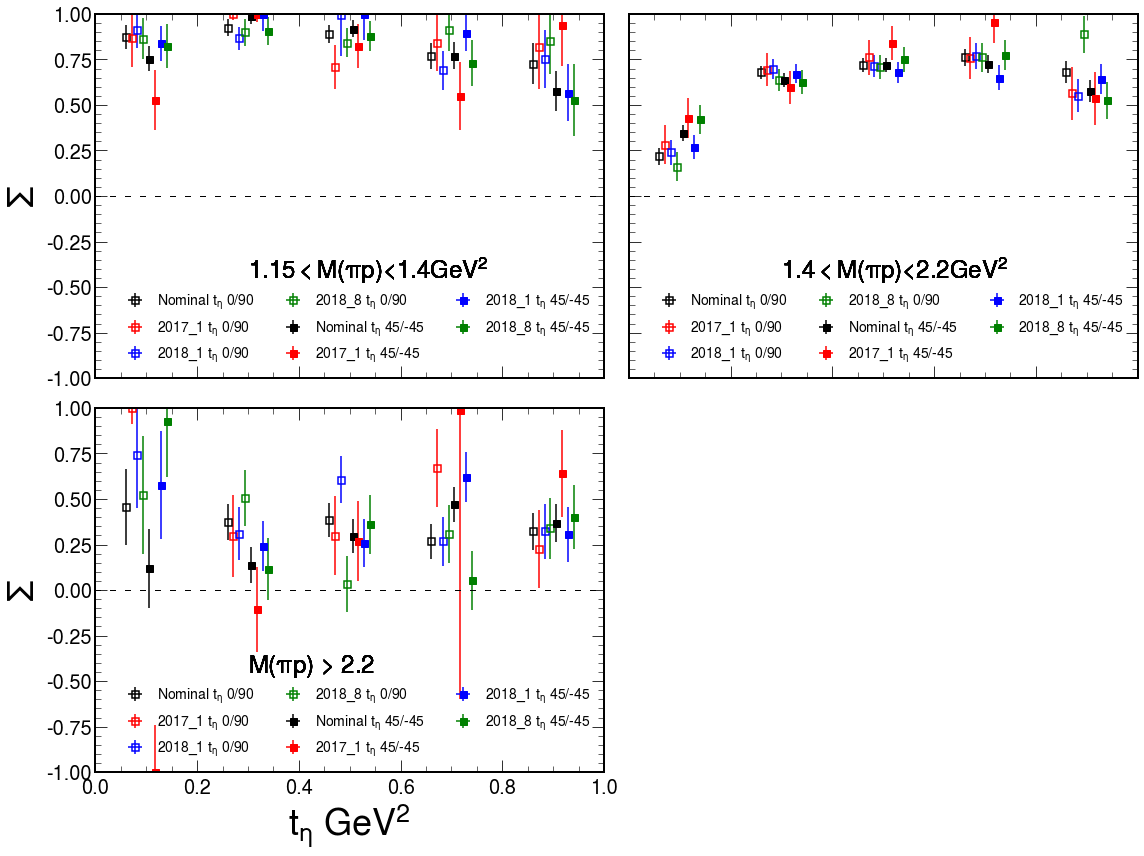

In [35]:
shape=(2,2)
fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
axes=axes.flatten()

minvals=df[df.binVar=="Mpi0p"].minval1.unique()
maxvals=df[df.binVar=="Mpi0p"].maxval1.unique()
labels=[]
for minval,maxval in zip(minvals,maxvals):
    labels.append(r"$"+str(minval)+"<M(\pi p)$<$"+str(maxval)+" GeV^{{2}}$")
labels[-1]=r"$M(\pi p)$ > {}".format(maxvals[1])


plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0p",shape,["eta"],"total",method,"asym",["steelblue"],"",minvals,maxvals,labels,labelOffset=0.05,
               labelOffsetX=0.4)
plt.tight_layout()
plt.savefig(saveFolder+"binned_spi0p"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"binned_spi0p"+outputTag+".pdf")

################################### Instrumental Asymmetry
shape=(2,2)
fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
axes=axes.flatten()

offsets=np.linspace(-0.03,0.03,4)
i=0
mapSysts=[]
for pairsToPlot in [["000"],["045"]]:
    mapSysts.append(plotAsymmetries(df,axes,labels,r"$\Sigma_{inst}$","Mpi0p",shape,["eta"],"total","","instAsym",["steelblue"],"",minvals,maxvals,labels,
                   showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.05,labelOffsetX=0.4))
    i+=1
for ax in axes:
    ax.set_ylim(-0.15,0.13)
plt.tight_layout()
plt.savefig(saveFolder+"instAsym_binned_spi0p"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"instAsym_binned_spi0p"+outputTag+".pdf")
tmpdf, chi2 = constructInstAsymTable(mapSysts,labels)
prettyTable(tmpdf,"lllll","Binned in $t_1$ and $M(\pi^0 p)$. $\chi^2$ of "+chi2+" with respect to zero asymmetry for the ensemble"
            ,"Inst_u3","000",'all',2,splitParticleTable=False)
    
################################## PER RUN
for iax,particle in enumerate(["eta"]):
    shape=(2,2)
    fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
    axes=axes.flatten()
    offsets=np.linspace(-0.04,0.04,8)
    i=0
    for pairsToPlot in [["000"],["045"]]:
        # plotAsymmetries normally runs over all axes in a list looping over all labels
        #    if we wanted to just run over a single axis/label pair we can grab a specific axis and put that into a list, i.e. [axes[0]]
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0p",shape,[particle],"total",method,"asym",["black","black"],"Nominal ",minvals,maxvals,labels,
                       showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0p",shape,[particle],"2017_1",method,"asym",["red","red"],"2017_1 ",minvals,maxvals,labels,
                       showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0p",shape,[particle],"2018_1",method,"asym",["blue","blue"],"2018_1 ",minvals,maxvals,labels,
                       showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0p",shape,[particle],"2018_8",method,"asym",["green","green"],"2018_8 ",minvals,maxvals,labels,
                       showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.175,labelOffsetX=0.2)
        i+=1

    skipPads=[3]
    for iax in range(len(axes)):
        if iax not in skipPads:
            axes[iax].legend(loc=4,prop={"size":14},ncol=3)
        else:
            axes[iax].axis(False)
    plt.tight_layout()
    plt.savefig(saveFolder+"binned_spi0p_per_run_"+particle+outputTag+".pdf")
    listOfImportantFiles.append(saveFolder+"binned_spi0p_per_run_"+particle+outputTag+".pdf")

## Binned in s12

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.





\begin{longtable}{||lllll||}
\hline
                          Binning & Polarization Pair &           $t_1$ bin &   $\Sigma_{inst}$ & $N \sigma_{diff}$ \\
\hline\hline
\endhead
\hline\hline
\multicolumn{5}{r}{{Continued on next page}} \\
\hline\hline
\endfoot

\hline
\endlastfoot
 $1.6<M(\pi\eta)$<$2.1 GeV^{{2}}$ &              0/90 &  0.0$<t_{\eta}<$0.2 &  -0.006$\pm$0.026 &             0.231 \\
 $1.6<M(\pi\eta)$<$2.1 GeV^{{2}}$ &              0/90 &  0.2$<t_{\eta}<$0.4 &  -0.020$\pm$0.020 &             1.020 \\
 $1.6<M(\pi\eta)$<$2.1 GeV^{{2}}$ &              0/90 &  0.4$<t_{\eta}<$0.6 &   0.019$\pm$0.021 &             0.884 \\
 $1.6<M(\pi\eta)$<$2.1 GeV^{{2}}$ &              0/90 &  0.6$<t_{\eta}<$0.8 &  -0.039$\pm$0.025 &             1.566 \\
 $1.6<M(\pi\eta)$<$2.1 GeV^{{2}}$ &              0/90 &  0.8$<t_{\eta}<$1.0 &   0.034$\pm$0.028 &             1.224 \\
 $1.6<M(\pi\eta)$<$2.1 GeV^{{2}}$ &              0/90 &   0.0$<t_{\pi}<$0.2 &   0.021$\pm$0.038 &             0.565 \\
 $

No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
No handles with labels found to put in legend.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


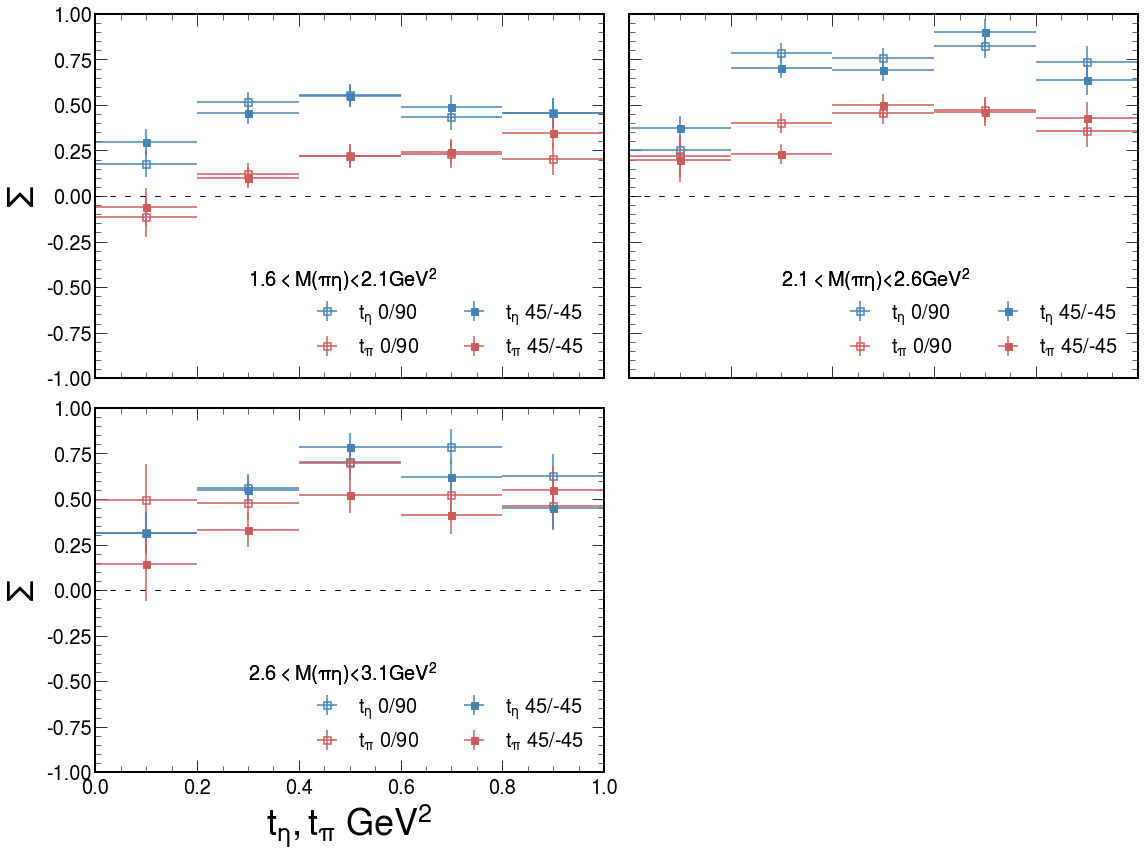

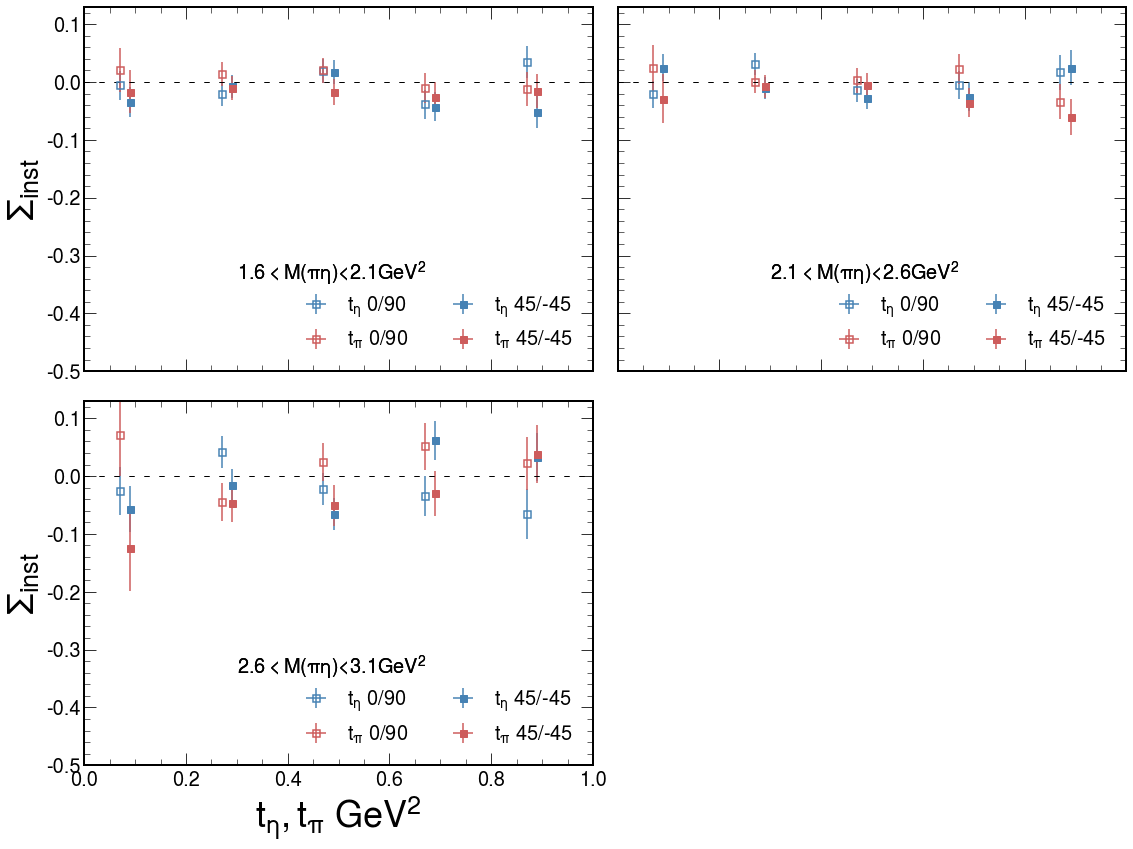

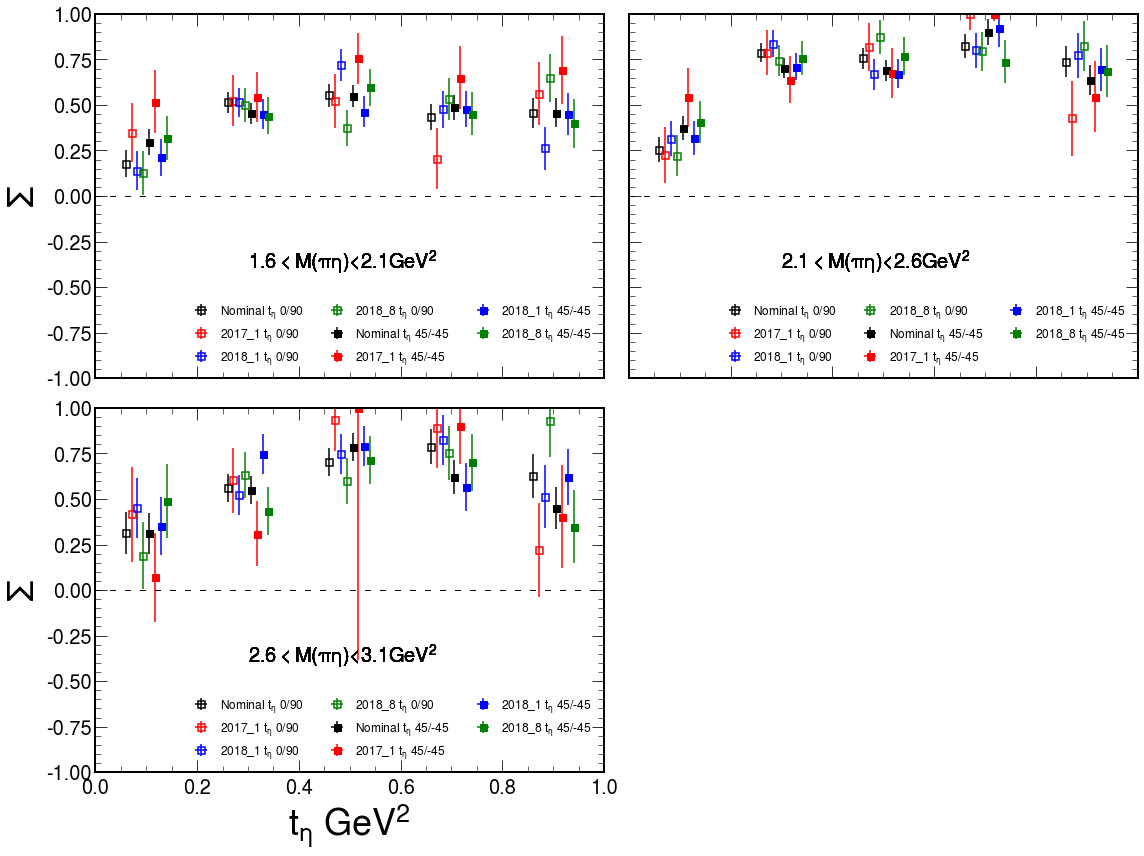

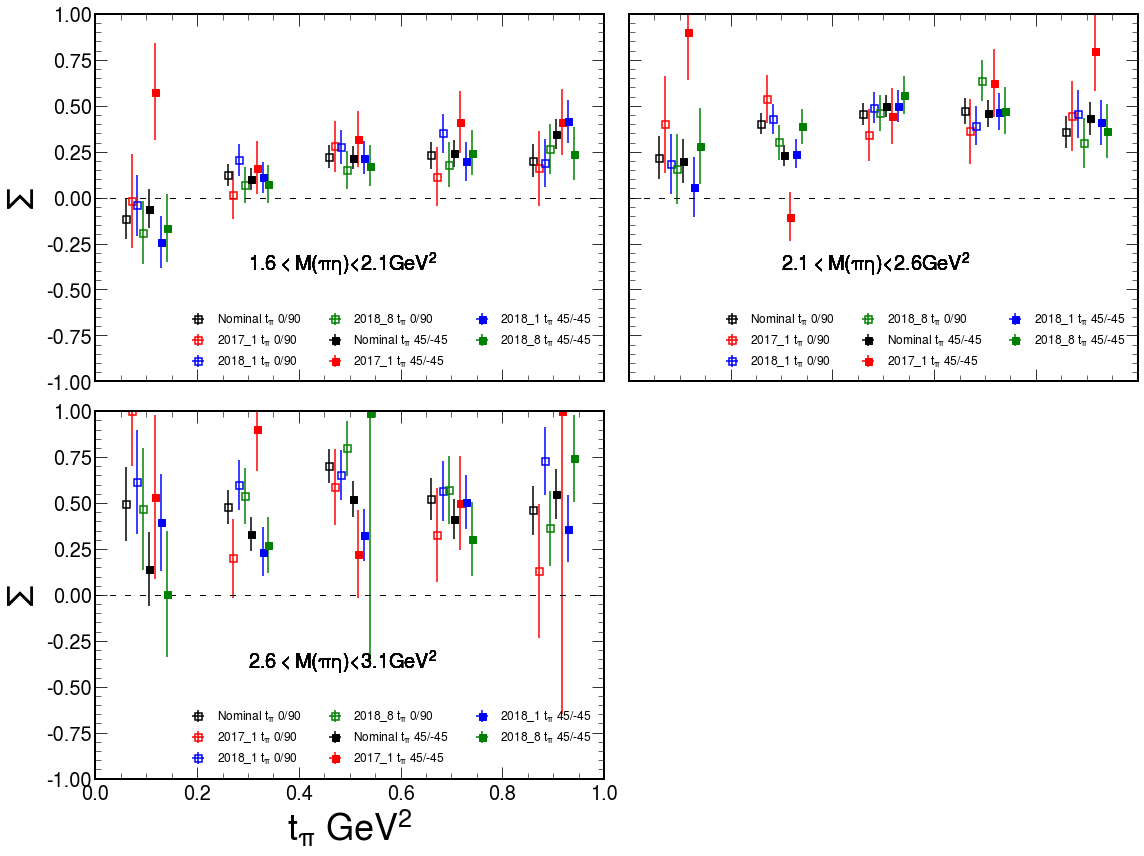

In [36]:
shape=(2,2)
fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
axes=axes.flatten()

minvals=df[df.binVar=="Mpi0eta"].minval1.unique()
maxvals=df[df.binVar=="Mpi0eta"].maxval1.unique()
labels=[]
for minval,maxval in zip(minvals,maxvals):
    labels.append(r"$"+str(minval)+"<M(\pi\eta)$<$"+str(maxval)+" GeV^{{2}}$")

for pairsToPlot in [["000"],["045"]]:
    plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0eta",shape,["eta","pi0"],"total",method,"asym",["steelblue","indianred"],"",minvals,maxvals,labels,
                   pairsToPlot=pairsToPlot,labelOffset=0.15,labelOffsetX=0.2,labelSize=20)
plt.savefig(saveFolder+"binned_s12"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"binned_s12"+outputTag+".pdf")

################################### Instrumental Asymmetry
shape=(2,2)
fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
axes=axes.flatten()

offsets=np.linspace(-0.03,0.03,4)
i=0
mapSysts=[]
for pairsToPlot in [["000"],["045"]]:
    mapSysts.append(plotAsymmetries(df,axes,labels,r"$\Sigma_{inst}$","Mpi0eta",shape,["eta","pi0"],"total","","instAsym",["steelblue","indianred"],"",
                   minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.15,labelOffsetX=0.2,
                    labelSize=20))
    i+=1
for ax in axes:
    ax.set_ylim(-0.5,0.13)
plt.savefig(saveFolder+"instAsym_binned_s12"+outputTag+".pdf")
listOfImportantFiles.append(saveFolder+"instAsym_binned_s12"+outputTag+".pdf")
tmpdf, chi2 = constructInstAsymTable(mapSysts,labels)
prettyTable(tmpdf,"lllll","Binned in $t_1$ and $s_{12}$. $\chi^2$ of "+chi2+" with respect to zero asymmetry for the ensemble",
            "Inst_u3","000",'all',2,splitParticleTable=False)


################################## PER RUN
for iax,particle in enumerate(["eta","pi0"]):
    shape=(2,2)
    fig,axes = plt.subplots(*shape,figsize=(16,12),sharex=True,sharey=True)
    axes=axes.flatten()
    offsets=np.linspace(-0.04,0.04,8)
    i=0
    for pairsToPlot in [["000"],["045"]]:
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0eta",shape,[particle],"total",method,"asym",["black","black"],"Nominal ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.2,labelOffsetX=0.2,
                        labelSize=20)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0eta",shape,[particle],"2017_1",method,"asym",["red","red"],"2017_1 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.2,labelOffsetX=0.2,
                        labelSize=20)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0eta",shape,[particle],"2018_1",method,"asym",["blue","blue"],"2018_1 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.2,labelOffsetX=0.2,
                        labelSize=20)
        i+=1
        plotAsymmetries(df,axes,labels,r"$\Sigma$","Mpi0eta",shape,[particle],"2018_8",method,"asym",["green","green"],"2018_8 ",
                       minvals,maxvals,labels,showXerrs=False,pairsToPlot=pairsToPlot,offset=offsets[i],labelOffset=0.2,labelOffsetX=0.2,
                        labelSize=20)
        i+=1

    skipPads=[7]
    for iax in range(len(axes)):
        if iax not in skipPads:
            axes[iax].legend(loc=4,prop={"size":12},ncol=3)
        else:
            axes[iax].axis(False)
    plt.tight_layout()
    plt.savefig(saveFolder+"binned_s12_per_run_"+particle+outputTag+".pdf")
    listOfImportantFiles.append(saveFolder+"binned_s12_per_run_"+particle+outputTag+".pdf")

In [37]:
# MOVE THE dfDiff RESULTS TO THE FINAL RESULTS FOLDER
for tmpfile in listOfImportantFiles:
    os.system("mv "+tmpfile+" "+saveFolder+"finalResults/")

# Check left and right hand sidebands

In [52]:
# runs=["2017_1","2018_1","2018_8"]
# cols=["Mpi0eta","cosTheta_eta_gj","phi_eta_gj","cosTheta_eta_hel","phi_eta_hel","mandelstam_t","mandelstam_tp","Mpi0p","Metap","Ebeam","Meta","Mpi0","rfTime",
#       "mandelstam_teta","mandelstam_tpi0",
#       "weightASBS","AccWeight","weightBS","unusedEnergy",
#       "chiSq","mmsq",
#       "run","event"]

# datas={}
# for run in runs:
#     file=uproot.open("/d/grid17/ln16/myDSelector/fitAsymmetry_trees_loosePi0EtaCut_mEllipse_v2/degALL_data_"+str(run)+"_BA_treeFlat_DSelector.root")
#     tree=file[b'tree_4g_flat']
#     tmp_df=tree.arrays(cols,outputtype=pd.DataFrame).reset_index(drop=True)
#     tmp_df=tmp_df[tmp_df.Mpi0p>1.4]
#     datas[run]=tmp_df

# datas["phase1"]=pd.concat([datas[run] for run in runs])

tmp=listSelect(datas['phase1'],getNominalSelection())

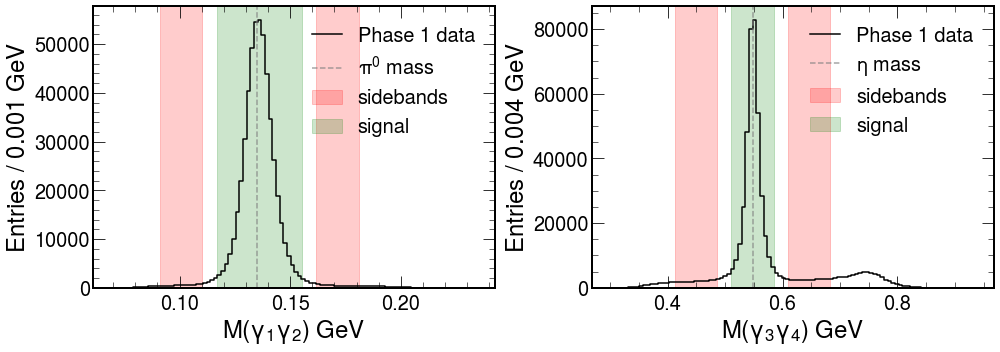

In [53]:
eta_peak=0.548
eta_std=0.0123
etasbRL=eta_peak+5*eta_std
etasbRR=eta_peak+11*eta_std
etasbLL=eta_peak-11*eta_std
etasbLR=eta_peak-5*eta_std
etasigL=eta_peak-3*eta_std
etasigR=eta_peak+3*eta_std
pi0_peak=0.136
pi0_std=0.006425
pi0sigL=pi0_peak-3*pi0_std
pi0sigR=pi0_peak+3*pi0_std

fig,axes=plt.subplots(1,2,figsize=(14,5))

hep.histplot(np.histogram(tmp["Meta"],weights=tmp["AccWeight"],bins=100),label="Phase 1 data",color='black',ax=axes[1])
axes[1].axvspan(eta_peak+5*eta_std,eta_peak+11*eta_std,color='red',alpha=0.2,label='sidebands')
axes[1].axvspan(eta_peak-11*eta_std,eta_peak-5*eta_std,color='red',alpha=0.2)
axes[1].axvspan(eta_peak-3*eta_std,eta_peak+3*eta_std,color='green',alpha=0.2,label='signal')

hep.histplot(np.histogram(tmp["Mpi0"],weights=tmp["AccWeight"],bins=100),label="Phase 1 data",color='black',ax=axes[0])
axes[0].axvspan(pi0_peak+4*pi0_std,pi0_peak+7*pi0_std,color='red',alpha=0.2,label='sidebands')
axes[0].axvspan(pi0_peak-7*pi0_std,pi0_peak-4*pi0_std,color='red',alpha=0.2)
axes[0].axvspan(pi0_peak-3*pi0_std,pi0_peak+3*pi0_std,color='green',alpha=0.2,label='signal')

axes[0].axvline(0.135,c="gray",label=r"$\pi^0$ mass",linestyle='--',alpha=0.7)
axes[1].axvline(0.548,c="gray",label=r"$\eta$ mass",linestyle='--',alpha=0.7)
axes[0].set_ylim(bottom=0)
axes[1].set_ylim(bottom=0)
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel(r"$M(\gamma_1\gamma_2)$ GeV")
axes[1].set_xlabel(r"$M(\gamma_3\gamma_4)$ GeV")
axes[0].set_ylabel("Entries / %0.3f $GeV$" % (0.001))
axes[1].set_ylabel("Entries / %0.3f $GeV$" % (0.004))
plt.tight_layout()

select_pi0=(tmp.Mpi0>pi0sigL)&(tmp.Mpi0<pi0sigR)
select_sbL=((tmp.Meta>etasbLL)&(tmp.Meta<etasbLR))
select_sbR=((tmp.Meta>etasbRL)&(tmp.Meta<etasbRR))
df_sb=tmp[select_pi0&(select_sbL)]#|select_sbR]

In [54]:
def histogram(var1,weights,minval,maxval,nbins):
    binedges=np.linspace(minval,maxval,nbins+1)
    width=binedges[1]-binedges[0]
    out = np.histogram(df_sb.mandelstam_teta,weights=df_sb.AccWeight,bins=binedges)
    return out, binedges, width

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


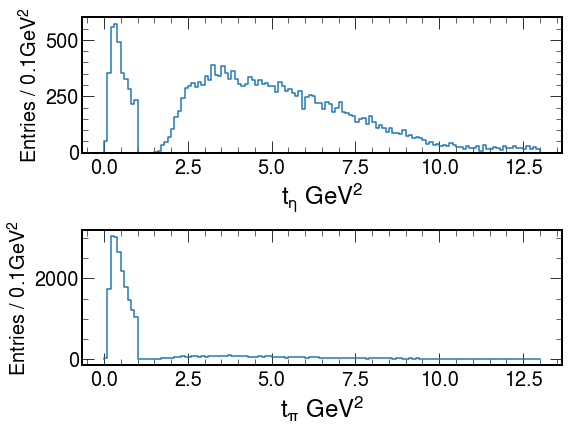

In [55]:
fig,axes=plt.subplots(2,1,figsize=(8,6))
axes=axes.flatten()
out, edges, width = histogram(df_sb.mandelstam_teta,df_sb.AccWeight,0,13,130)
hep.histplot(np.histogram(df_sb.mandelstam_teta,weights=df_sb.AccWeight,bins=edges),ax=axes[0])
axes[0].set_xlabel(r"$t_{\eta}~GeV^{2}$",size=24)
axes[0].set_ylabel("$Entries~/~{0:.1f} GeV^2$".format(width),size=20)

out, edges, width = histogram(df_sb.mandelstam_tpi0,df_sb.AccWeight,0,13,130)
hep.histplot(np.histogram(df_sb.mandelstam_tpi0,weights=df_sb.AccWeight,bins=edges),ax=axes[1])
axes[1].set_xlabel(r"$t_{\pi}~GeV^{2}$",size=24)
axes[1].set_ylabel("$Entries~/~{0:.1f} GeV^2$".format(width),size=20)
plt.tight_layout()

plt.savefig(saveFolder+"sideband_yields.pdf")

In [100]:
# fileLoc='/d/grid17/ln16/myDSelector/fitAsymmetryPlots_results/results_sb.csv'
# df_sb=loadResults(fileLoc)
fileLoc=baseFolder+'fitAsymmetryPlots_results/results_sbR.csv'
df_sbR=loadResults(fileLoc)
fileLoc=baseFolder+'fitAsymmetryPlots_results/results_sbL.csv'
df_sbL=loadResults(fileLoc)

fileLoc=baseFolder+'fitAsymmetryPlots_results/results_sbR_1bin.csv'
df_sbR_1bin=loadResults(fileLoc)
fileLoc=baseFolder+'fitAsymmetryPlots_results/results_sbL_1bin.csv'
df_sbL_1bin=loadResults(fileLoc)

(260, 58)
(260, 58)
(52, 58)
(52, 58)


In [101]:
def plotAsymmetry(ax,df,binVar,binlabel,minval,maxval,particles,method):
    '''
    Plotting a single set of asymmetry measurements
    '''
    tmp=df[df.binVar==binVar]
    tmp=tmp[(tmp.maxval1==maxval)&(tmp.minval1==minval)]
    tmp=tmp[(tmp.data=="total")]

    x=tmp.midt1
    xerr=tmp.t1_err
    
    if "eta" in particles:
        eta000=tmp["asym_000_eta_"+str(method)]
        eta000_err=tmp["asym_000_eta_err_"+str(method)]
        eta045=tmp["asym_045_eta_"+str(method)]
        eta045_err=tmp["asym_045_eta_err_"+str(method)]
        print(eta000)
        ax.errorbar(x,eta000,xerr=xerr,yerr=eta000_err,fmt="s",label=r"$t_{\eta}$ 0/90",linewidth=1,c='steelblue',
                    markerfacecolor="None",markeredgewidth=1.5,markersize=10)
        print(eta045)
        ax.errorbar(x,eta045,xerr=xerr,yerr=eta045_err,fmt="s",label=r"$t_{\eta}$ 45/-45",linewidth=1,c='steelblue',
                    markersize=10)

    if "pi0" in particles:
        pi000=tmp["asym_000_pi0_"+str(method)]
        pi000_err=tmp["asym_000_pi0_err_"+str(method)]
        pi045=tmp["asym_045_pi0_"+str(method)]
        pi045_err=tmp["asym_045_pi0_err_"+str(method)]
        ax.errorbar(x,pi000,xerr=xerr,yerr=pi000_err,fmt="o",label=r"$t_{\pi}$ 0/90",linewidth=1,c='indianred',
                    markerfacecolor="None",markeredgewidth=1.5,markersize=10)
        ax.errorbar(x,pi045,xerr=xerr,yerr=pi045_err,fmt="o",label=r"$t_{\pi}$ 45/-45",linewidth=1,c='indianred',markersize=10)
    
    ax.grid()
    ax.text(0.1,0.1,binlabel,transform=ax.transAxes,size=24)
    # ax.set_title(r"Avg  $\Sigma_{0/90}$ & $\Sigma_{45/135}$")
    ax.set_ylim(-1,1)
    ax.axhline(0,linestyle=(0,(5,10)),linewidth=1,c='black')
    ax.legend(loc=4,prop={"size":20})
    plt.tight_layout()
    

15   -0.145688
Name: asym_000_eta_1, dtype: float64
15    0.021497
Name: asym_045_eta_1, dtype: float64
15    0.168145
Name: asym_000_eta_1, dtype: float64
15    0.219448
Name: asym_045_eta_1, dtype: float64


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


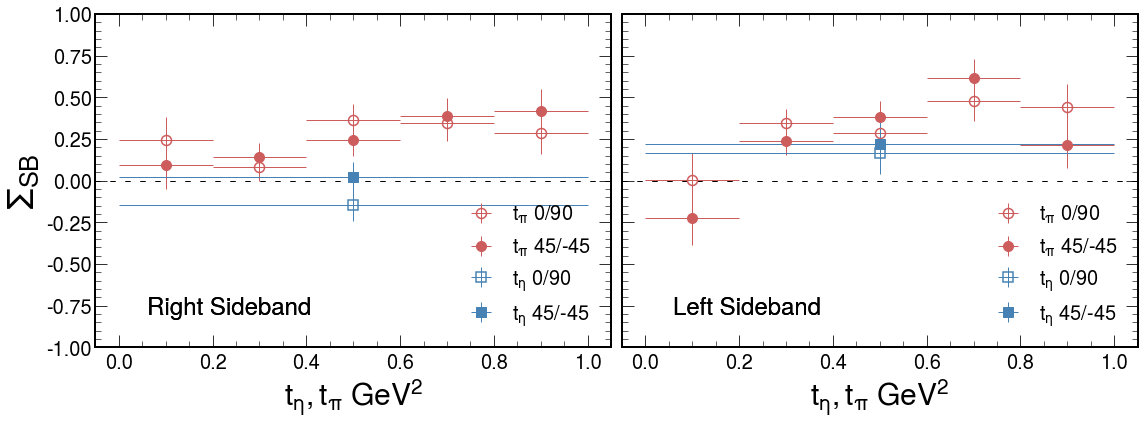

In [102]:
shape=(1,2)
fig,axes = plt.subplots(*shape,figsize=(16,6),sharex=True,sharey=True)
axes=axes.flatten()

plotAsymmetry(axes[0],df_sbR,"mandelstam_t","Right Sideband",0,100,["pi0"],method)
plotAsymmetry(axes[1],df_sbL,"mandelstam_t","Left Sideband",0,100,["pi0"],method)
plotAsymmetry(axes[0],df_sbR_1bin,"mandelstam_t","Right Sideband",0,100,["eta"],method)
plotAsymmetry(axes[1],df_sbL_1bin,"mandelstam_t","Left Sideband",0,100,["eta"],method)
axes[0].set_xlabel(r"$t_{\eta}, t_{\pi}~GeV^{2}$",size=30)
axes[1].set_xlabel(r"$t_{\eta}, t_{\pi}~GeV^{2}$",size=30)
axes[0].set_ylabel(r"$\Sigma_{SB}$",size=36)

plt.tight_layout()
plt.savefig(saveFolder+"sideband_asym.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


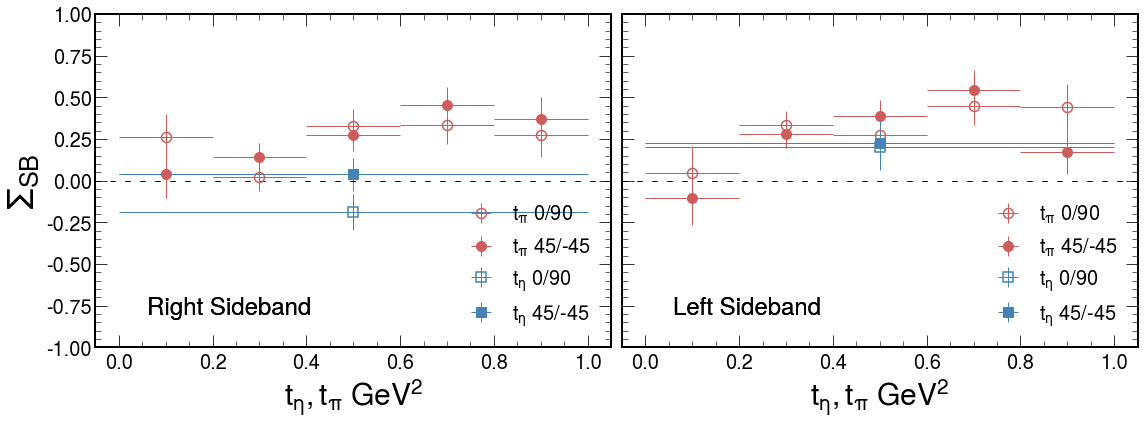

In [21]:
shape=(1,2)
fig,axes = plt.subplots(*shape,figsize=(16,6),sharex=True,sharey=True)
axes=axes.flatten()

plotAsymmetry(axes[0],df_sbR,"mandelstam_t","Right Sideband",0,100,["pi0"],method)
plotAsymmetry(axes[1],df_sbL,"mandelstam_t","Left Sideband",0,100,["pi0"],method)
plotAsymmetry(axes[0],df_sbR_1bin,"mandelstam_t","Right Sideband",0,100,["eta"],method)
plotAsymmetry(axes[1],df_sbL_1bin,"mandelstam_t","Left Sideband",0,100,["eta"],method)
axes[0].set_xlabel(r"$t_{\eta}, t_{\pi}~GeV^{2}$",size=30)
axes[1].set_xlabel(r"$t_{\eta}, t_{\pi}~GeV^{2}$",size=30)
axes[0].set_ylabel(r"$\Sigma_{SB}$",size=36)

plt.tight_layout()
plt.savefig(saveFolder+"sideband_asym.pdf")

# Scan asymmetry for diff selections - Integrated asymmetries

In [249]:
dfs_scan=[]
chiNames=["11","14","17","20","25","30","40"]
pMomNames=["035","040","045","050","055","060","065","070"]
ueNames=["015","025","040","060","080","100"]
chis=[11,14,17,20,25,30,40]
pMoms=[0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70]
ues=[0.15,0.25,0.40,0.60,0.80,1.00]

for chiName in chiNames:
    tmp=loadResults(baseFolder+'fitAsymmetryPlots_results_scan/results_chiLT'+chiName+'_ASBS.csv')
    tmp["selection"]="chi"+chiName
    dfs_scan.append(tmp)
for pMomName in pMomNames:
    tmp=loadResults(baseFolder+'fitAsymmetryPlots_results_scan/results_pMomGT'+pMomName+'_ASBS.csv')
    tmp["selection"]="pMom"+pMomName
    dfs_scan.append(tmp)
for ueName in ueNames:
    tmp=loadResults(baseFolder+'fitAsymmetryPlots_results_scan/results_ueLT'+ueName+'_ASBS.csv')
    tmp["selection"]="ue"+ueName
    dfs_scan.append(tmp)
    
dfs_scan=pd.concat(dfs_scan)

(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)
(20, 58)


In [356]:
dfs_scan["asym_000_pi0_1"]

0     0.245011
1     0.234118
2     0.111497
3     0.176679
4     0.286799
        ...   
15    0.368736
16    0.154357
17    0.387466
18    0.303477
19    0.300647
Name: asym_000_pi0_1, Length: 420, dtype: float64

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a 

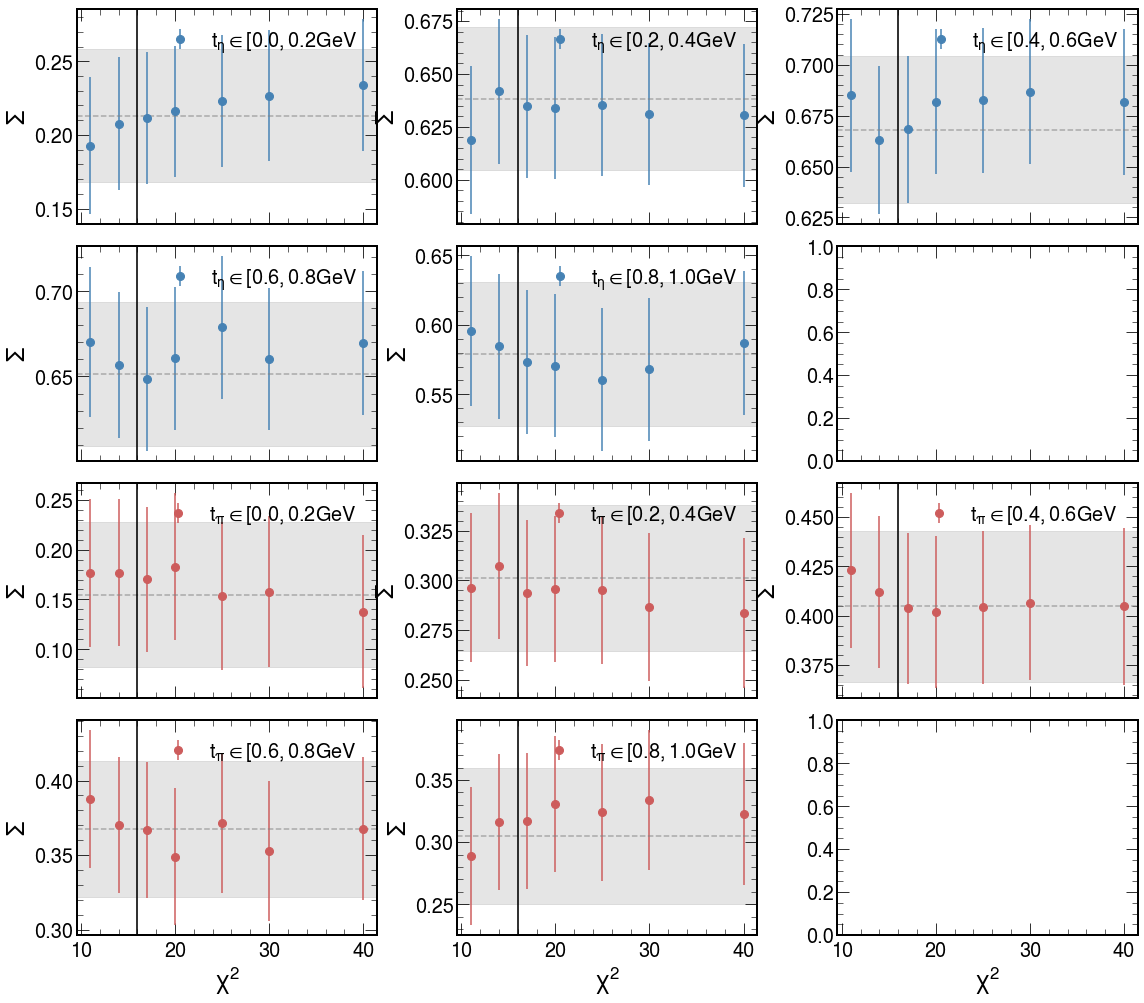

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


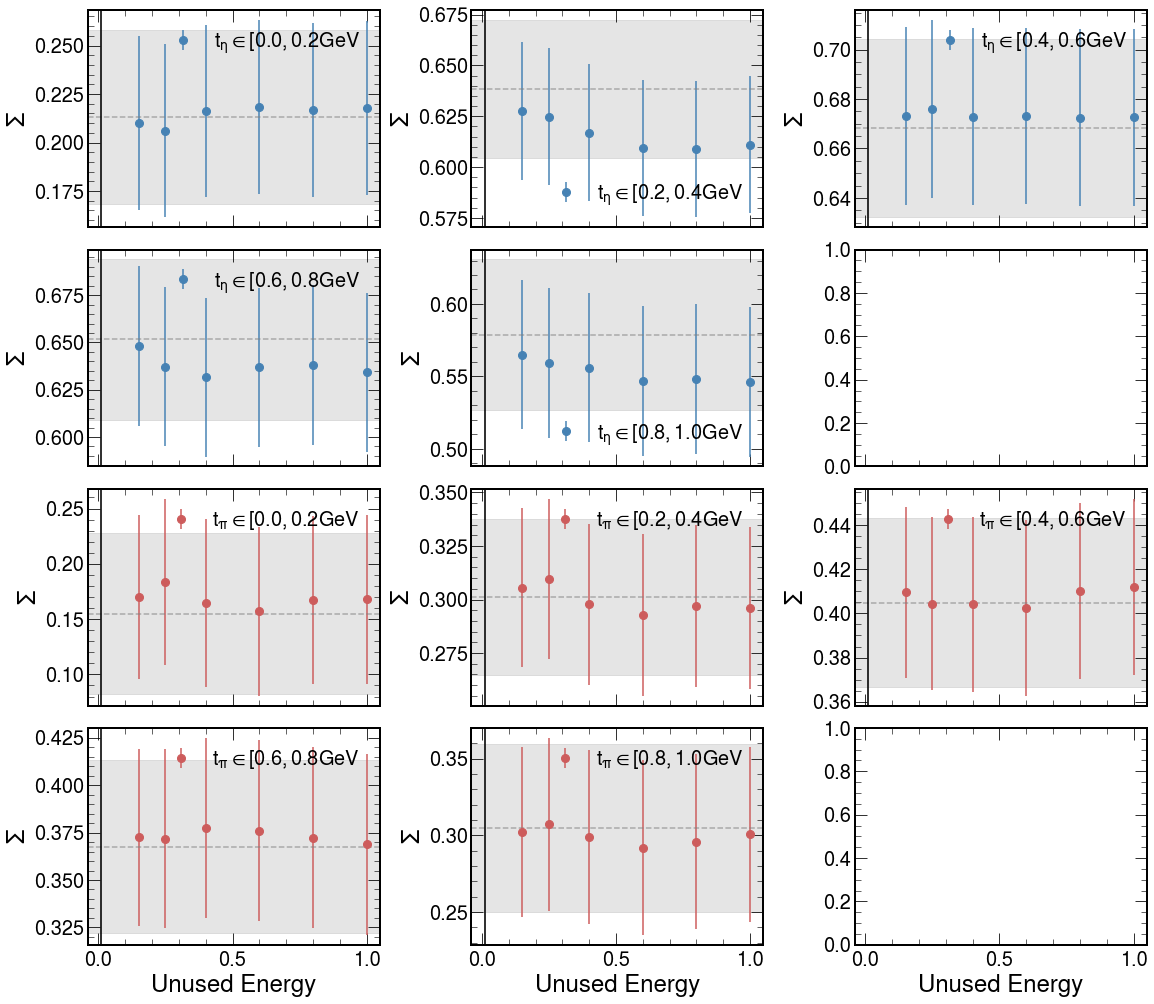

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


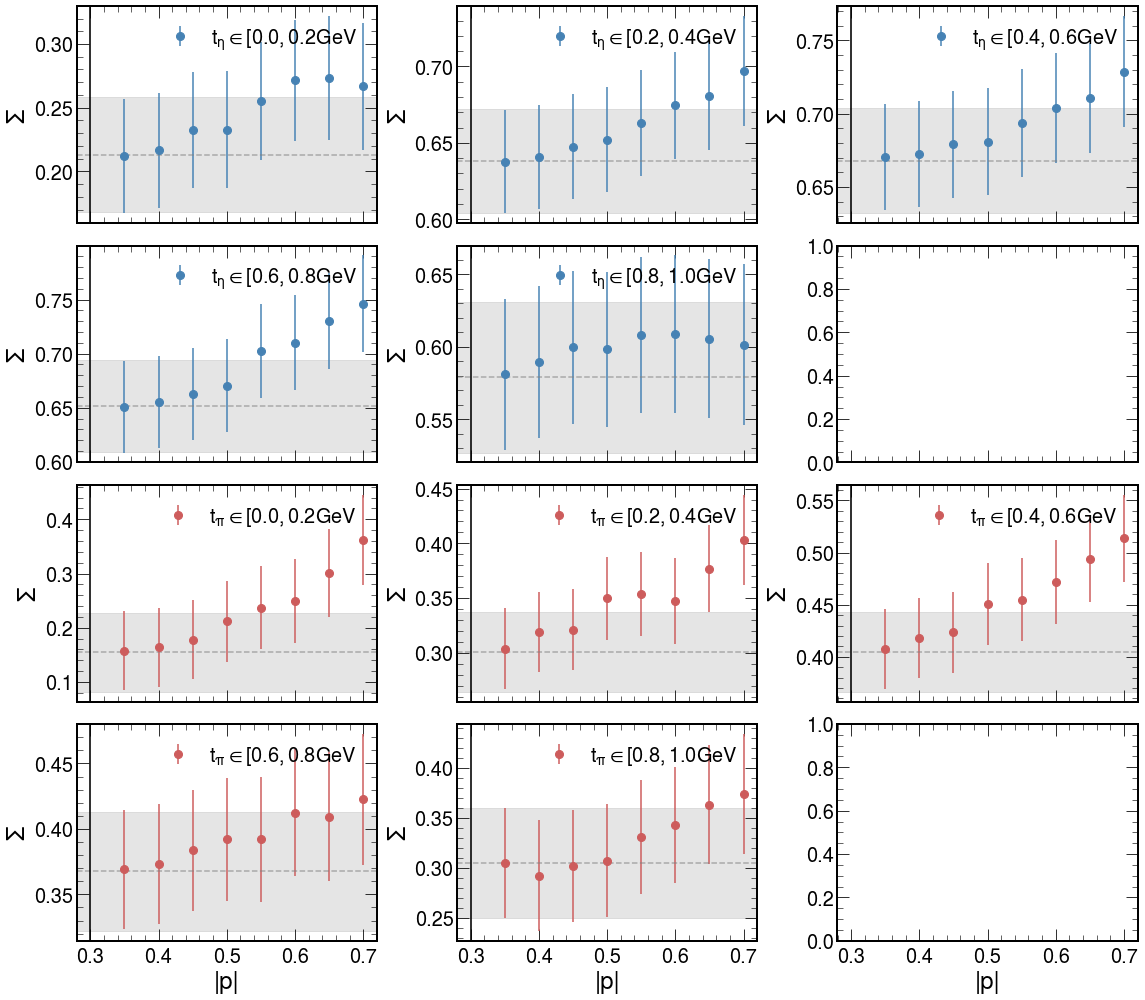

In [362]:
selectionNames=["chi","ue","pMom"]
xlabels=[r"$\chi^2$","Unused Energy",r"|p|"]
selections=[chis,ues,pMoms]
defaults=[16,0.01,0.3]

for selectionName, selection, xlabel, i, default in zip(selectionNames,selections,xlabels,range(len(selectionNames)),defaults):
    fig,axes=plt.subplots(4,3,figsize=(16,14),sharex=True)
    axes=axes.flatten()
    for ip,var,varerr,markerColor,label in zip(range(2),["asym_000_eta_1","asym_000_pi0_1"],["asym_000_eta_err_1","asym_000_pi0_err_1"],\
                                         ["steelblue","indianred"],["t_{\eta}","t_{\pi}"]):
        for it,midt1 in enumerate(dfs_scan['midt1'].unique()):
            it=it+1 if ip==1 else it
            tmp=dfs_scan[(dfs_scan["data"]=="total")&(dfs_scan["midt1"]==midt1)]
            asyms=tmp[tmp.selection.str.startswith(selectionName)][var].values
            asymErrs=tmp[tmp.selection.str.startswith(selectionName)][varerr].values
            nominal=df[(df.data=="total")&(df.binVar=="mandelstam_t")&(df.minval1==0)&(df.maxval1==100)&(df.midt1==midt1)][var].values
            nominal_err=df[(df.data=="total")&(df.binVar=="mandelstam_t")&(df.minval1==0)&(df.maxval1==100)&(df.midt1==midt1)][varerr].values
            axes[ip*5+it].errorbar(selection,asyms,yerr=asymErrs,fmt='o',markersize=8,c=markerColor,label=f"${label}\in[{midt1-0.1:0.1f},{midt1+0.1:0.1f} GeV$")
            axes[ip*5+it].axhspan(nominal-nominal_err,nominal+nominal_err,color='gray',alpha=0.2)
            axes[ip*5+it].axhline(nominal,color='gray',alpha=0.6,linestyle='--')
            axes[ip*5+it].set_ylabel(r"$\Sigma$")
            axes[ip*5+it].axvline(default,c='black',alpha=0.8,linewidth=2)
            axes[ip*5+it].legend()

        axes[-3].set_xlabel(xlabel)
        axes[-2].set_xlabel(xlabel)
        axes[-1].set_xlabel(xlabel)

    plt.tight_layout()